# Исследование данных о продажах компьютерных игр

**Заказчик**: интернет-магазин «Стримчик», который продаёт компьютерные игры по всему миру. 

**Данные**: из открытых источников доступны исторические данные до 2016 года о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 

**Цель работы**: выявить определяющие успешность игры закономерности, что позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Основные задачи**:
1. Изучить таблицу с данными;
2. Подготовить данные (заменить названия столбцов, добавить новые столбцы и преобразовать данные в нужные типы, там где это необходимо); 
3. Провести исследовательский анализ данных(оценить динамику выпуска игр и их продаж в зависимости от года, определить наиболее актуальный период, данные за который необходимо проанализировать, выявить наиболее популярные и прибыльные платформы, жанры игр, оценить влияние отзывов критиков и пользователей на продажи игр);
4. Составить портрет пользователя каждого региона (определить для пользователя из Северной Америки, Европы и Японии самые популярные платформы  и жанры (топ-5) и оценить влияет ли рейтинг ESRB на продажи в каждом из этих регионов);

5. Проверить гипотезы, равны ли средние пользовательские рейтинги платформ Xbox One и PC и отличаются ли средние пользовательские рейтинги жанров Action и Sports;

6. Написать общий вывод.

**Описание данных**:

* **Name** — название игры
* **Platform** — платформа
* **Year_of_Release** — год выпуска
* **Genre** — жанр игры
* **NA_sales** — продажи в Северной Америке (миллионы проданных копий)
* **EU_sales** — продажи в Европе (миллионы проданных копий)
* **JP_sales** — продажи в Японии (миллионы проданных копий)
* **Other_sales** — продажи в других странах (миллионы проданных копий)
* **Critic_Score** — оценка критиков (максимум 100)
* **User_Score** — оценка пользователей (максимум 10)
* **Rating** — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Необходимо учитывать тот факт, что данные за 2016 год могут быть неполными.





## Открываем файл с данными и изучаем общую информацию.

### Загрузка данных из файла в датафрейм.

In [1]:
# Импортируем библиотеку pandas:
import pandas as pd

# Импортируем библиотеку seaborn:
import seaborn as sns

# Импортируем подбиблиотеку pyplot из библиотеки matplotlib:
import matplotlib.pyplot as plt

# Импортируем библиотеку numpy:
import numpy as np

# Импортируем бибилиотеку stats из библиотеки scipy:
from scipy import stats as st

# Импортируем библиотеку warnings:
import warnings

In [2]:
# Считываем данные из csv-файла в датафрейм и сохраняем в переменную data:
data = pd.read_csv('/datasets/games.csv', sep=',')

### Изучение общей информации о полученном датафрейме.

In [3]:
# Выводим первые 10 строк датафрейфма на экранс помощью метода head():
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
# Выводим основную информацию о датафрейме с помощью метода info():
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В данных имеются пропуски, которые нужно будет проанализировать, после чего часть из них удалить или заменить. Также необходимо изменить тип некоторых данных.

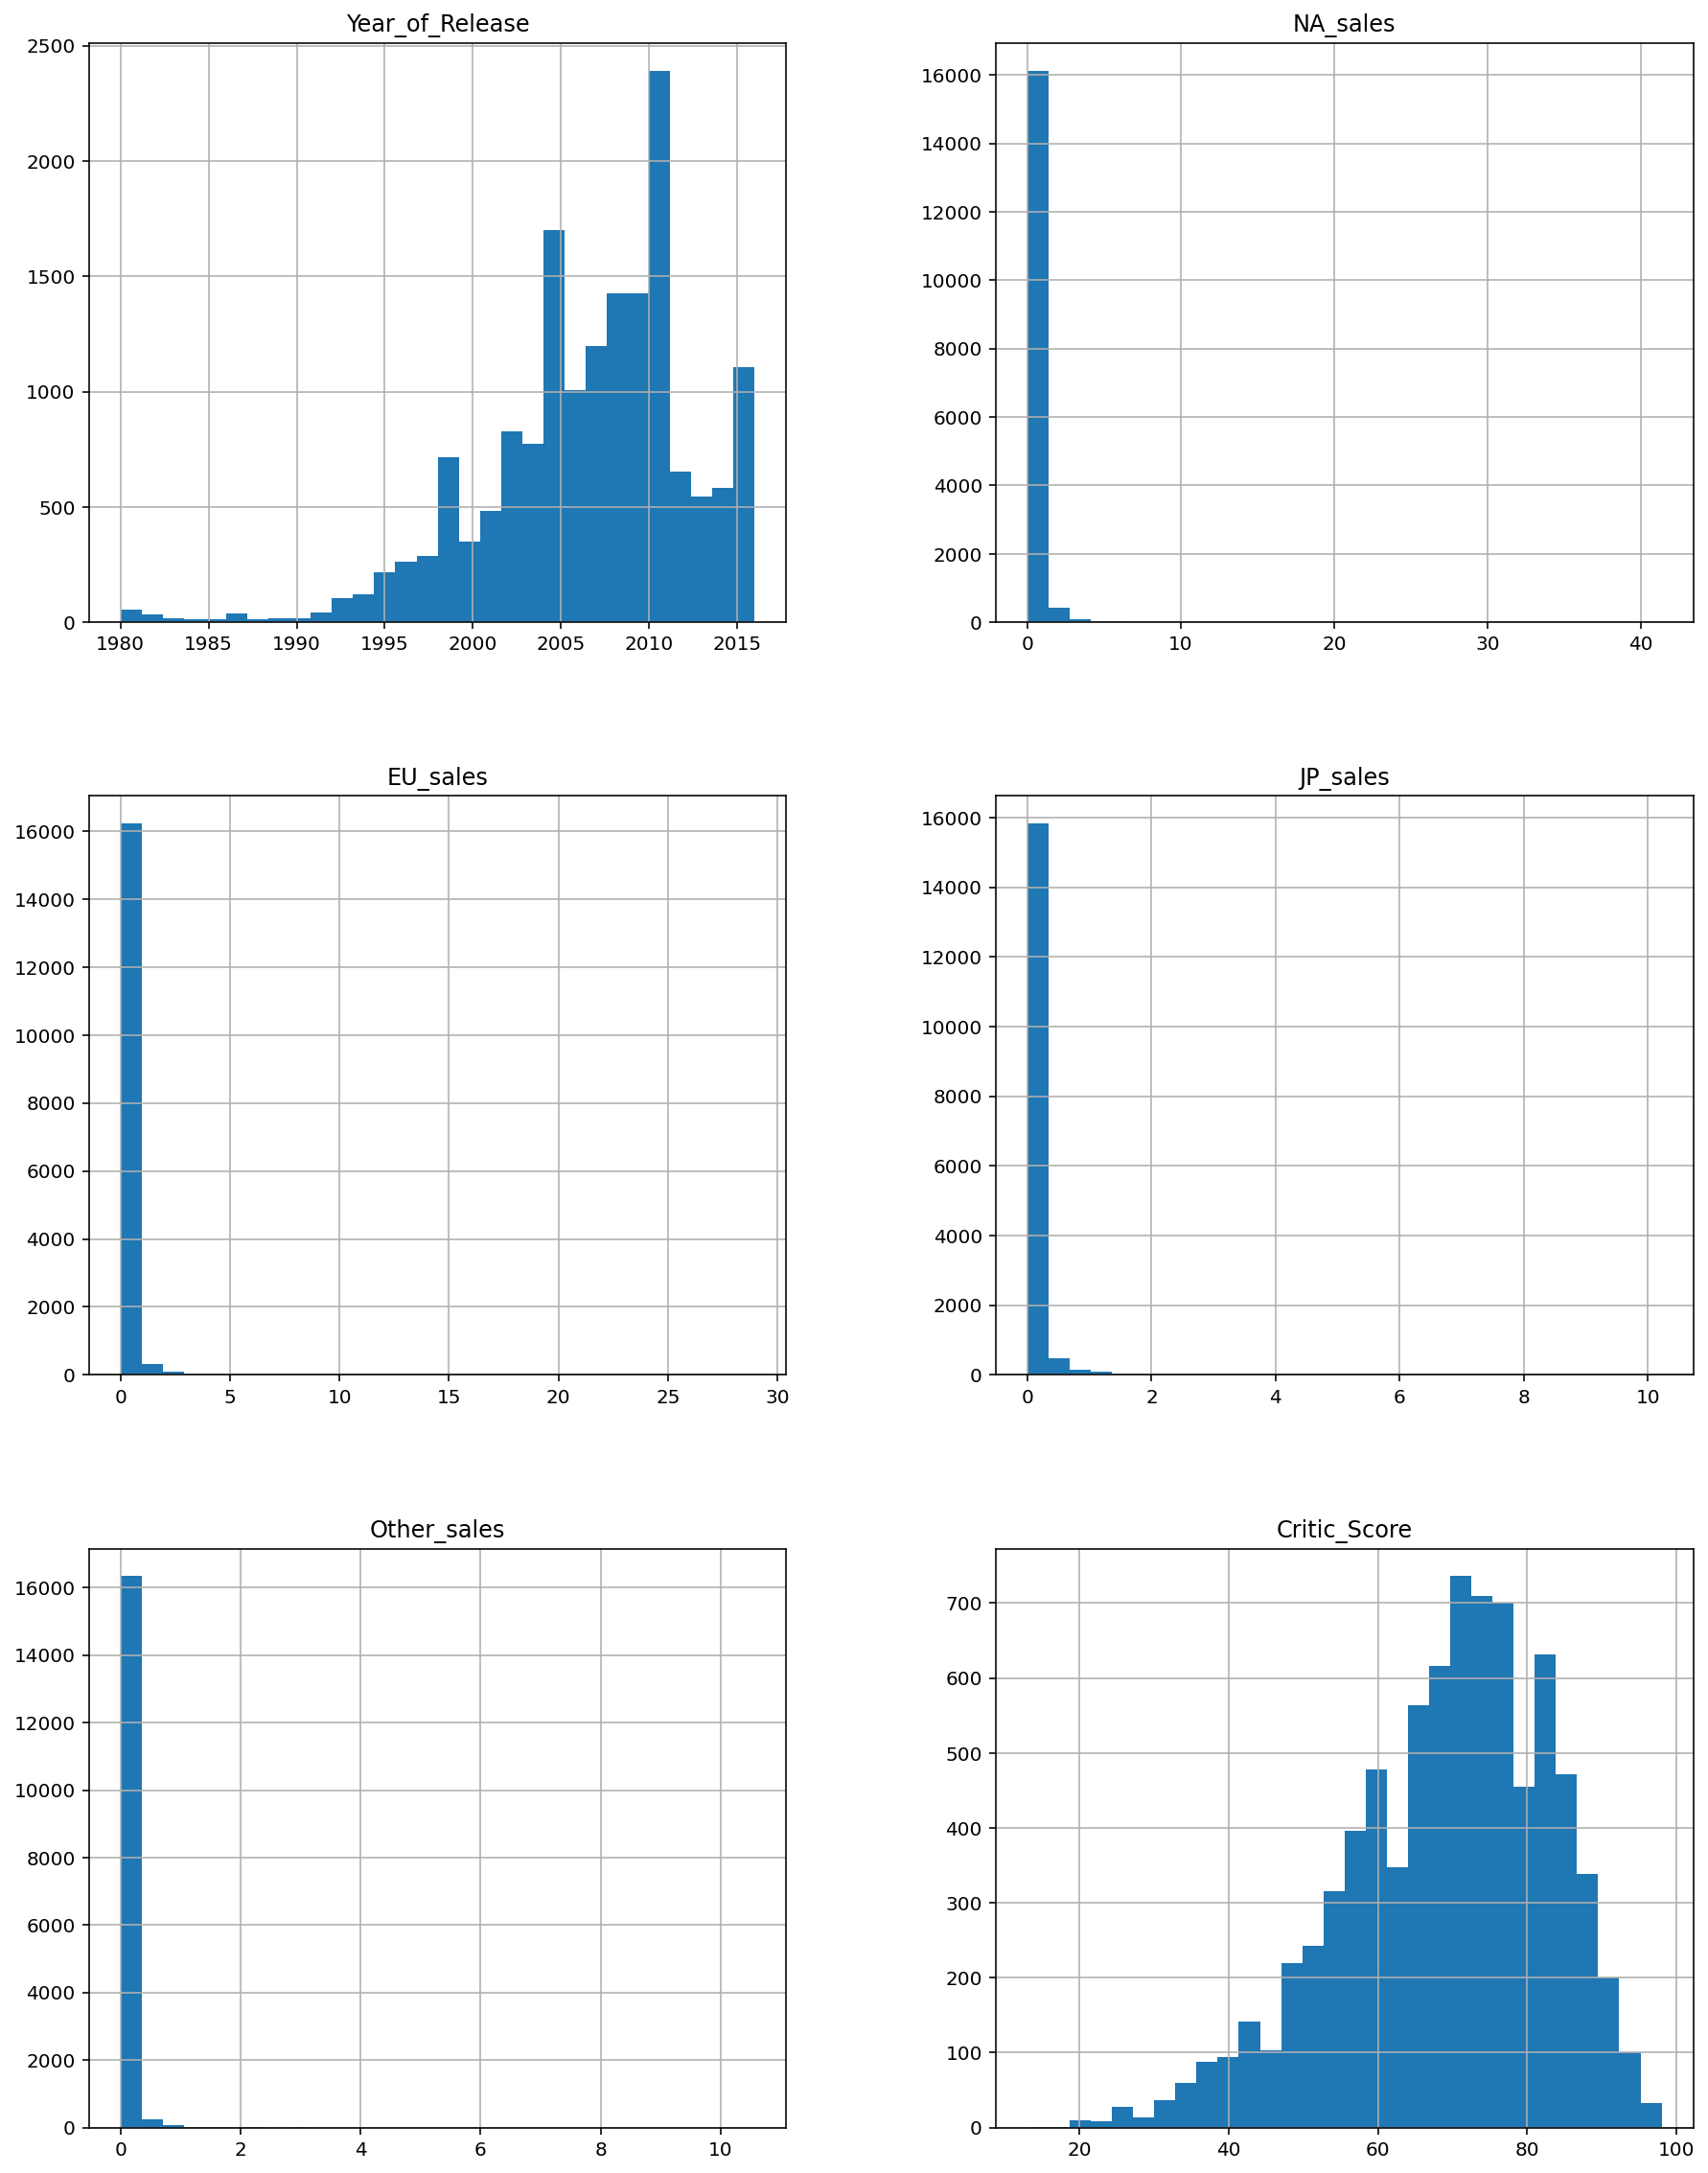

In [5]:
# Вводим конфигурацию,улучшающую четкость картинок во всем проекте:

%config InlineBackend.figure_format = 'retina'

# Строим общую гистограмму для всех числовых столбцов таблицы методом hist():

data.hist(bins = 30, figsize=(15, 20));


Как видно из полученных гистрограмм, количество выпускаемых игр с 1990 по 2010 год стабильно росло, при этом число больше всего игр было выпущено в 2004 и в 2010 годах, с 2010 по 2015 год наблюдалось резкое снижение количества, выпускаемых игр, а в 2016 году их количество резко возросло. Чаще всего игры продавались миллионым тиржажом в каждом из регионов. Критики чаще всего оценивают игры от 52 до 88 баллов со средней оценкой 71 балл по 100-бальной шкале.

Проверим, есть ли в данных явные дубликаты.

In [6]:
# Проверяем датафрейм на наличие явных дубликатов методом duplicated() и считаем их количество методом sum():
data.duplicated().sum()

0

Дубликатов в анализируемых данных не обнаружено.

## Предобработка данных

### Исследование пропусков в данных

#### Определяем в каких столбцах есть пропуски:

In [7]:
# Перед этим приведем названия столбцов к нижнему регистру методом str.lower():

data.columns = data.columns.str.lower()

In [8]:
# Ищем пропуски методом isna() и sum(): 
data.isna().sum().sort_values(ascending=False)

critic_score       8578
rating             6766
user_score         6701
year_of_release     269
name                  2
genre                 2
platform              0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
dtype: int64

#### Удаляем пропуски

Пропуски в столбцах с названием игры, ее жанром, и годом релиза можно удалить, так как их количество минимально.

In [9]:
# Удаляем пропуски в столбцах 'name', 'year_of_release' и 'genre', методом dropna()и перезаписываем индексы 
# методом reset_index():

data = data.dropna(subset=['name'])
data = data.dropna(subset=['year_of_release'])
data = data.dropna(subset=['genre']).reset_index()

#### Заменяем пропуски

Обратим внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей.  

In [10]:
# Посмотрим, какие уникальные значения содержит столбец с 'user_score' методом unique():
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Как правило, эта аббревиатура означает, что значение в столбцу "подлежит определению", то есть неизвестно или оценок пользователей на момент получения данных было недостаточно для формирования рейтинга. Во избежание ошибок при расчетах, заменим эту аббревиатуру в столбце с рейтингом пользователей на NaN.

In [11]:
# Логической индексацией выделяем значения 'tbd' и заменяем их на значения NaN методом np.nan:
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.nan

In [12]:
# Проверим методом unique(), удалось ли заменить 'tbd': 
data['user_score'].unique()


array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

В столбце с рейтингом от организации ESRB пропуски заполним значением 'Unknown', которое будет означать неопределенный рейтинг или его отсутствие.

In [13]:
# Заполним  пропуски  в столбце 'locality_name' методом fillna(): 
data['rating'] = data['rating'].fillna('Unknown')

#### Причины, которые могли привести к пропускам в данных.

* Отсутствие данных в источнике сбора информации;
* Автоматизированная система сбора информации на этапе загрузки или выгрузки данных дала сбой;
* Объединение таблиц;
* Человеческий фактор.



### Изменение типов данных

Заменим тип данных в столбце с годом релиза на целочисленный, а в столбце с оценкой пользователей на вещественный тип.

In [14]:
# Заменим тип данных в столбцах year_of_release и user_score методом astype():
data['user_score'] = data['user_score'].astype('float')
data['year_of_release'] = data['year_of_release'].astype('int')

In [15]:
# Проверим, изменился ли тип данных методом data.info():
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            16444 non-null  int64  
 1   name             16444 non-null  object 
 2   platform         16444 non-null  object 
 3   year_of_release  16444 non-null  int64  
 4   genre            16444 non-null  object 
 5   na_sales         16444 non-null  float64
 6   eu_sales         16444 non-null  float64
 7   jp_sales         16444 non-null  float64
 8   other_sales      16444 non-null  float64
 9   critic_score     7983 non-null   float64
 10  user_score       7463 non-null   float64
 11  rating           16444 non-null  object 
dtypes: float64(6), int64(2), object(4)
memory usage: 1.5+ MB


### Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец

In [16]:
# Добавим в таблицу новый столбец 'gen_sales' с суммарными продажами во всех регионах:
   
data['gen_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis = 1)

data['gen_sales']              

0        82.54
1        40.24
2        35.52
3        32.77
4        31.38
         ...  
16439     0.01
16440     0.01
16441     0.01
16442     0.01
16443     0.01
Name: gen_sales, Length: 16444, dtype: float64

## Проведем исследовательский анализ данных

### Посмотрим, сколько игр выпускалось в разные годы.

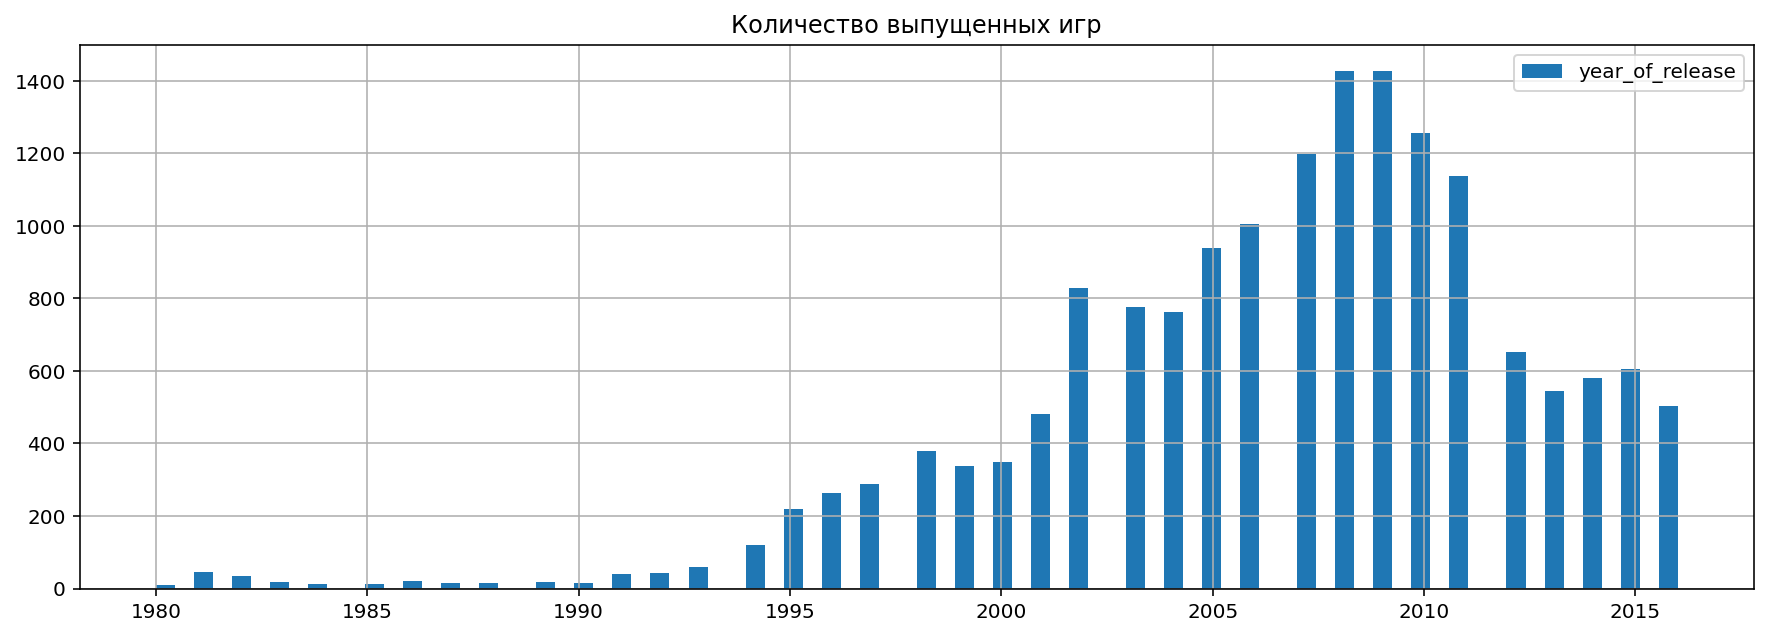

In [17]:
# Строим гистограмму для столбца с годом релиза игр:
ax = data['year_of_release'].hist(bins=80, figsize = (15,5), legend=True);
ax.set_title('Количество выпущенных игр');

Наименьшее число игр было выпущено с 1980 по 1993 год, кол-во игр, выходящих в течение каждого года в этот период, не превышало 60. Ощутимый рост числа игр начался с 1994 года (вышло более 100 игр) и продолжался вплоть до максимума в 2008 и 2009 годах (около 1400 игр в каждом из них). После чего, количество выпускаемых в течение года игр, начало снижаться и резко упало после 2011 года: около 640 игр в 2011 и 560 игр в 2013 год). Небольшой рост после снижения наблюдался с 2013 по 2015, после чего в 2016 году произошел очередной спад до 500 игр в год. 

В нашем случае, для прогноза на 2017 год, наиболее важными можно было бы считать данные за период с 2013 по 2015 год, так как в этот период мы можем наблюдать определенную зависимость: рост до 2015 года и дальнейшее снижение. Справедливость выбора актуального периода проверим далее. 

### Посмотрим, как менялись продажи по платформам

In [18]:
# Делаем по датафрейму data сводную таблицу data_top методом pivot_table(): группируем данные по столбцу 'platform', 
# по значениям из столбца 'gen_sales' находим суммарные продажи игр на каждой платформе методом sum():

data_top = data.pivot_table(index=['platform'], values='gen_sales', aggfunc='sum')

# Переименовываем столбцы:
data_top.columns = ['Суммарные продажи(топ 10), млн копий']

# Сортируем датафрейм методом sort_values() по уменьшению суммарных продаж и выводим его первые 10 строк методом head() 
# для формирования топ 10 платформ с наибольшими продажами: 
data_top = data_top.sort_values('Суммарные продажи(топ 10), млн копий',ascending=False).head(10).reset_index()
data_top


,platform,"Суммарные продажи(топ 10), млн копий"
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


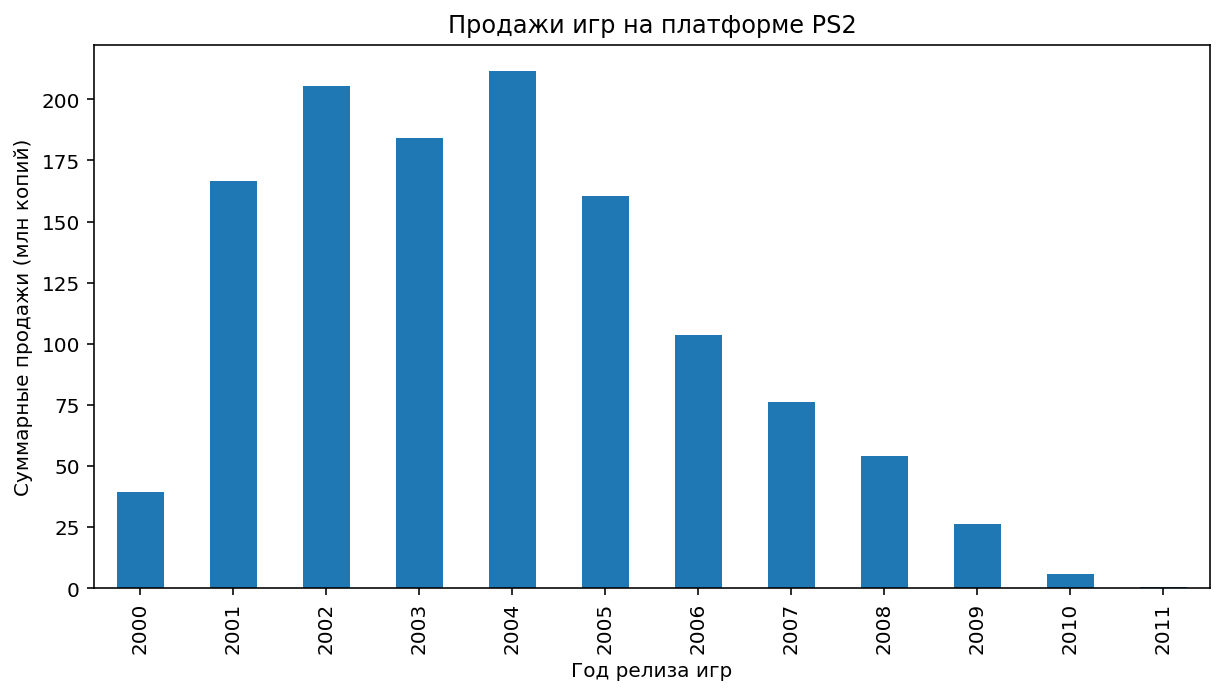

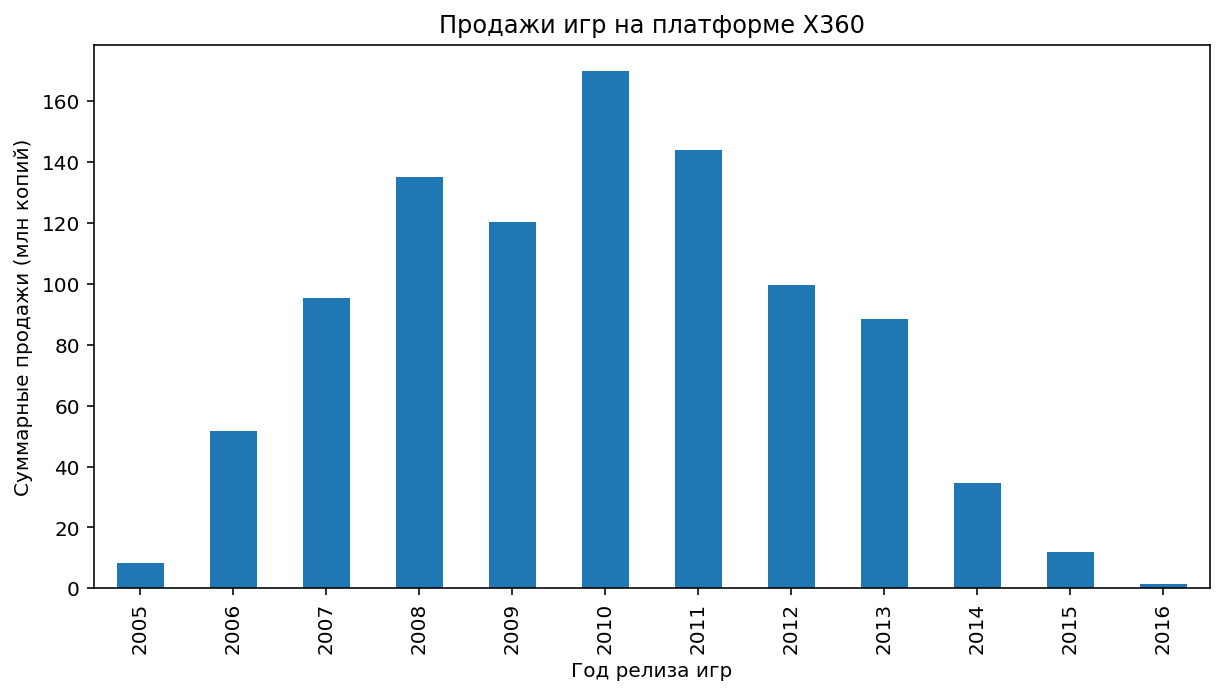

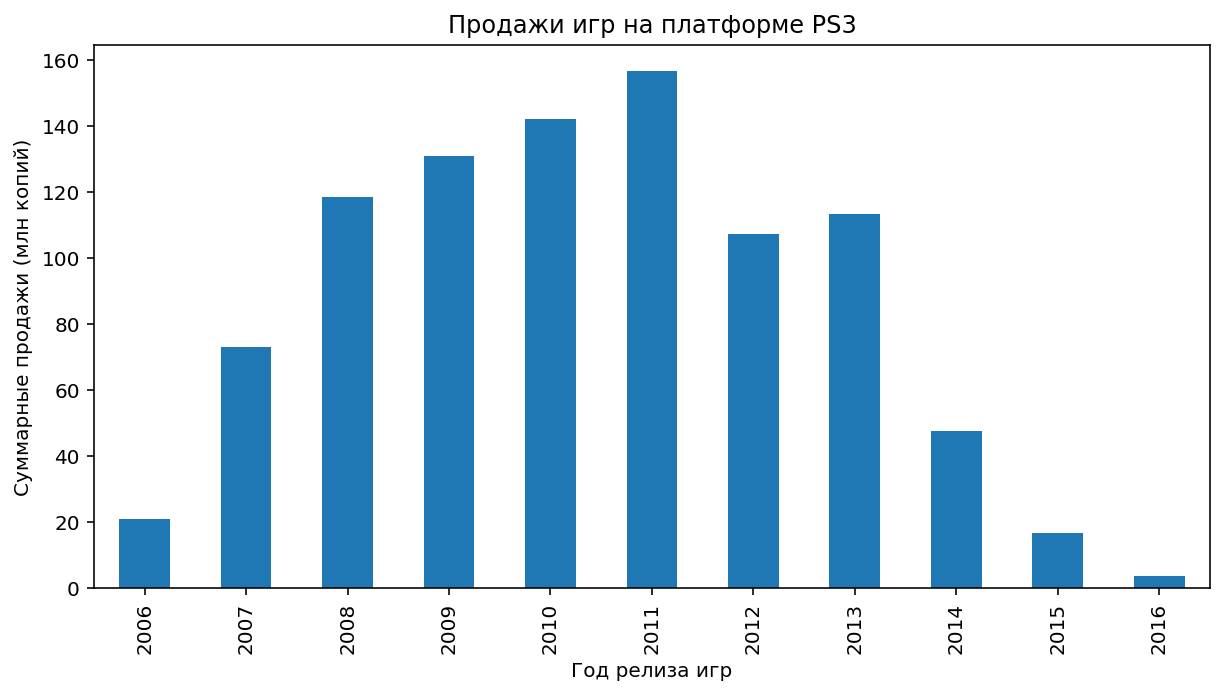

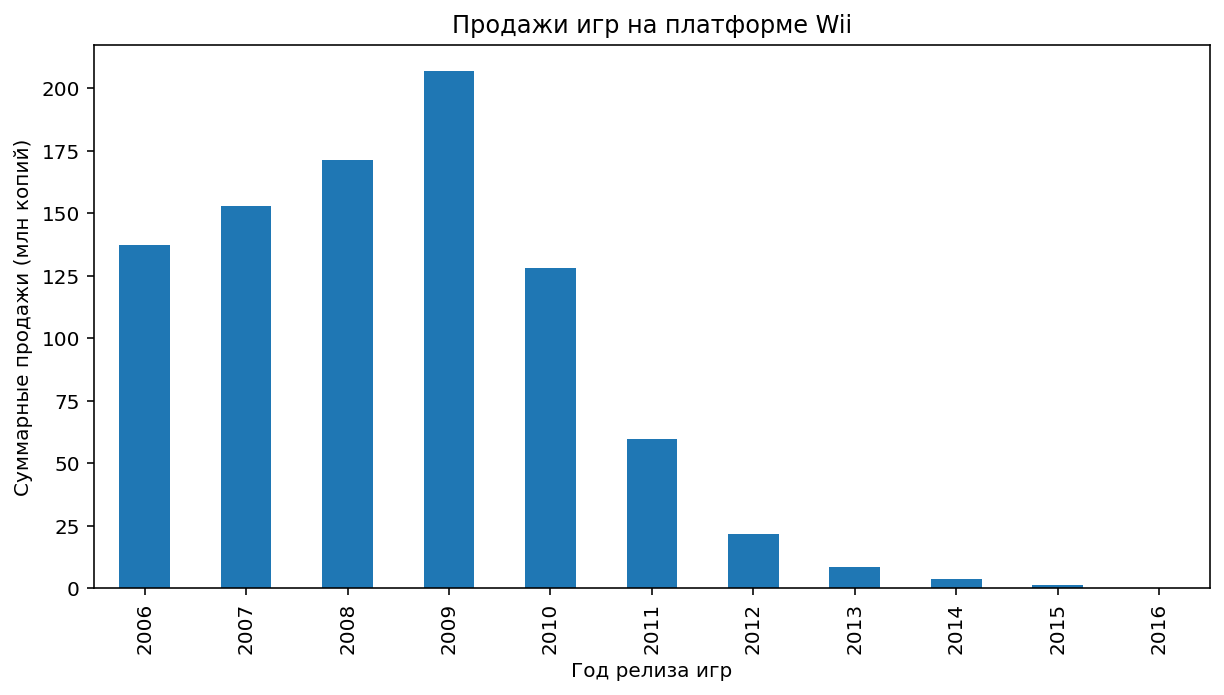

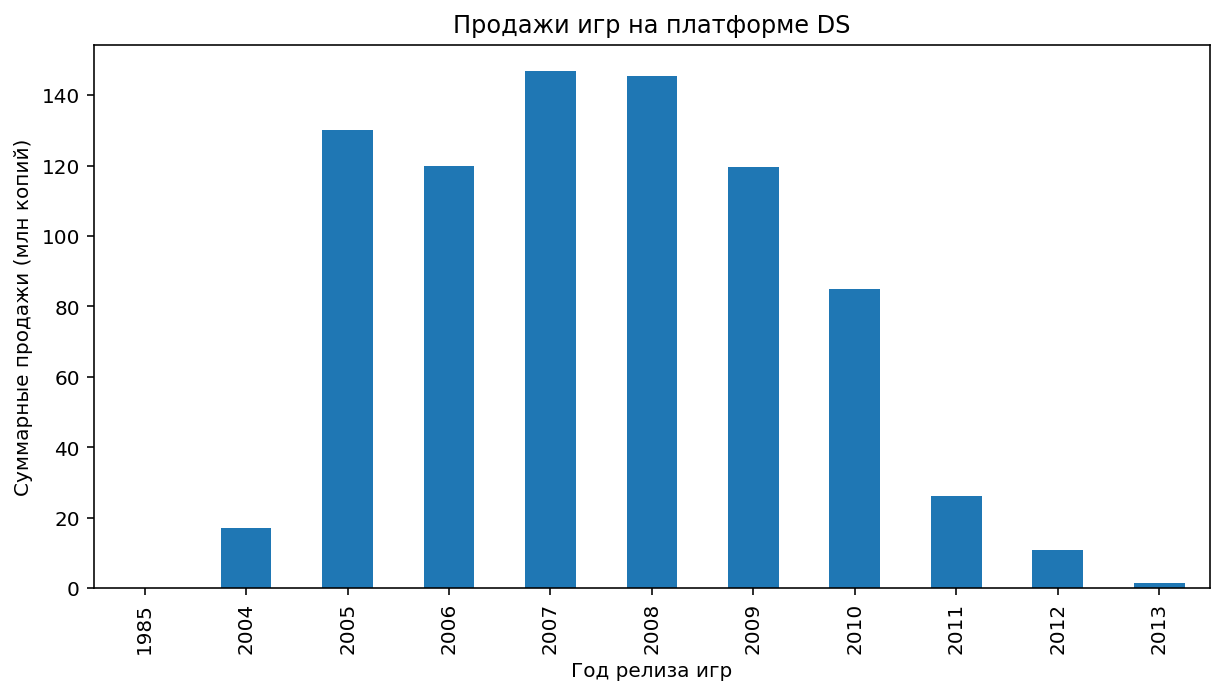

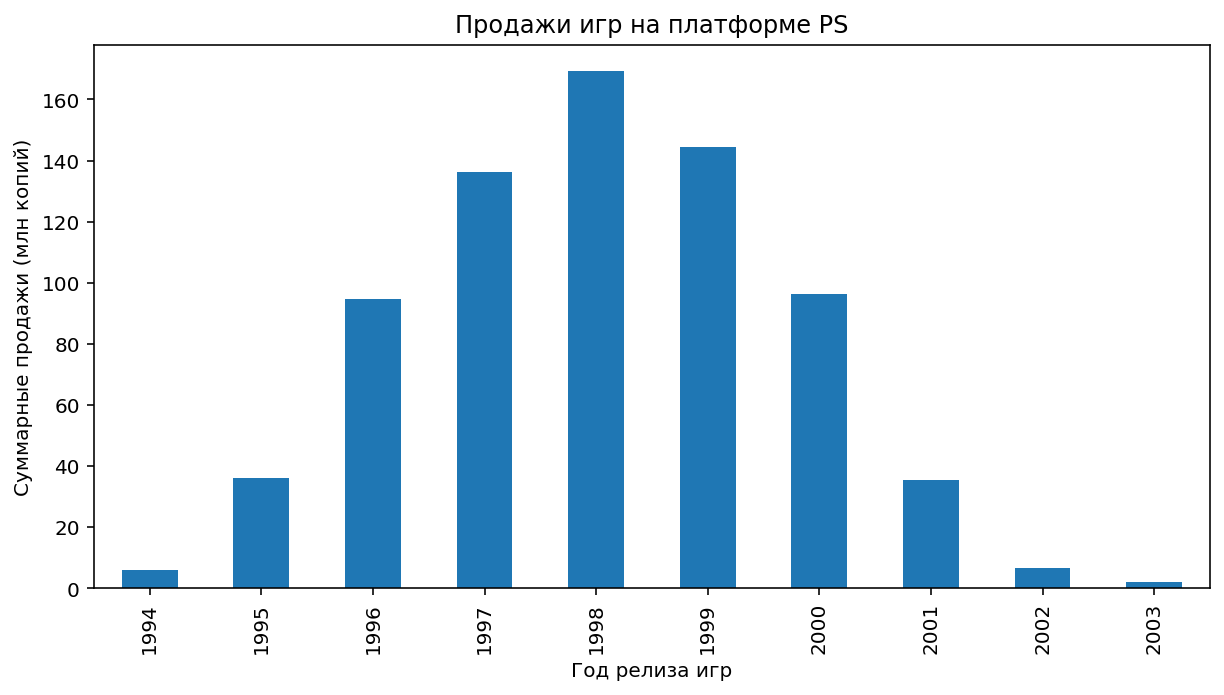

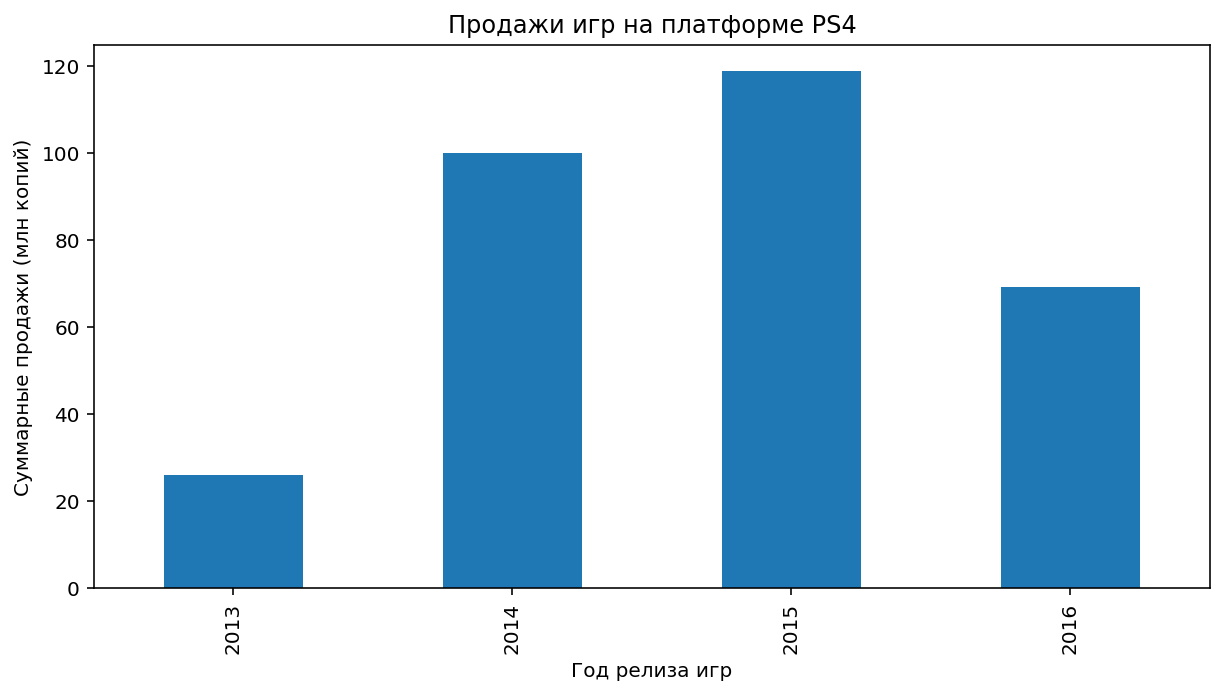

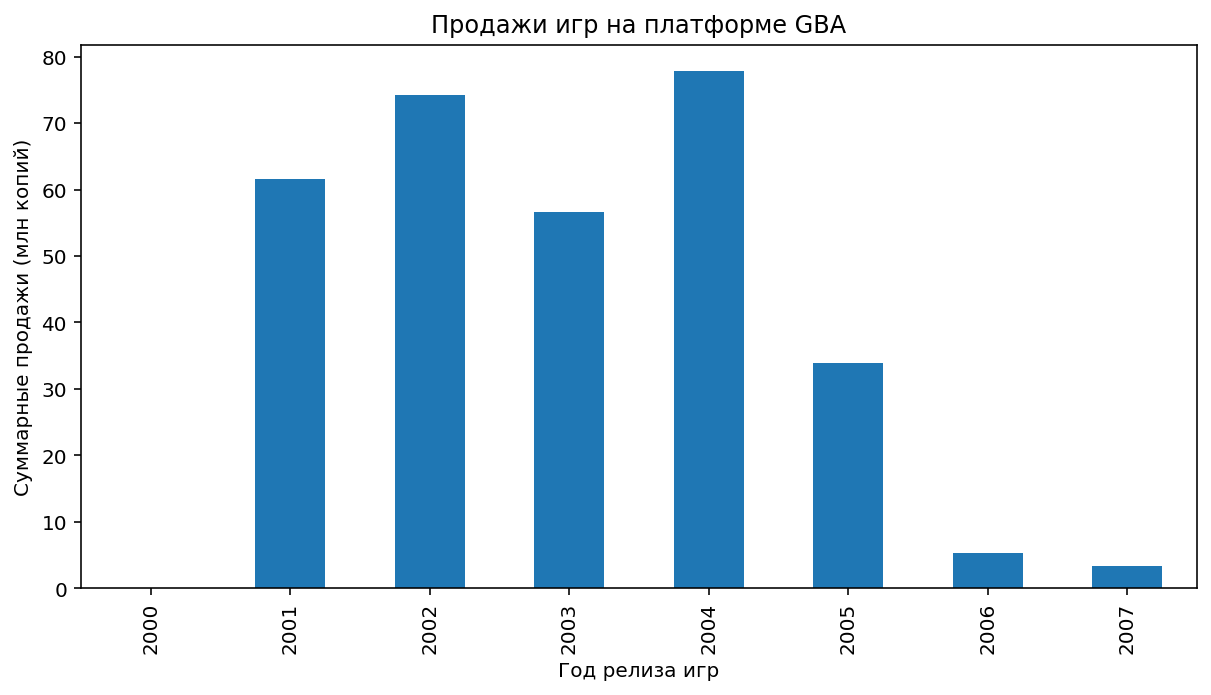

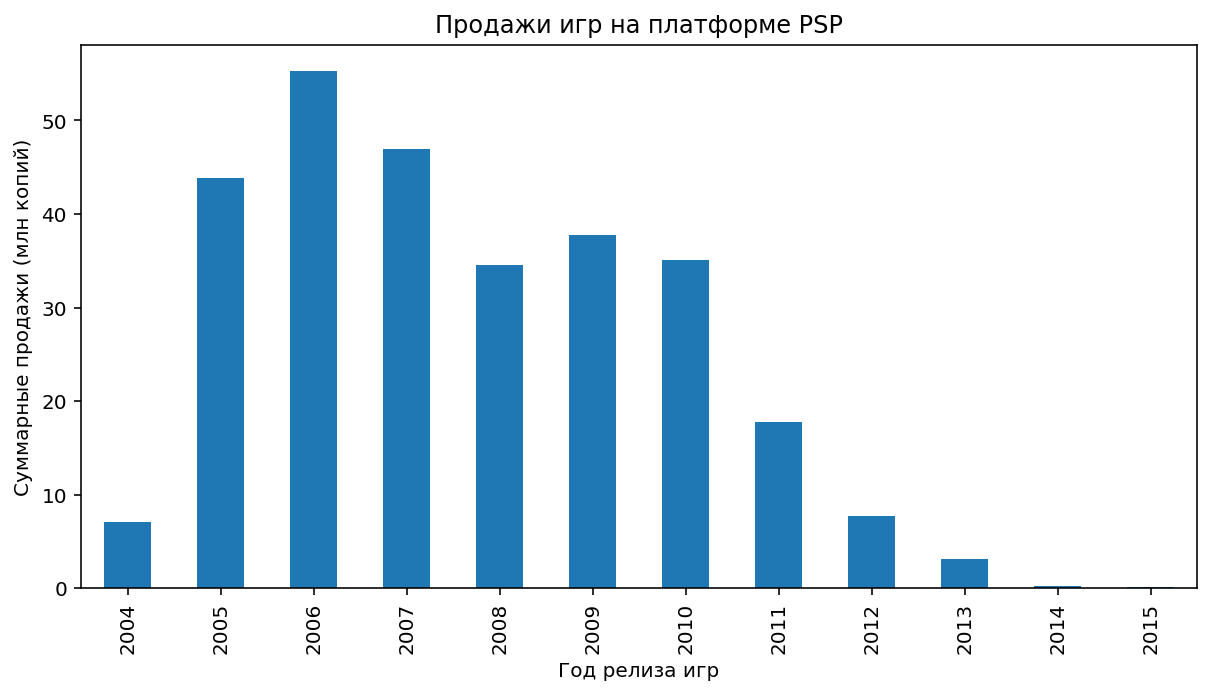

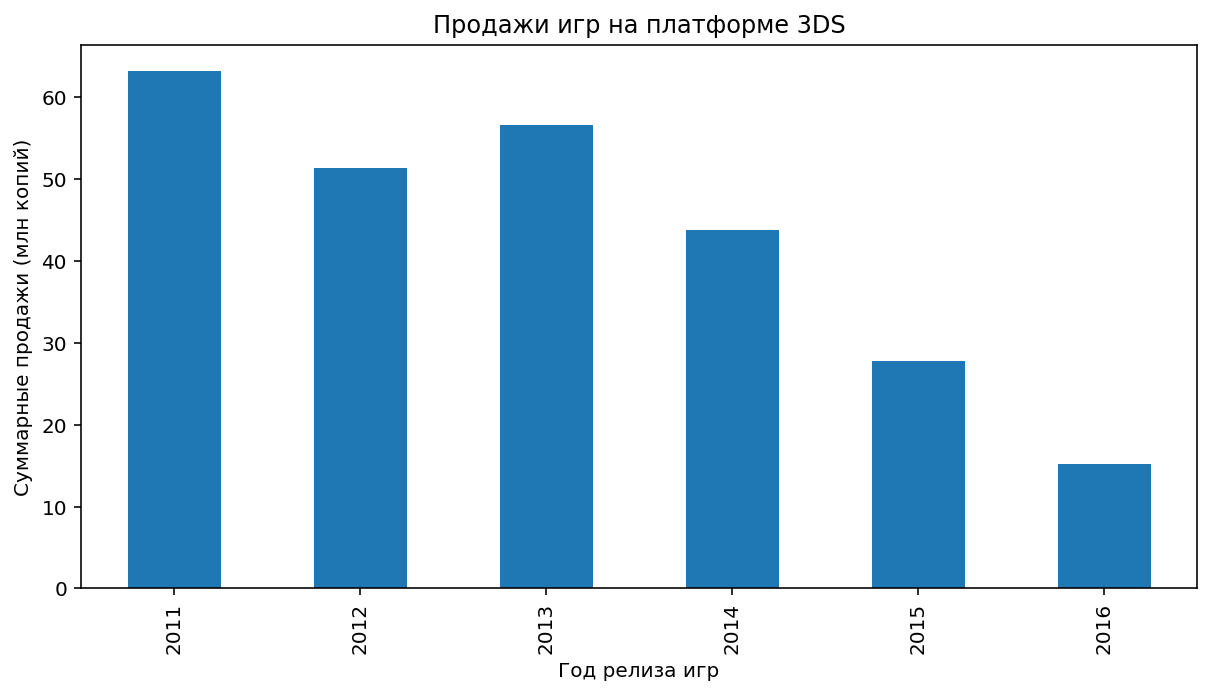

In [19]:
# Перебираем циклом for в датафрейме data_top каждую из платформ:
for x in data_top['platform']:
    
# Методом query() делаем срез данных в исходном датафрейме data для выбранных ранее платформ, с помощью методов pivot_table() 
# и plot() строим график зависимости суммарных продаж в столбце 'gen_sales' от года выпуска игры в столбце 'year_of_release': 
    data.query('platform == @x').pivot_table(index=['year_of_release'], values='gen_sales', aggfunc=['sum']).plot(kind='bar',
                                            legend= False, title = f'Продажи игр на платформе {x}', figsize=(10, 5), xlabel='Год релиза игр', 
                                            ylabel='Суммарные продажи (млн копий)');
# Выводим все графики на экран:    
    plt.show()


Новые платформы появляются примерно каждые 5-6 лет и исчезают в среднем через 10 лет после появления. 
Судя по полученным графикам игры на платформы PS2, DS, PS, GBA, PSP уже не выпускаются, на одних из них перестали выпускать игры до 2010 года, на других - до 2015 года. При этом в 2015 году, возможно, продажи игр для PSP и не были прекращены, однако информация о продажах на этой платформе за 2016 год отсутствует. Для определения актуального периода для прогноза на 2017 год будем опираться только на те платформы, данные о продажах игр на которых есть в 2016 году. Таких платформ 5: X360, PS3, Wii, PS4 и 3DS. Количество проданных игр в 2016 году на платформах PS4 и 3DS, больше чем на 3-х других платформах. Таким образом, наиболее актуальным периодом выберем промежуток с 2013 по 2016 год, так как в этот именно в этот период на платформе 3DS наблюдается снижение суммарных продаж, а на платформе PS4 вообще имеются данные  о суммарных продажах только за это промежуток времени.

Опираясь на полученные ранее графики, выберем **актуальным периодом** промежуток с 2013 по 2016 год.


### Возьмем данные за соответствующий актуальный период

In [20]:
# Отфильтруем исходный датафрейм data логической индексацией и сохраним в новом датафрейме data_act данные по продажам игр 
# не поздее 2013 года:
data_act = data[data['year_of_release'] >= 2013]


<div class="alert alert-warning">
    <h2> Комментарий ревьюера v1<a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> 3.5 года, да? Для целей прогнозирования продаж на следующий год даже в традиционных бизнесах редко берут данные более чем за 2-3 года. А в такой динамично меняющейся индустрии, как компьютерные игры и вовсе не стоит брать слишком большой временной интервал - иначе обязательно захватишь уже отжившие тренды. Но и слишком короткий период тоже брать не стоит. Посмотрим, не бдуем ли мы цеплять отжившие тренды

### Определим, какие платформы лидируют по продажам, растут или падают

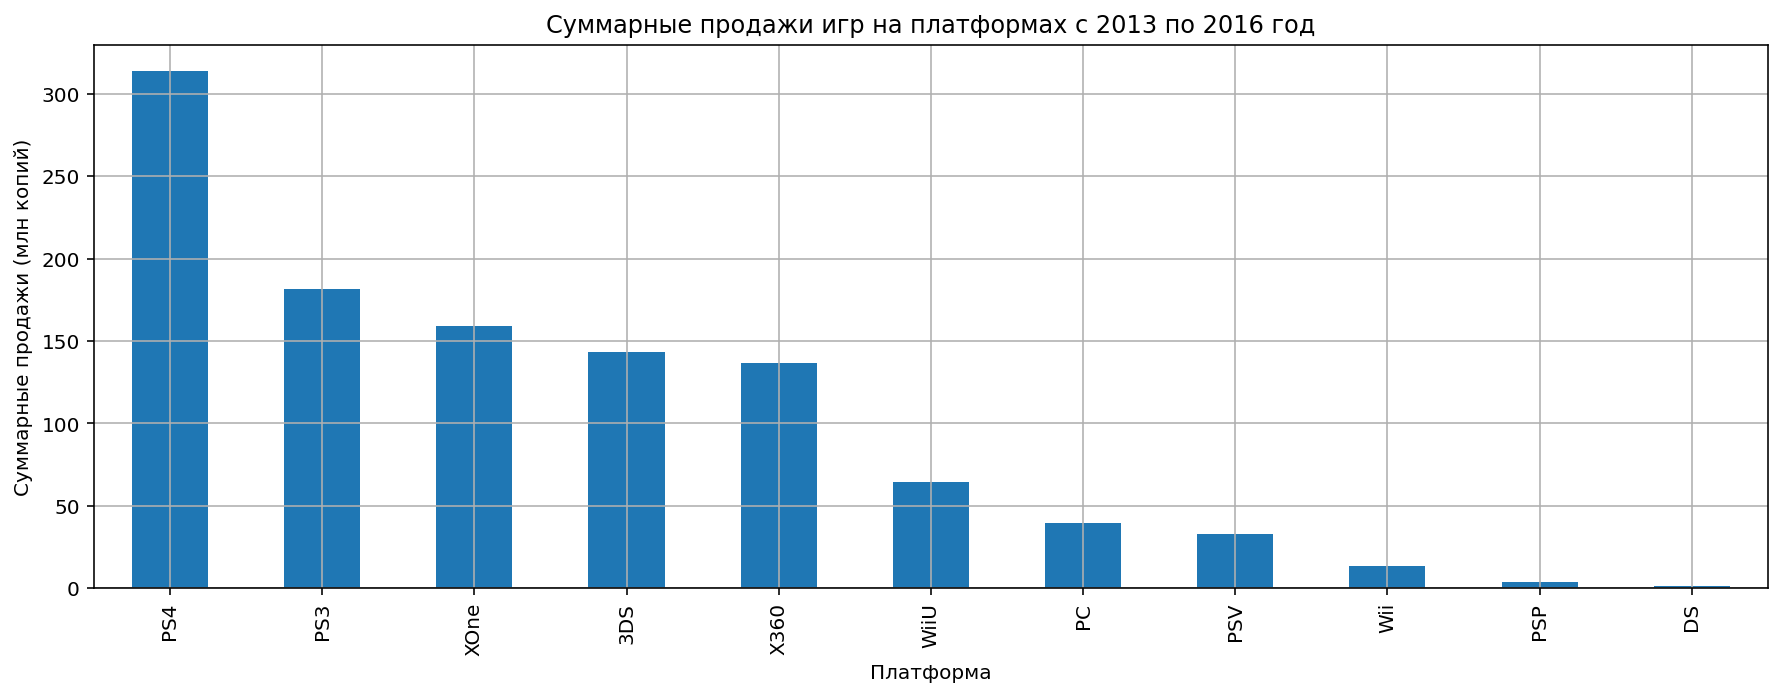

In [21]:
# Применяем методы pivot_table() и plot() к датафрейму с данными по актуальному периоду с 2013 по 2016 год, строим график 
# зависимости суммарных продаж игр от платформы, на которой они выпускаются: 
ax1 = data_act.pivot_table(index=['platform'], values='gen_sales', aggfunc='sum').sort_values(by='gen_sales', 
                                        ascending=False).plot(kind='bar', grid=True, legend=False, 
                                        ylabel = 'Суммарные продажи (млн копий)',xlabel = 'Платформа', figsize=(15, 5));

# Методом set_title() добавляем заголовок:
ax1.set_title('Суммарные продажи игр на платформах с 2013 по 2016 год');

<div class="alert alert-warning">
    <h2> Комментарий ревьюера v1<a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> Сортировка = такой же хороший тон, как и подписи осей и заголовок

Наиболее прибыльной платформой с 2013 по 2016 год является PS4 (порядка 320 млн копий игр). Вслед за ней идут PS3 (порядка 180 млн копий игр) и XOne (порядка 155 млн копий игр). Чуть менее 150 млн копий игр продалось на платформах 3DS и X360. На каждой из оставшихся платформ за данный промежуток времени не удалось продать более 60 млн копий игр.

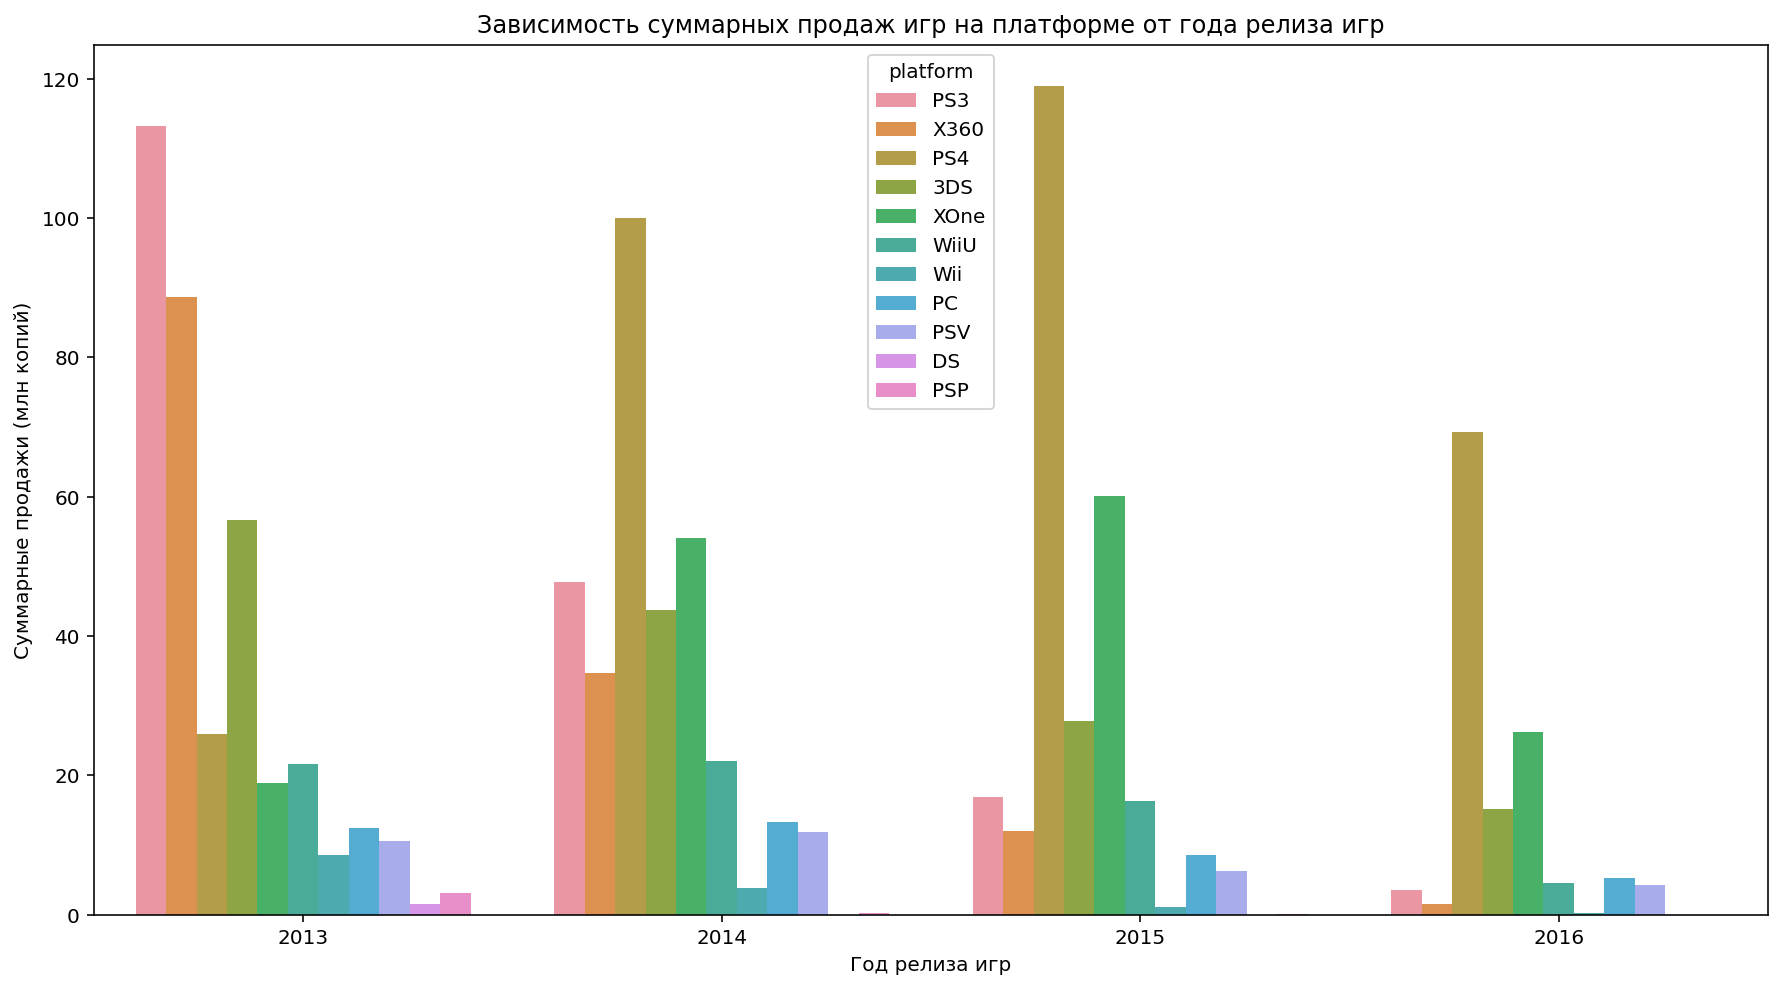

In [22]:
# Строим зависимость суммарных продаж игр на платформе от года их релиза методом sns.barplot(), перед этим задавая размер 
# графика методом plt.figure():
plt.figure(figsize=(15,8))
ax2 = sns.barplot(x='year_of_release', y='gen_sales', hue='platform', data=data_act, ci=None, estimator=sum);

# Методом set_xlabel() и set_ylabel() меняем названия осей, методом set_title добавляем заголовок:
ax2.set_xlabel('Год релиза игр');
ax2.set_ylabel('Суммарные продажи (млн копий)');
ax2.set_title('Зависимость суммарных продаж игр на платформе от года релиза игр');

Суммарные продажи игр на всех платформах, кроме PS4 и XОne, падают с 2013 по 2016 год. Рост суммарных продаж игр на платформах  PS4 и XОne с 2013 по 2015, вероятно, связан с тем, что эти игровые приставки появились на рынке в 2013 году, но уже после 2015 года и на этих платформах снизились продажи игр.


Но основании полученных данных, можно выделить такие потеницально прибыльные плафтормы, как PS4, XОne и 3DS.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера v1<a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> Перспеткивные платформы выделены верно, но с большими трудозатратами из-за того, что актуальный период большеват. Можно взять меньше, тогда такого влияния X360 не будет. А вообще она будет ли поддерживаться в 2017 году??

 ### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.  

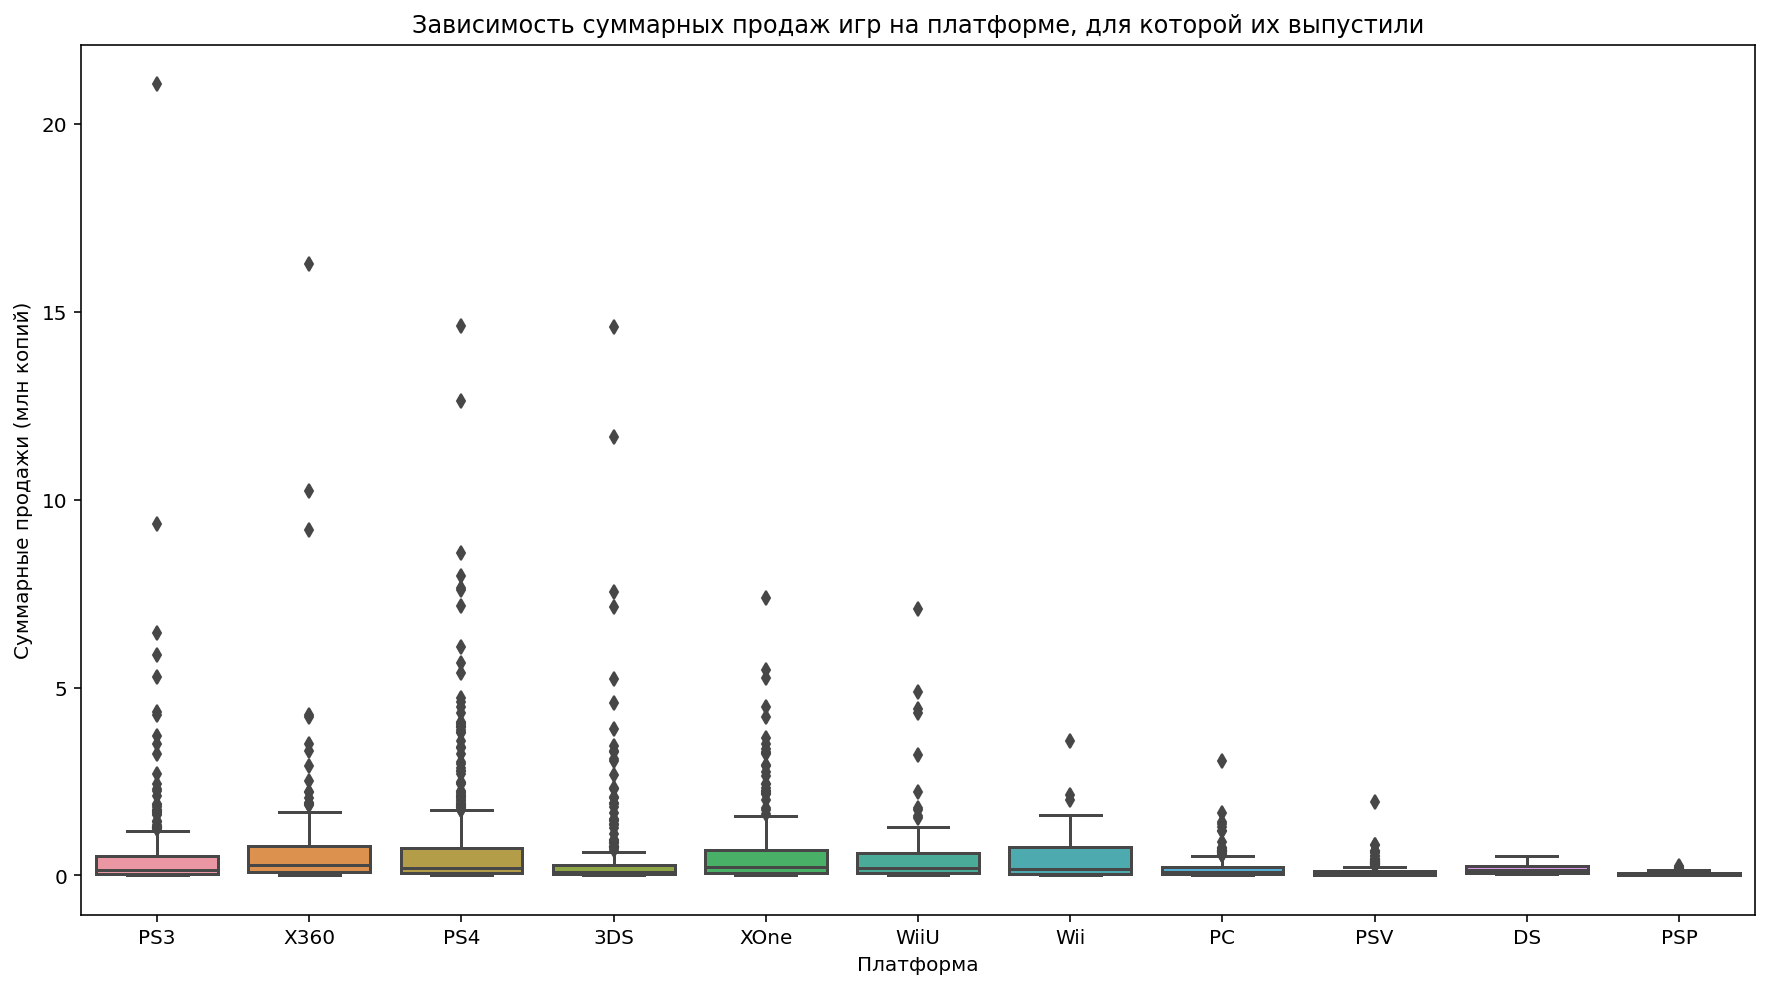

In [23]:
# Строим зависимость суммарных продаж игр на платформе, для которой их выпустили, методом sns.boxplot(), задаем размер графика 
# методом plt.figure():
plt.figure(figsize=(15,8))
ax = sns.boxplot(x=data_act['platform'], y=data_act['gen_sales']);

# Методом set_xlabel() и set_ylabel() меняем названия осей, методом set_title добавляем заголовок:
ax.set_xlabel('Платформа');
ax.set_ylabel('Суммарные продажи (млн копий)');
ax.set_title('Зависимость суммарных продаж игр на платформе, для которой их выпустили');


На получившемся графике наблюдается большой разброс значений и большое число выбросов, уберем их с графика для наглядности.

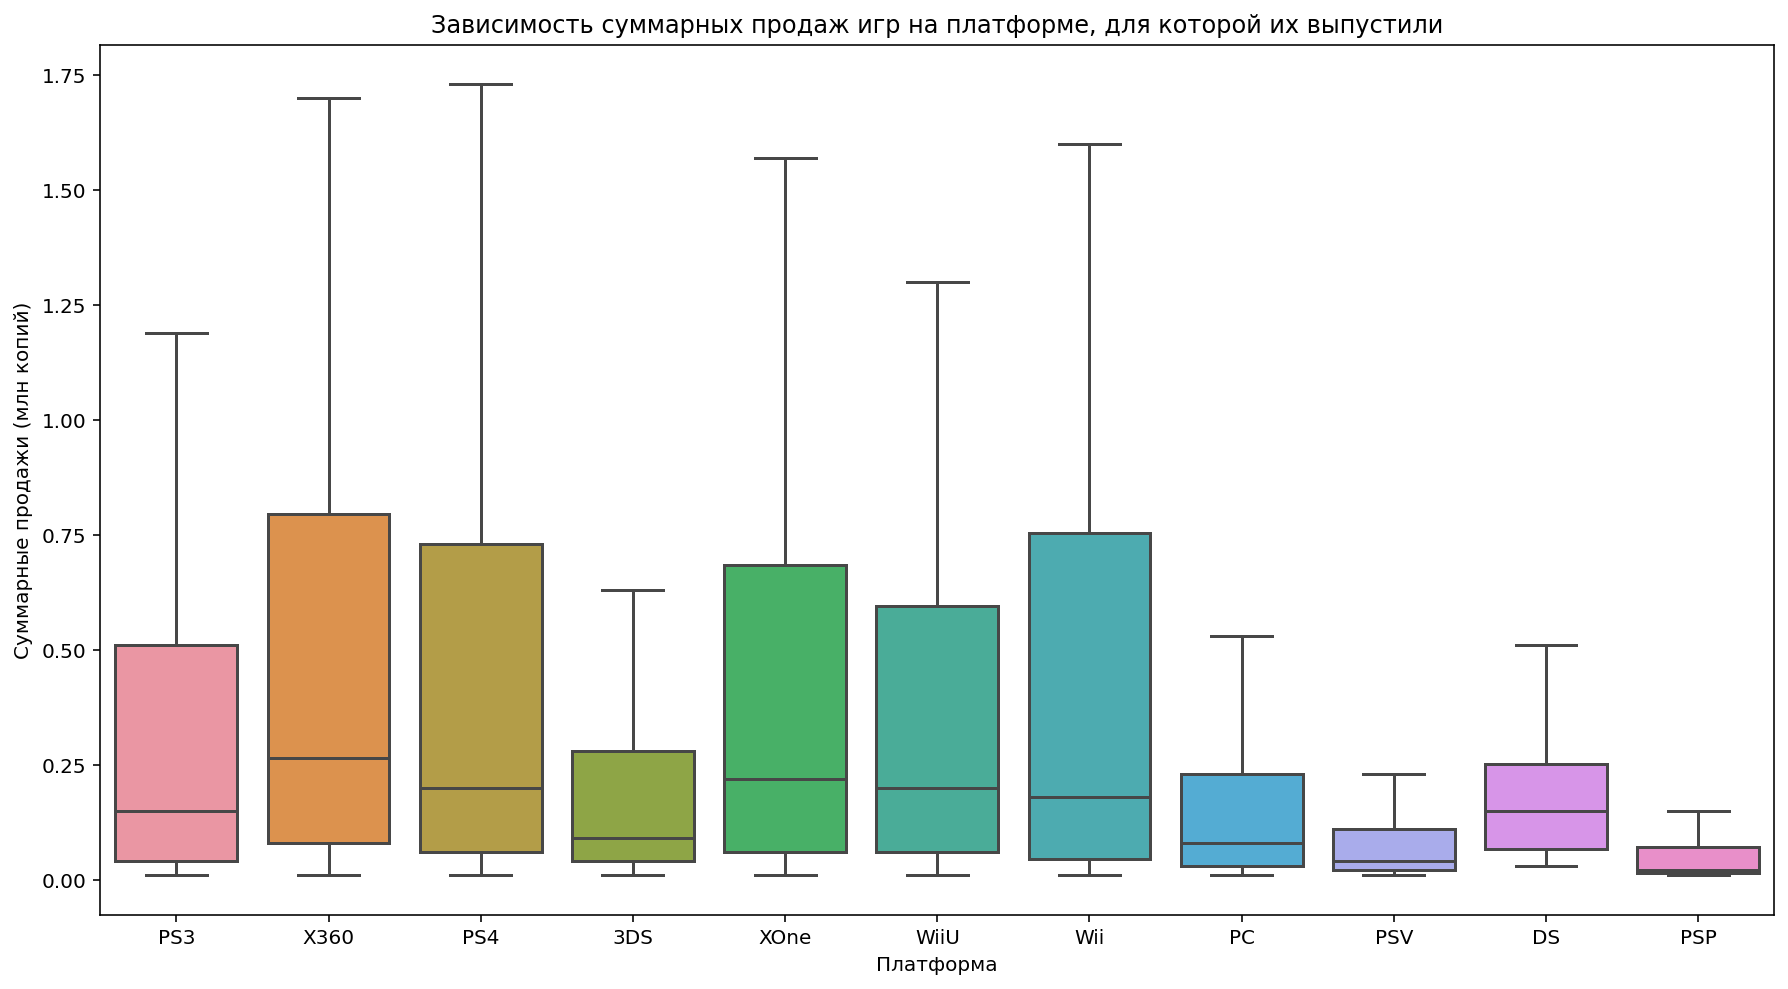

In [24]:
# Строим зависимость суммарных продаж игр на платформе, для которой их выпустили, методом sns.boxplot(), для большей наглядности 
# убираем с графика выбросы параметром showfliers=False, задаем размер графика методом plt.figure():
plt.figure(figsize=(15,8))
ax = sns.boxplot(x=data_act['platform'], y=data_act['gen_sales'], showfliers=False);

# Методом set_xlabel() и set_ylabel() меняем названия осей, методом set_title добавляем заголовок:
ax.set_xlabel('Платформа');
ax.set_ylabel('Суммарные продажи (млн копий)');
ax.set_title('Зависимость суммарных продаж игр на платформе, для которой их выпустили');


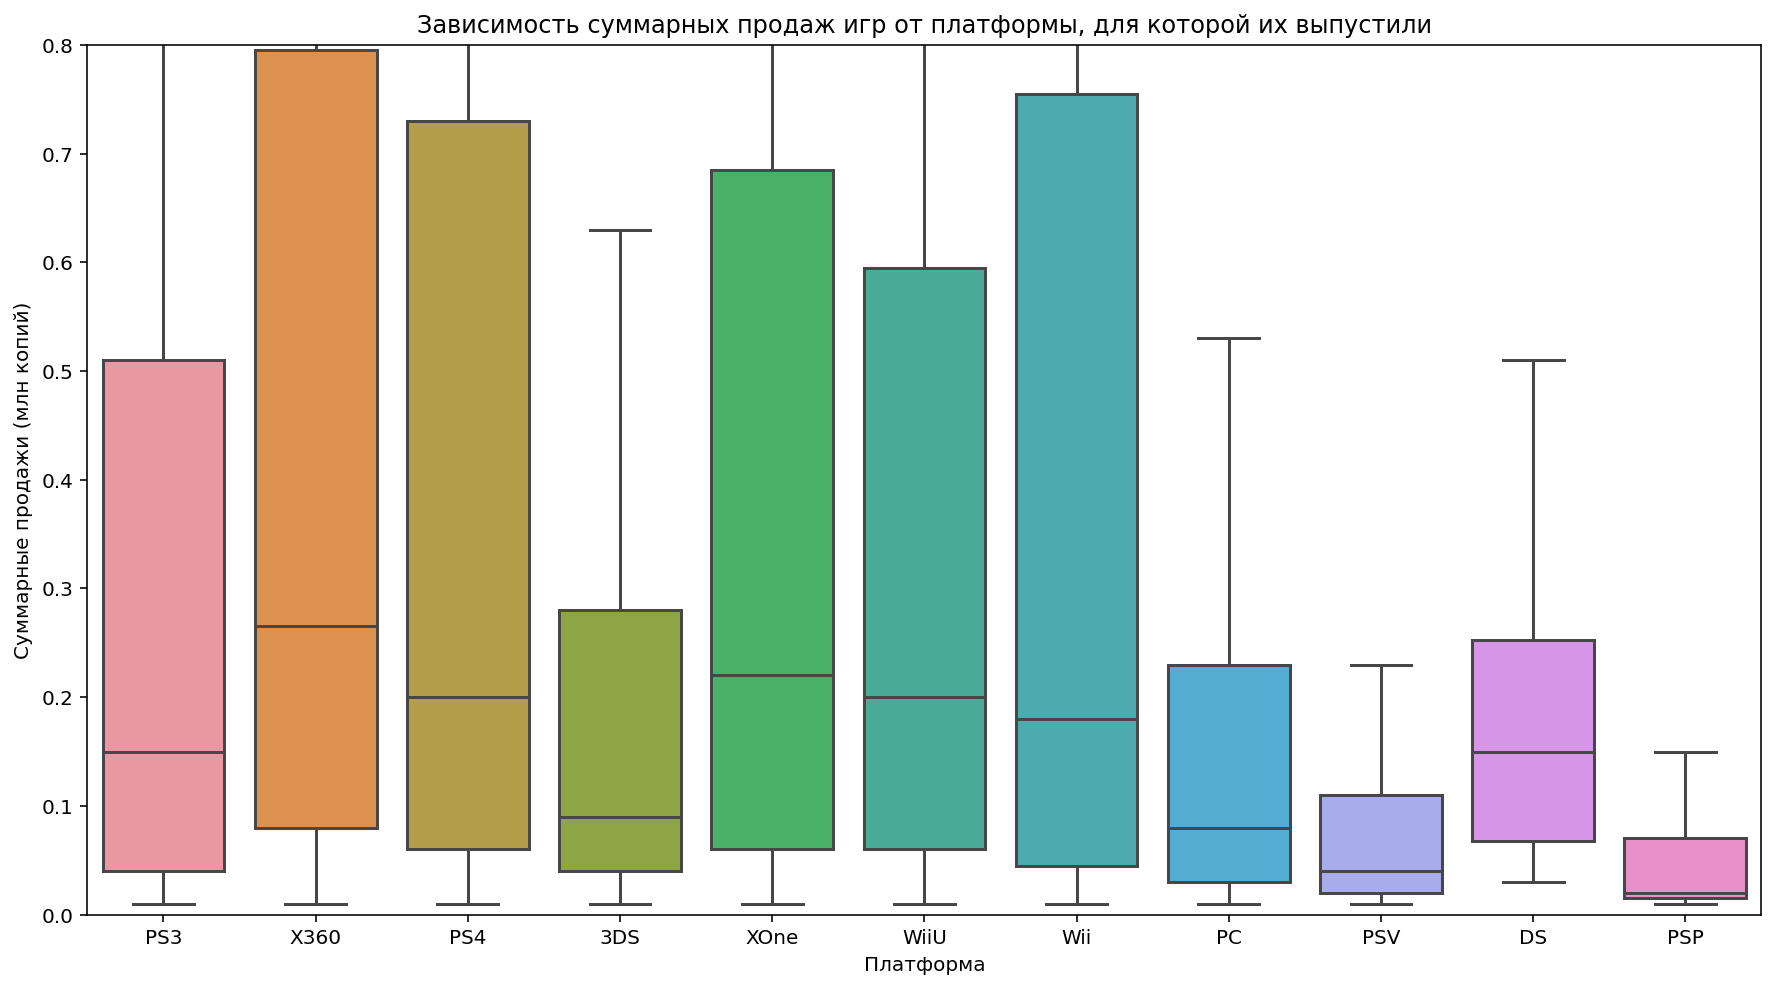

In [25]:
# Изменим дипазон значений по оси оу,чтобы было "ящики с усами" платформ PSV и PSP
plt.figure(figsize=(15,8))
ax = sns.boxplot(x=data_act['platform'], y=data_act['gen_sales'], showfliers=False);
ax.set_xlabel('Платформа');
ax.set_ylabel('Суммарные продажи (млн копий)');
ax.set_title('Зависимость суммарных продаж игр от платформы, для которой их выпустили');
ax.set_ylim(0, 0.8);

Все полученные на графике распределения смещены влево, нижний «ус» каждого из них упирается в 0 (кроме платформы DS), т.е в минимальное значение. Значения, которые отсёк верхний «ус»  — редкие, как правило, они не превышают 1,75 млн копий. Медианные значения средних суммарных продаж на платформах PS3, PS4, XОne, WiiU, Wii, DS близки, значительно отклоняются от своих средних значений и находятся в диапазоне 0,12-0,25 млн копий. Медианные значения продаж на остальных платформах менее 0,1 млн копий.

### Посмотрим, как влияют на продажи внутри каждой платформы отзывы пользователей и критиков 

Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами игр на каждой платформе. 

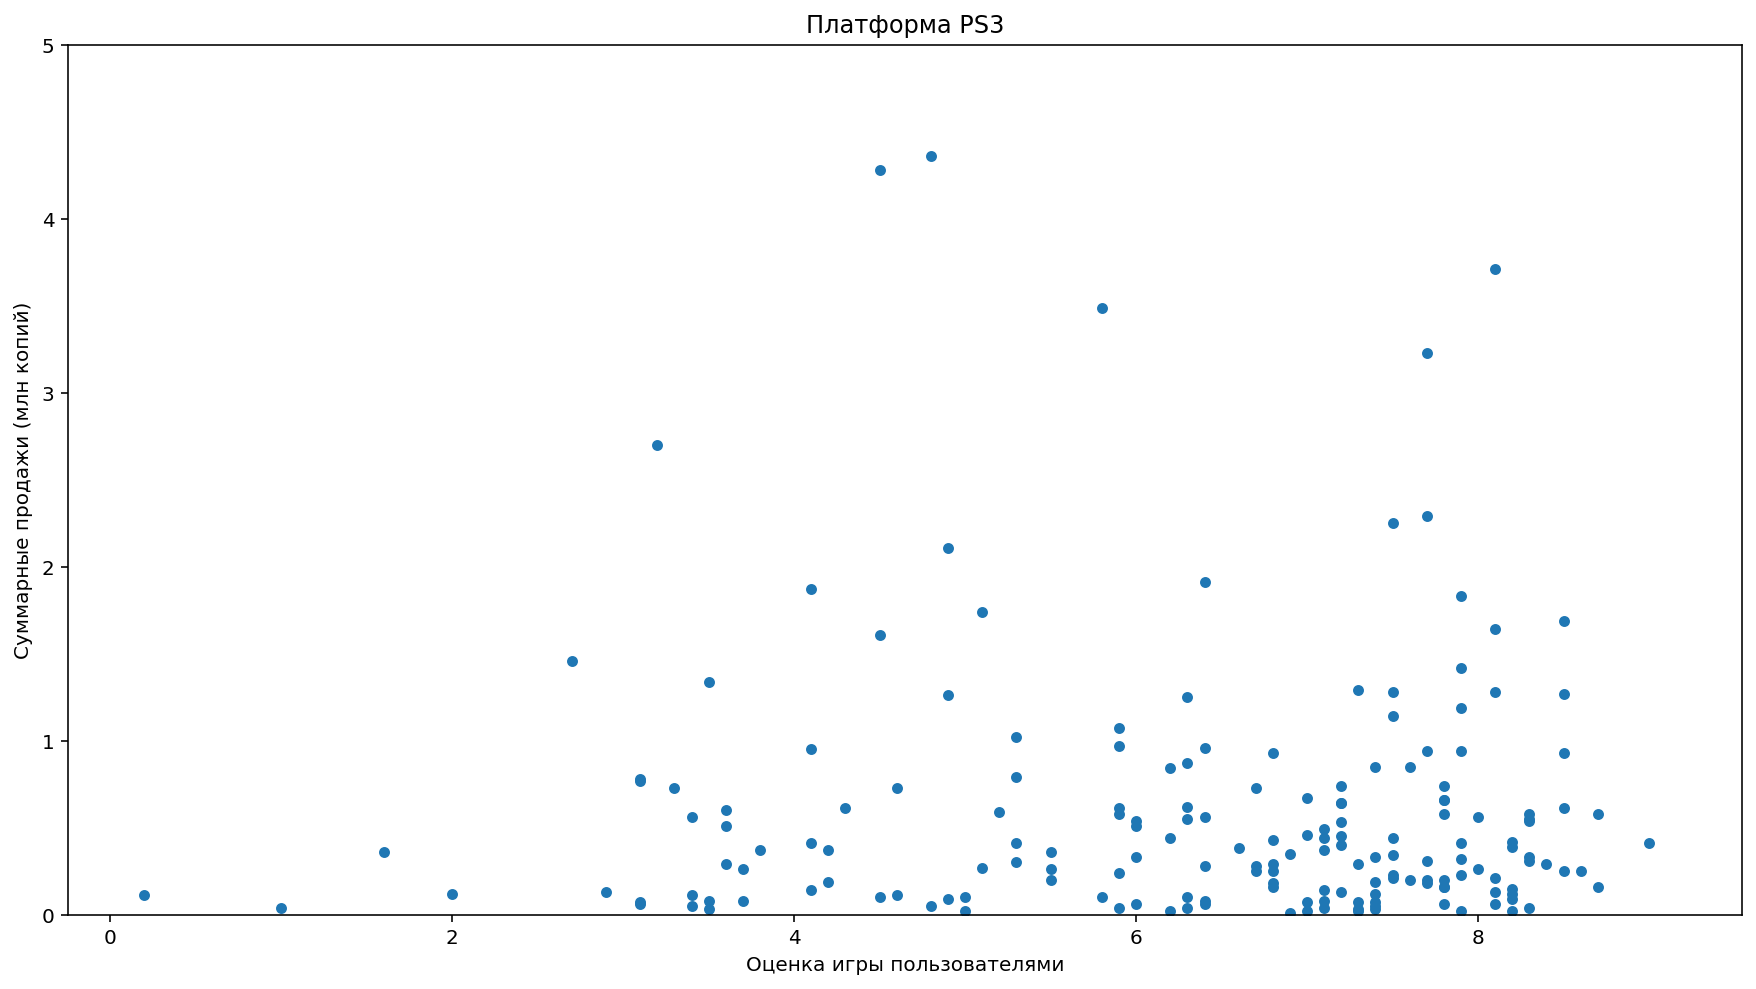

Коэффициент корреляции PS3: 0.0023944027357566925


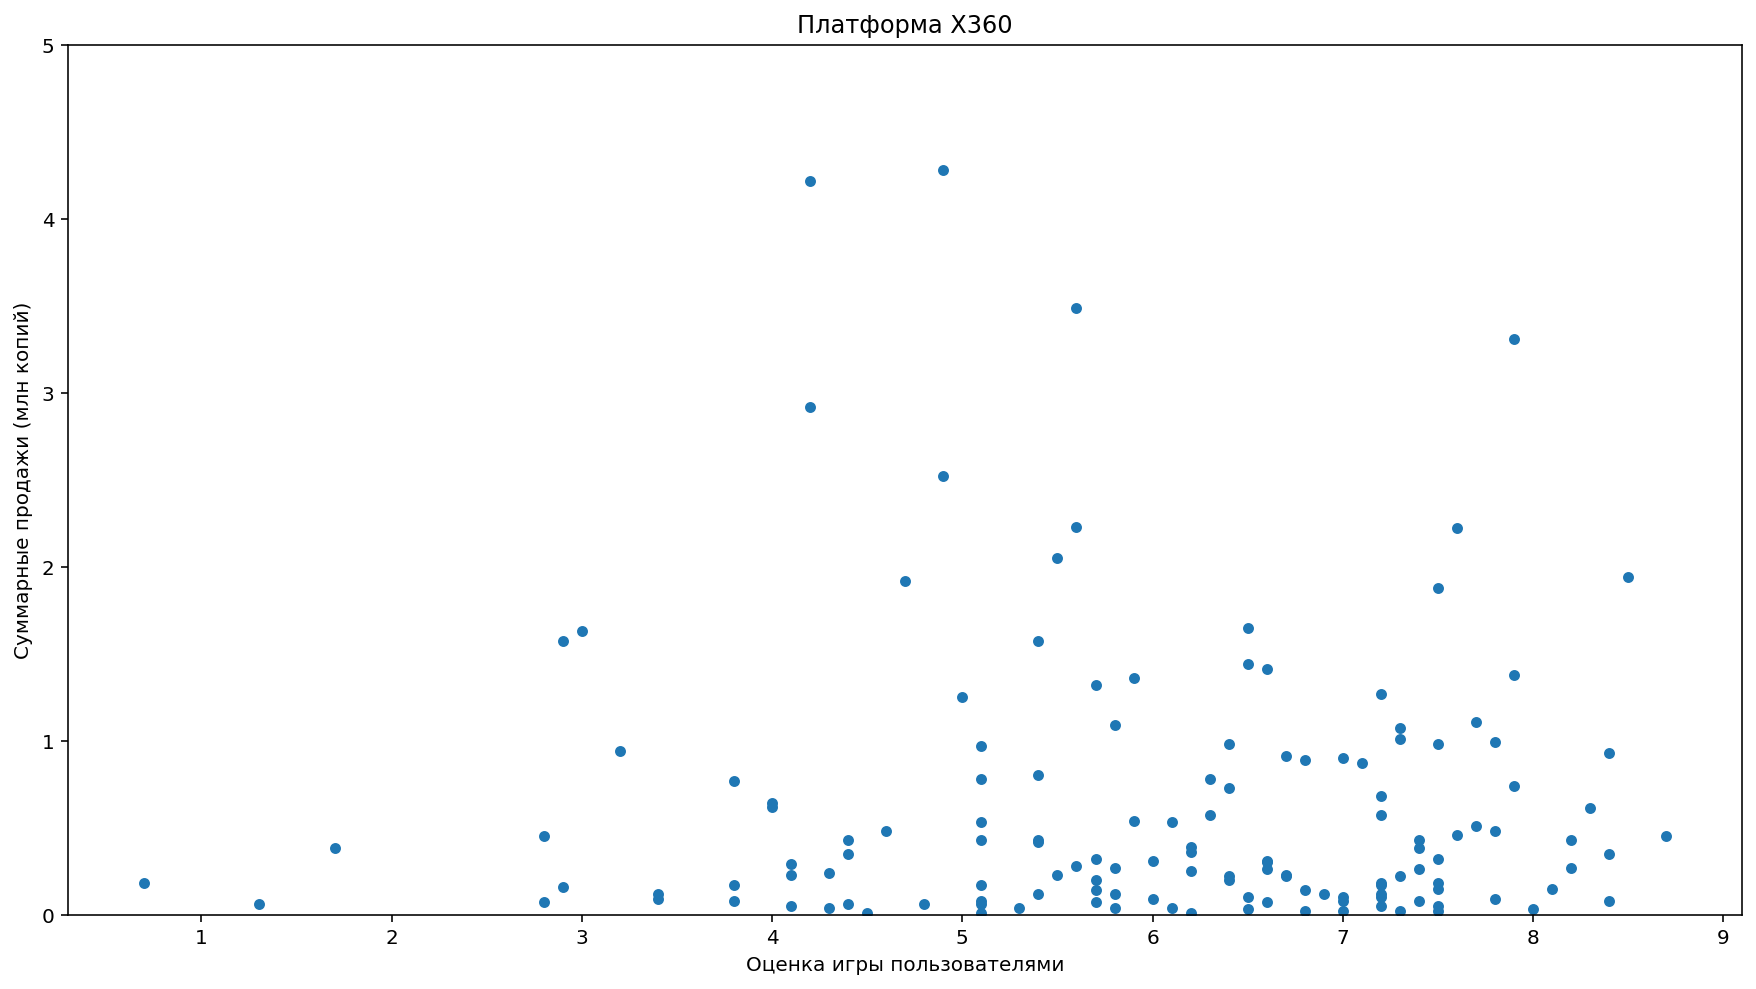

Коэффициент корреляции X360: -0.011742185147181342


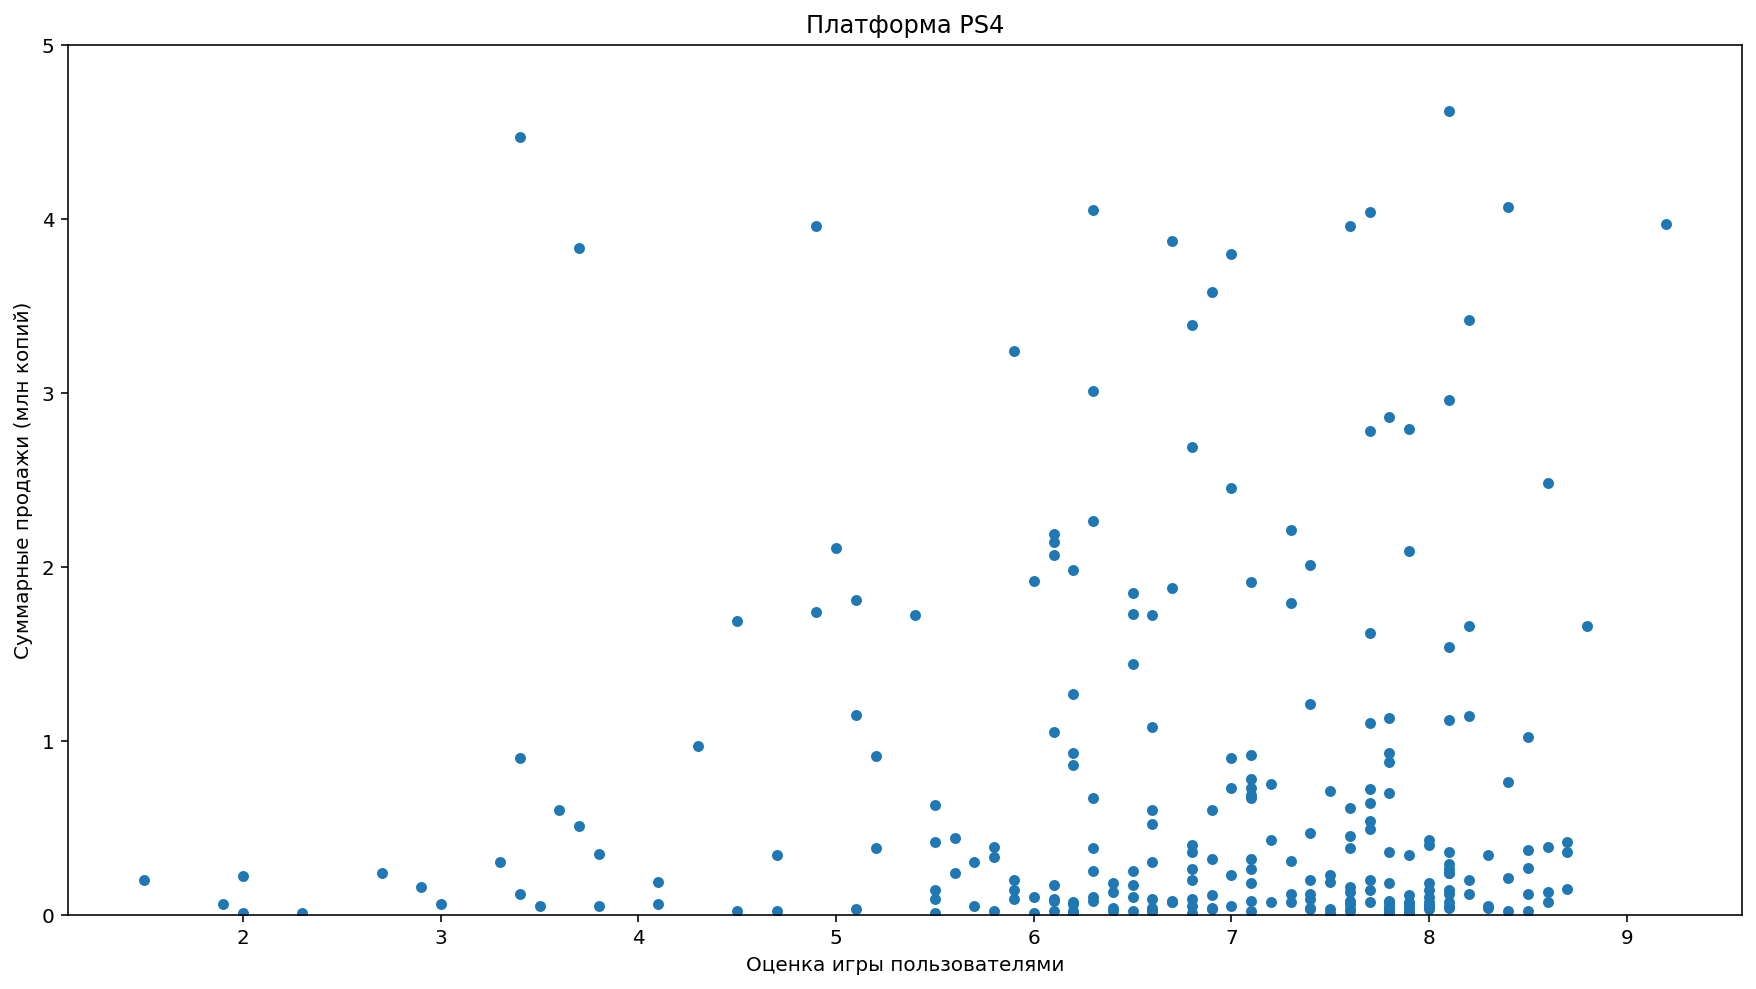

Коэффициент корреляции PS4: -0.031957110204556376


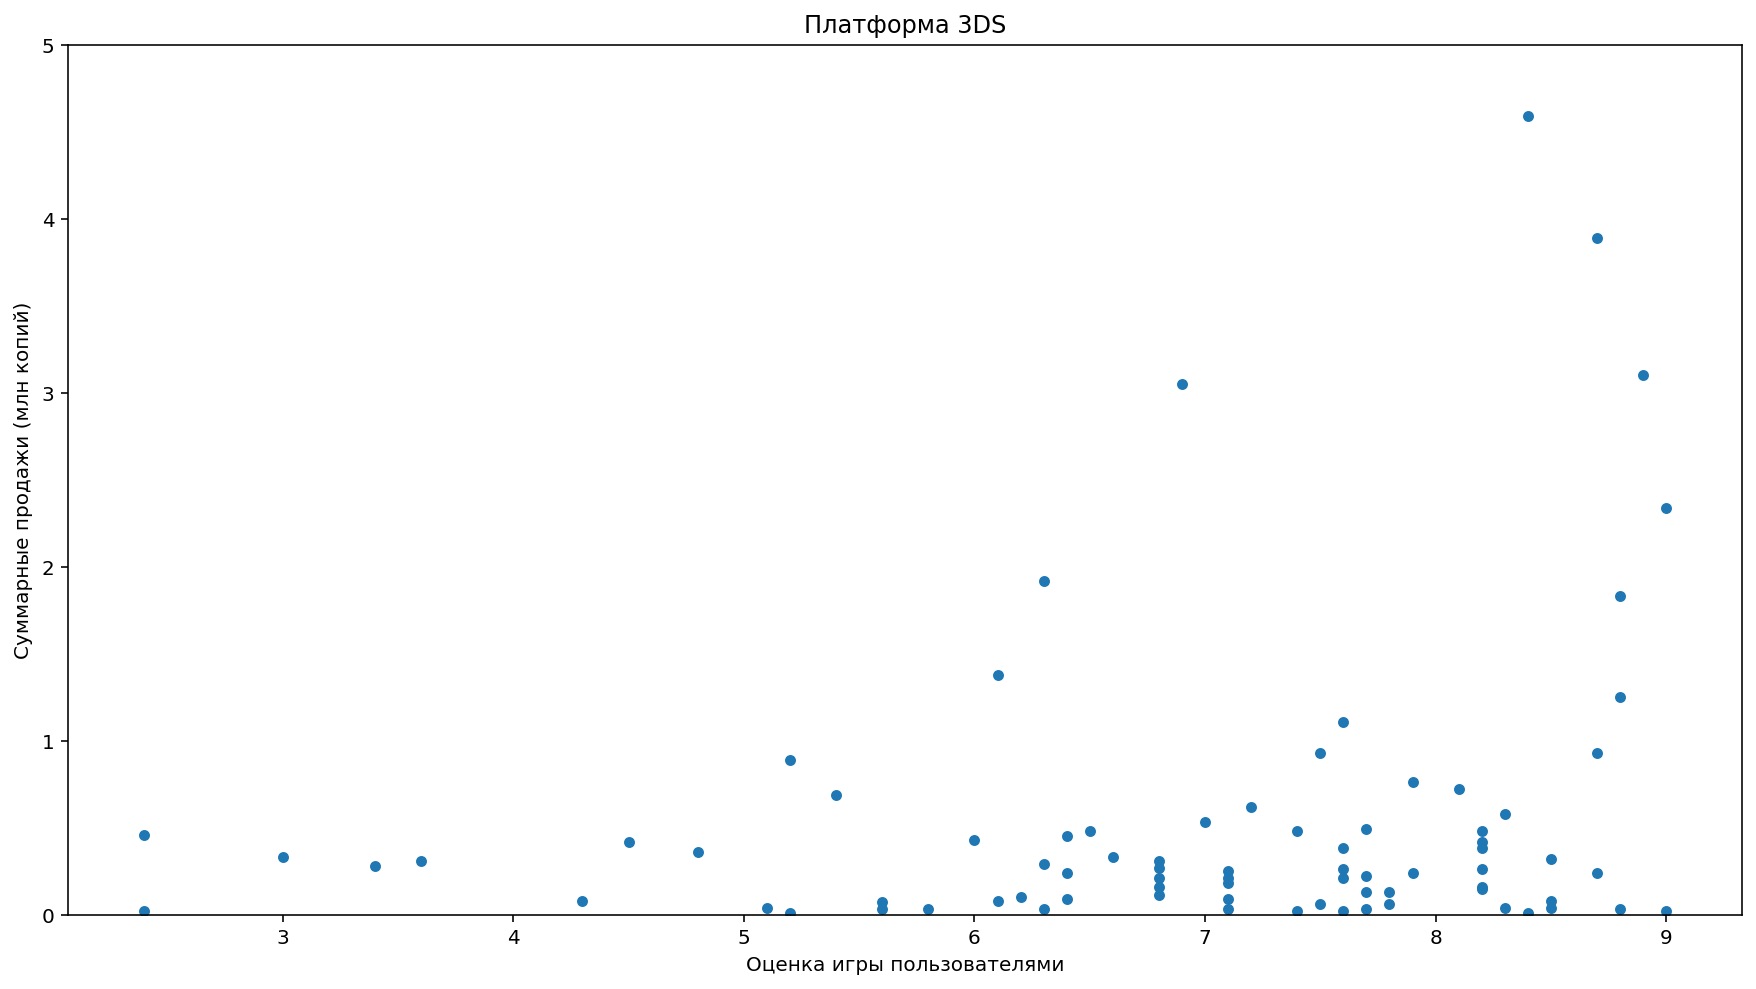

Коэффициент корреляции 3DS: 0.24150411773563016


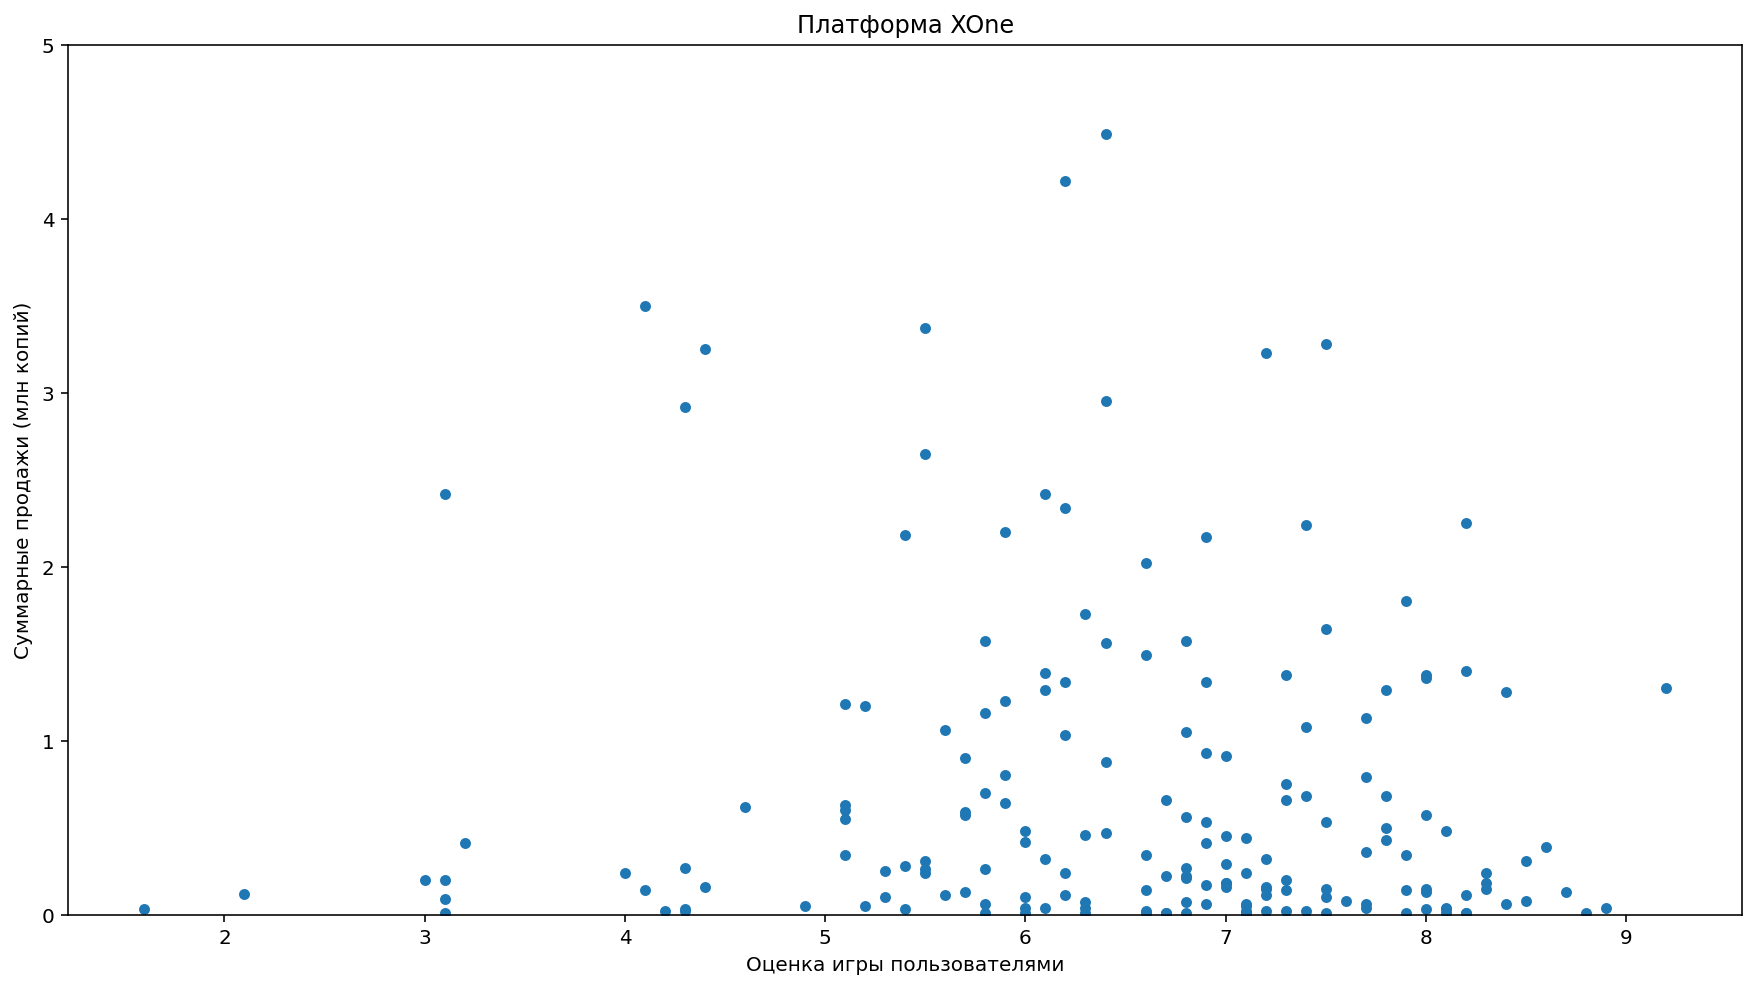

Коэффициент корреляции XOne: -0.06892505328279414


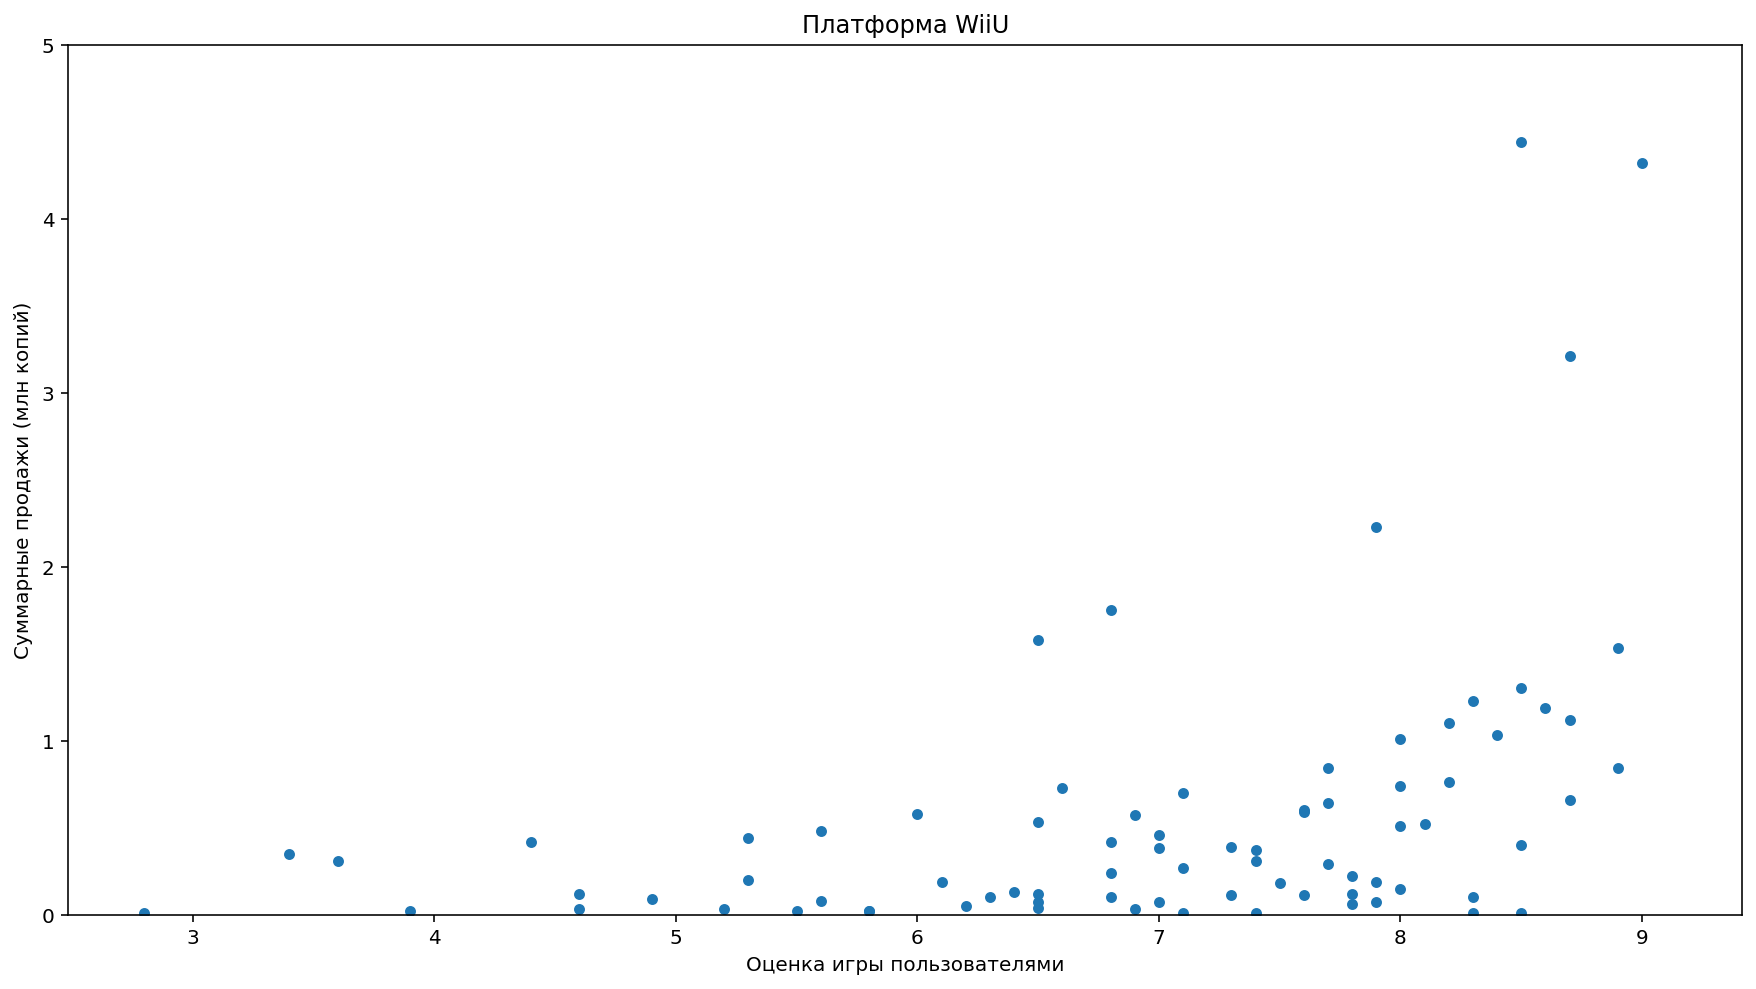

Коэффициент корреляции WiiU: 0.4193304819266187


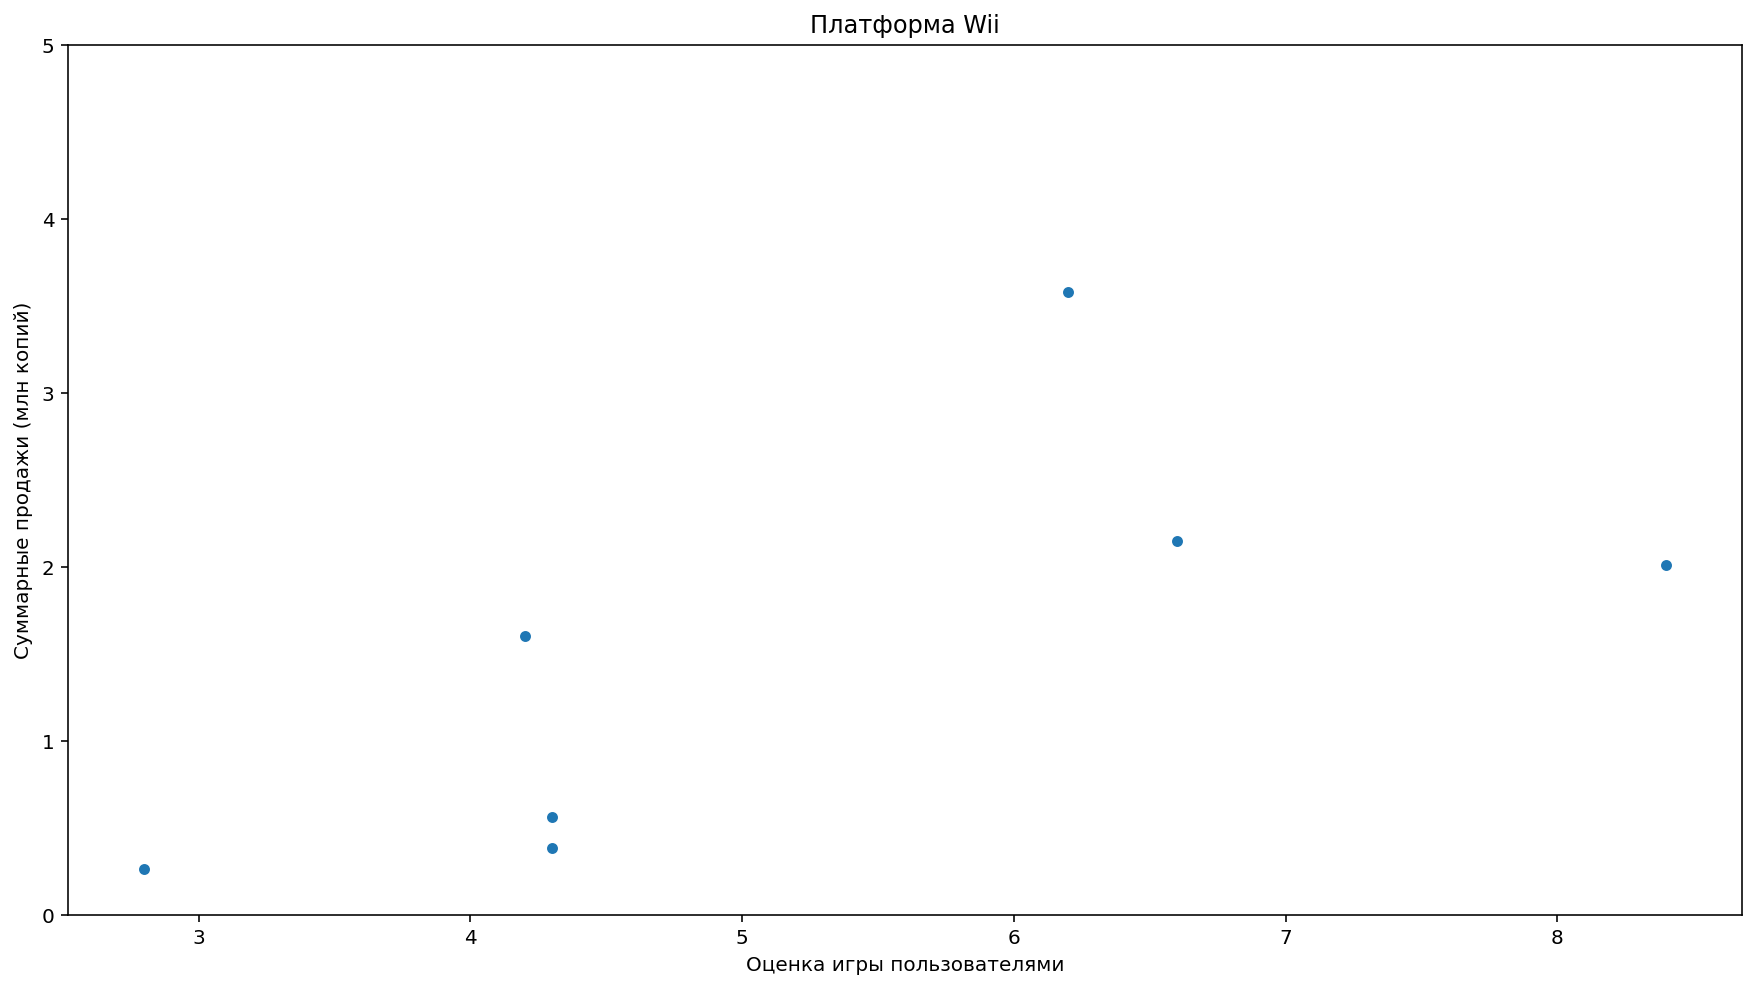

Коэффициент корреляции Wii: 0.6829417215362368


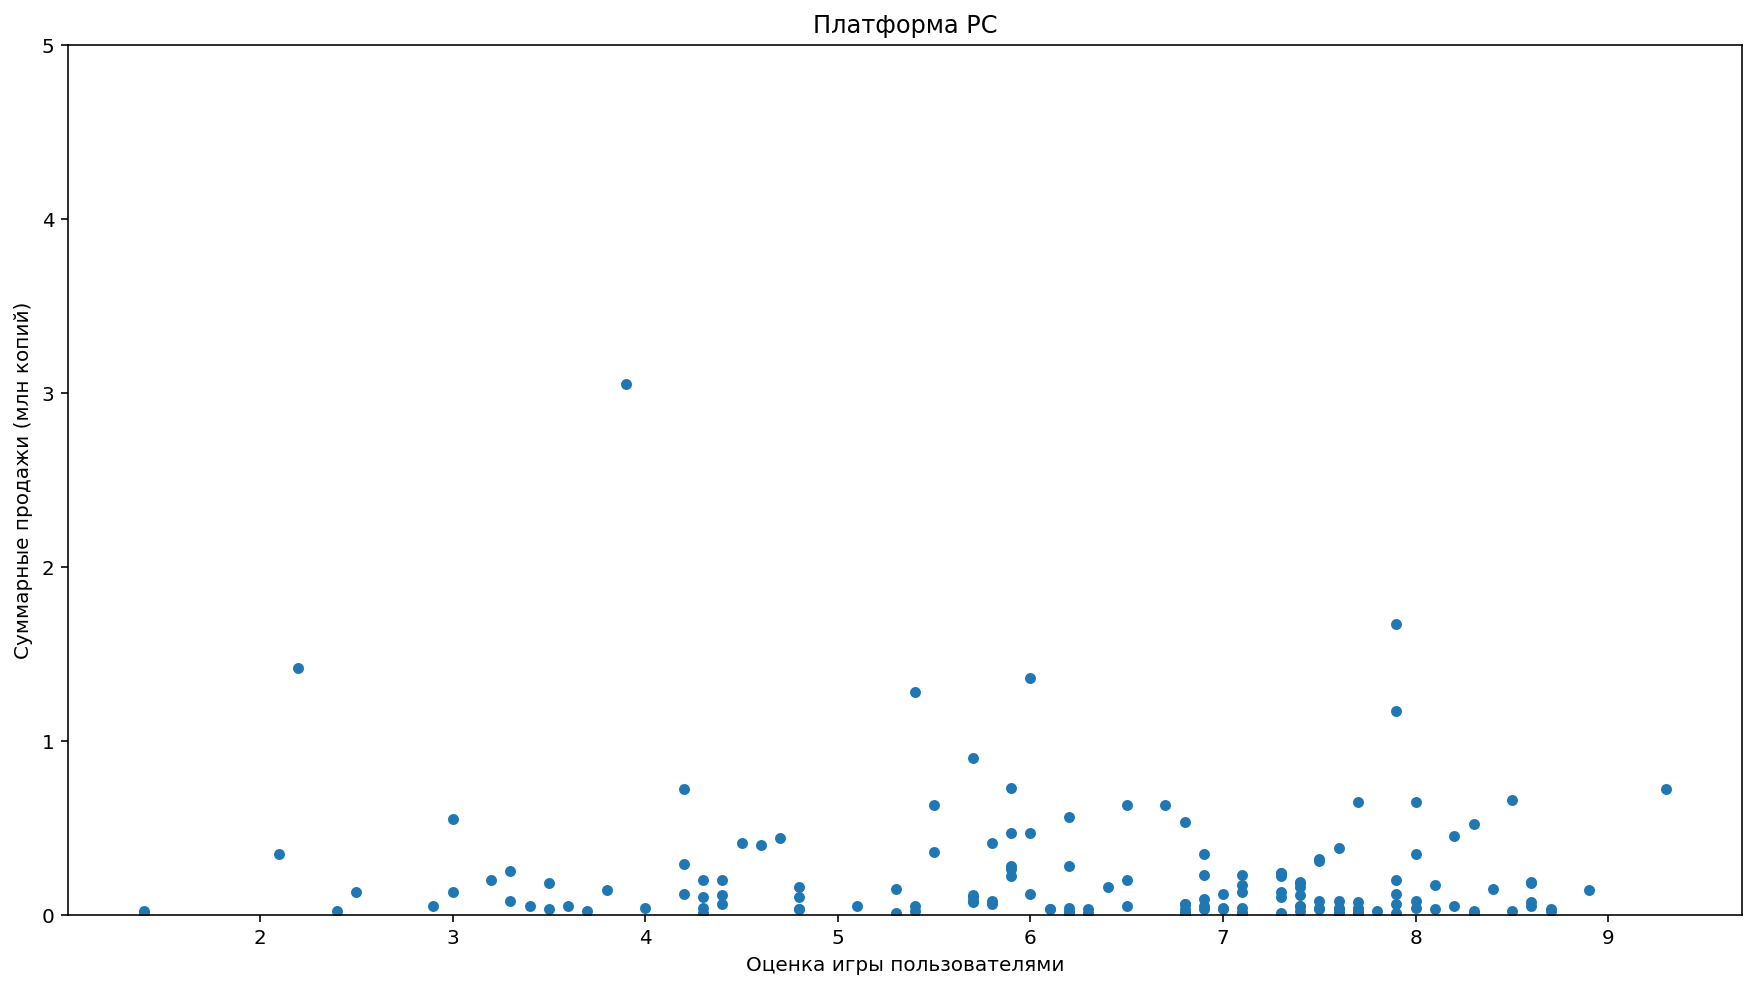

Коэффициент корреляции PC: -0.0938418695247674


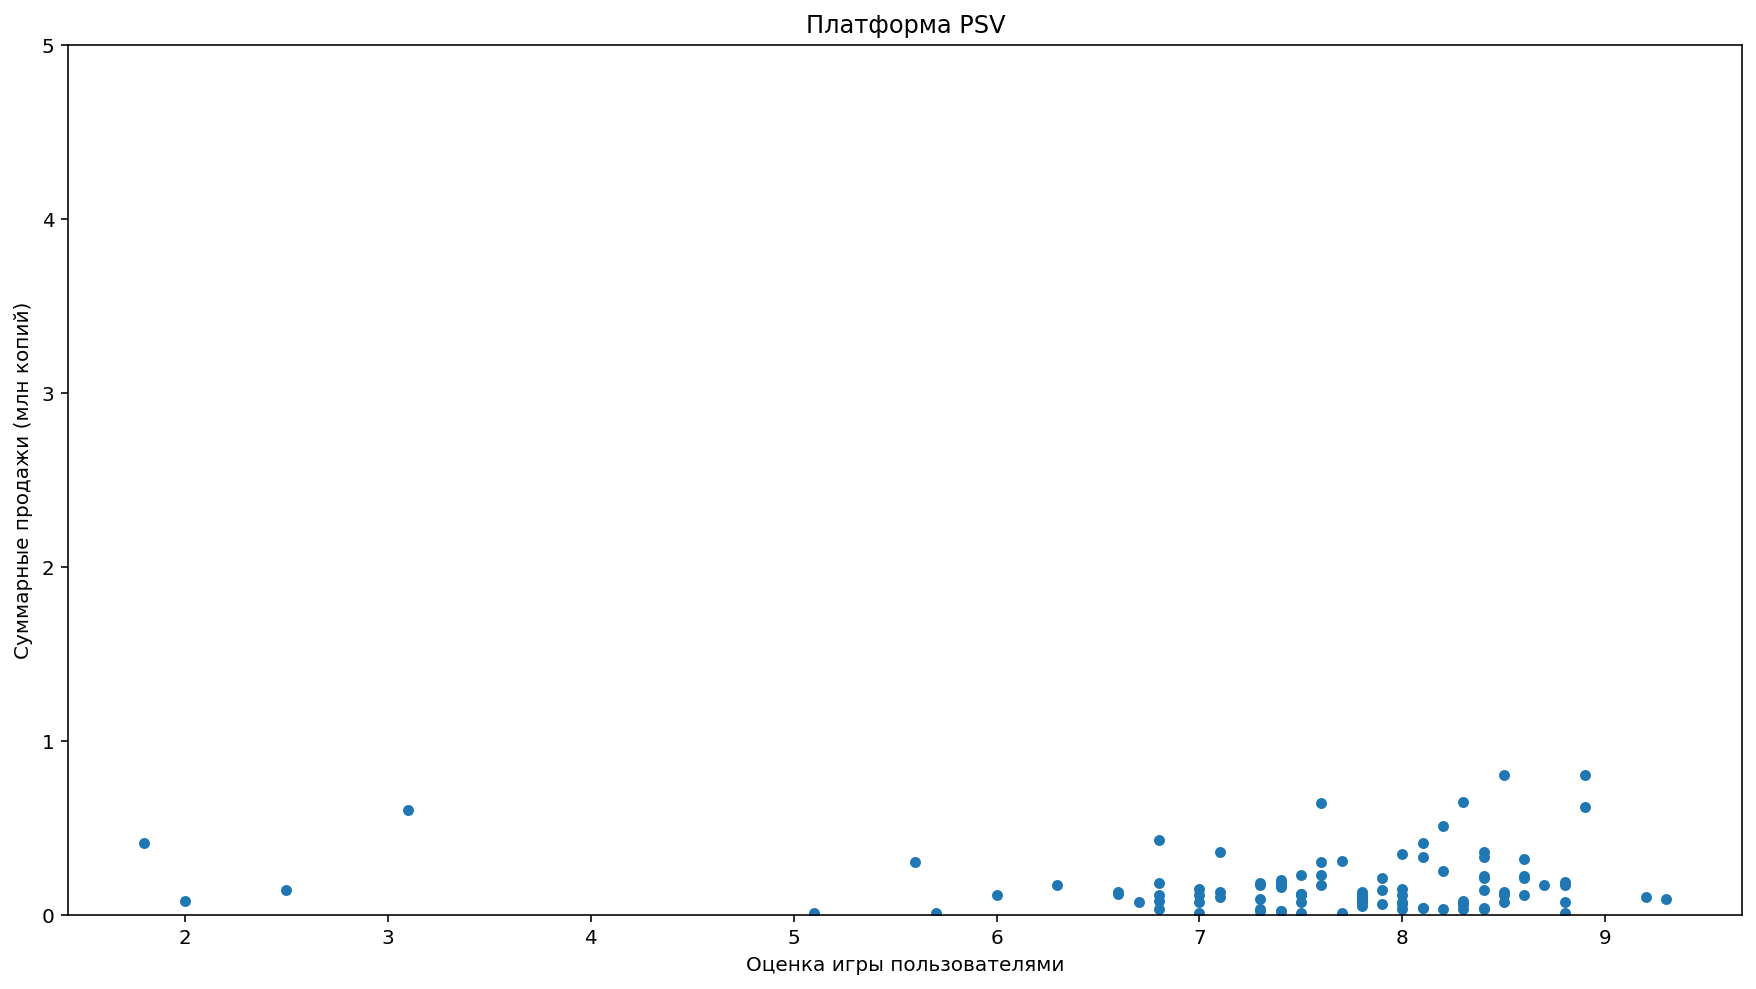

Коэффициент корреляции PSV: 0.0009424723319108626


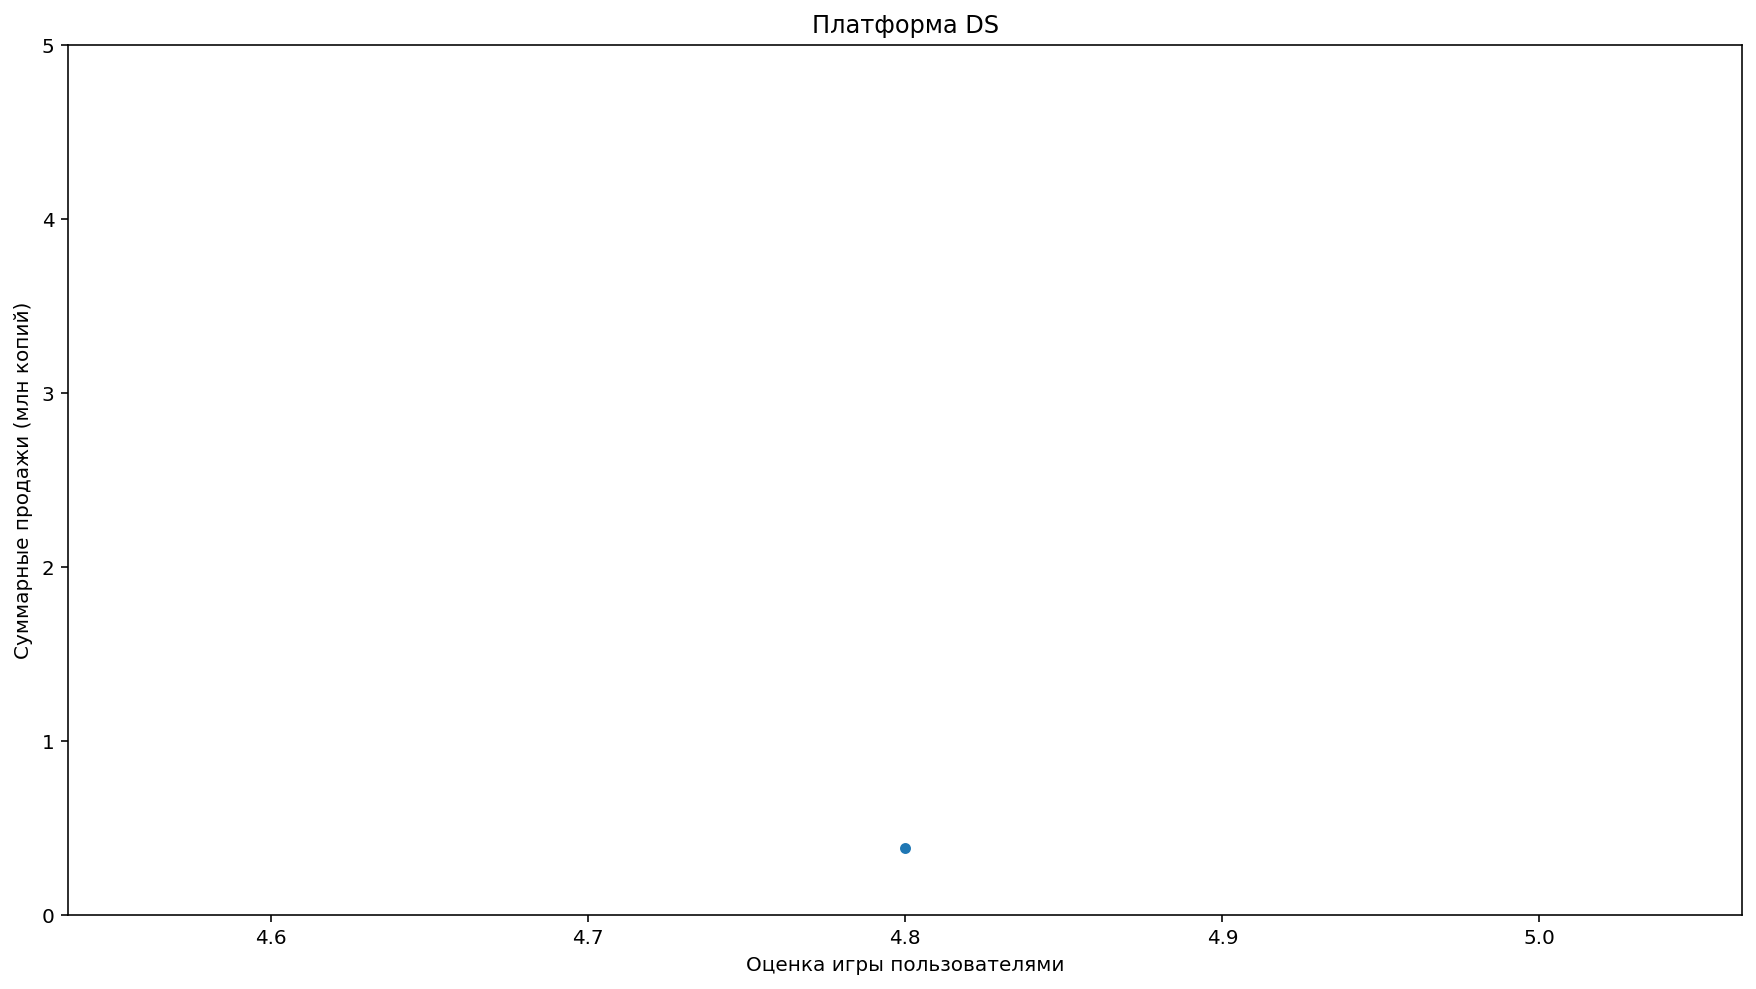

Коэффициент корреляции DS: nan


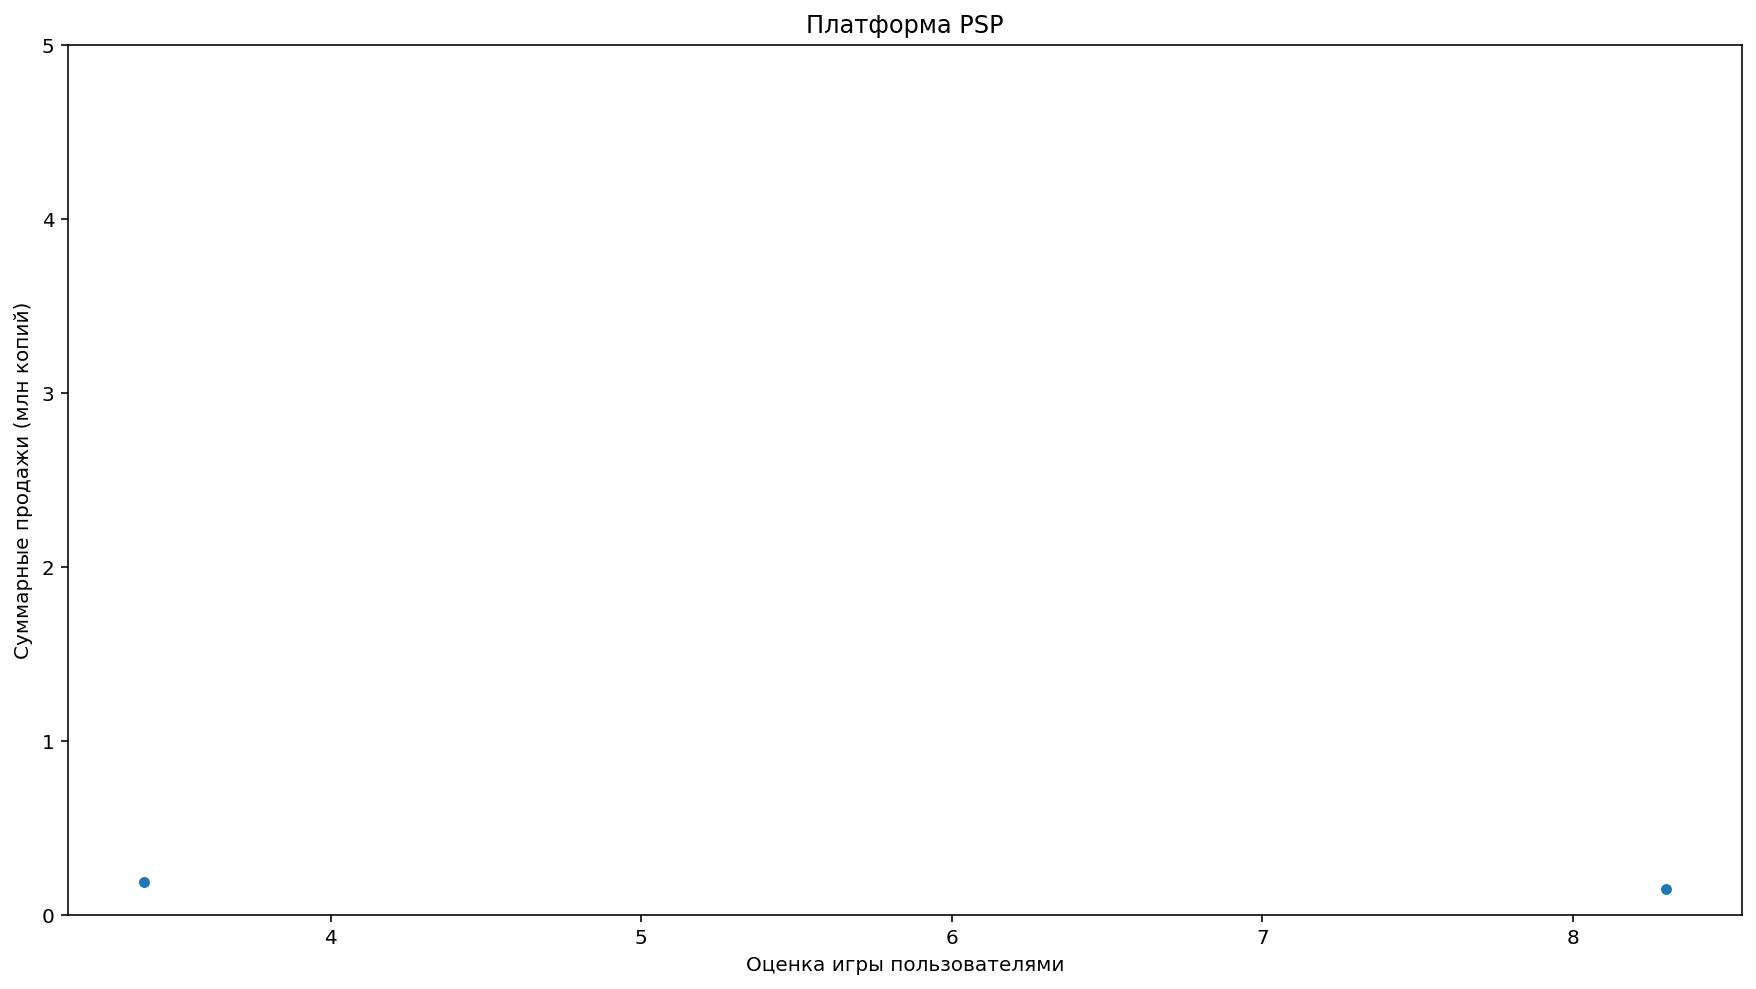

Коэффициент корреляции PSP: -0.9999999999999999


In [26]:
# Для игнорирования предупрждений вводим специальный метод:
warnings.filterwarnings("ignore")

# Циклом for in перебираем каждое уникальное значение столбца с платформами методом unique() и делаем срез данных для каждой 
# платформы в датафрейме за актуальный период и для каждой платформы строим график разброса scatter методом plot для зависимости 
# суммарных продаж от оценки игры пользователями: 
for platform in  data_act['platform'].unique():
   
    data_act.query('platform == @platform').plot(kind='scatter',x='user_score',y='gen_sales', title = f'Платформа {platform}', 
                                                 figsize=(15,8), xlabel='Оценка игры пользователями', 
                                                 ylabel='Суммарные продажи (млн копий)', ylim=(0, 5))
 
    plt.show()
    # Рассчитываем коэффициент корреляции методом corr() для каждой из зависимостей и выводим его на экран:
    print(f'Коэффициент корреляции {platform}:', data_act.query('platform == @platform')['user_score'].corr(data_act.query
                                                                                            ('platform == @platform')
                                                                                            ['gen_sales']))

На таких популярных платформах, как PS4, PS3, X360 и XOne, прямой зависимости между суммарными продажами игр на платформе и оценкой игры, поставленной пользователями не наблюдается, что также подтверждается практически равными нулю коэфффициентами корреляции и очень большим разбросом точек. На остальных платформах также отсуствует какая либо сильная зависимость коэффициенты корреляции, как правило, расположены в диапазоне от 0 до 0,42. 

Данных по оценкам пользователей по платформам DS, Wii и PSP оказалось либо недостаточно для однозначного вывода, либо они полностью отсутствуют в данном актуальном периоде.


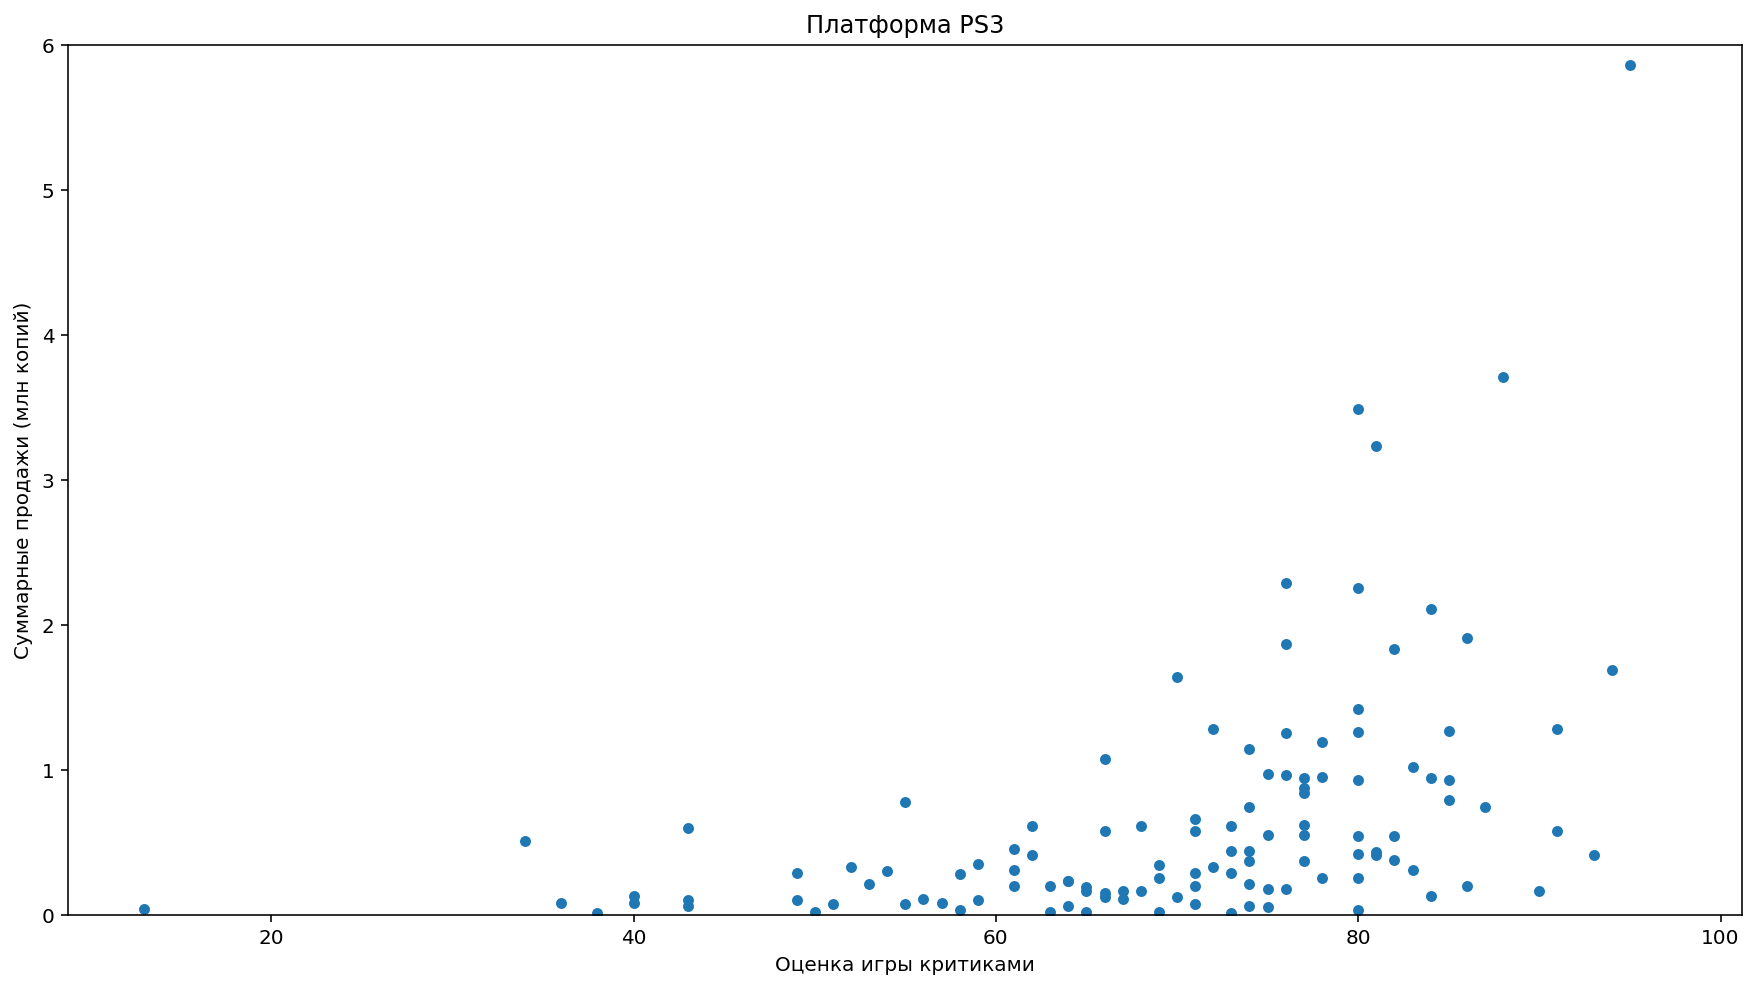

Коэффициент корреляции: 0.3342853393371919


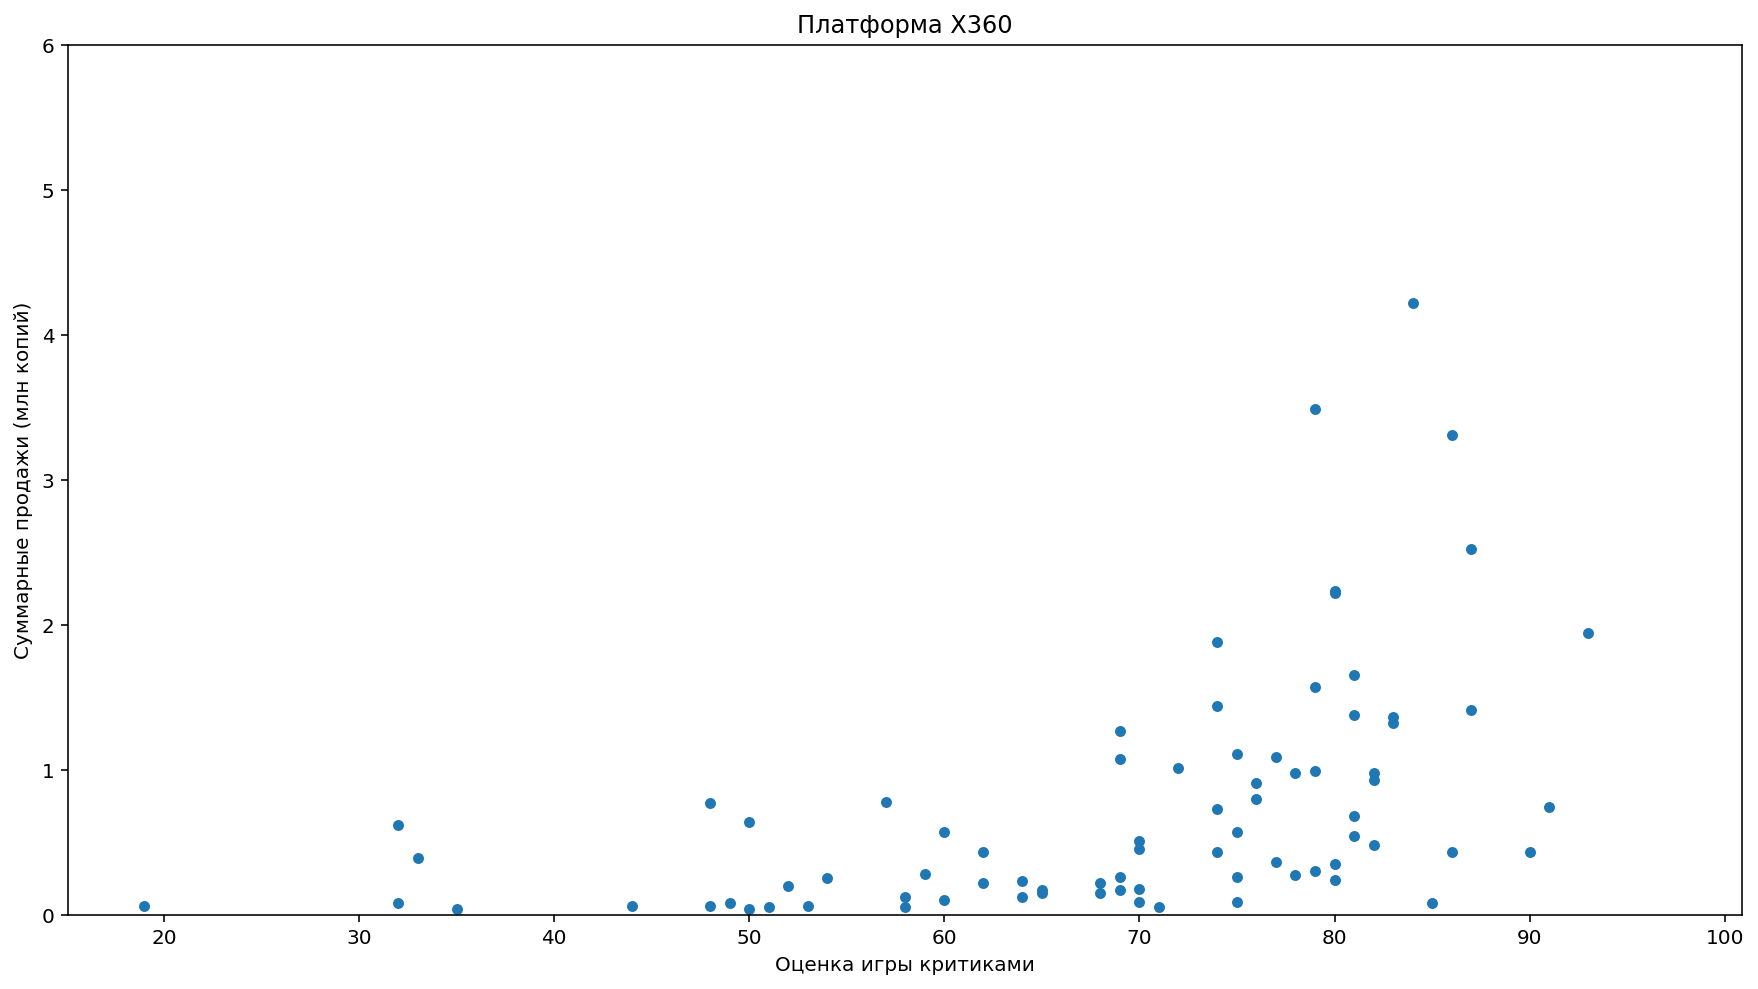

Коэффициент корреляции: 0.3503445460228664


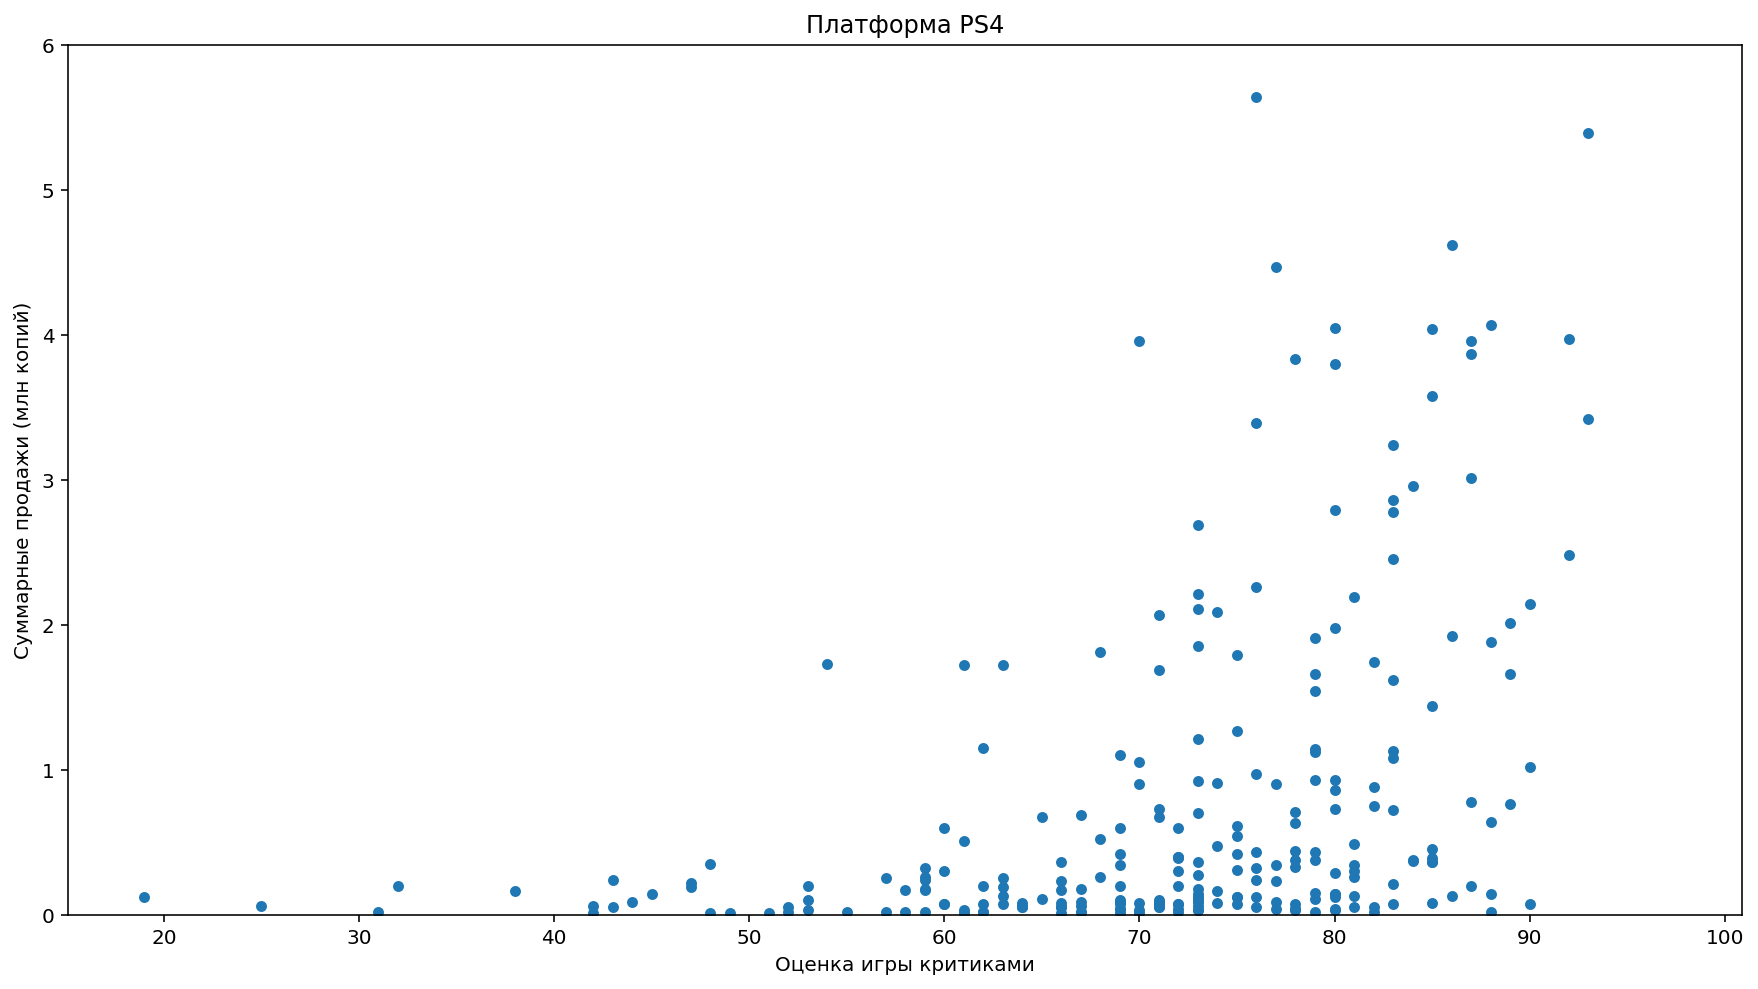

Коэффициент корреляции: 0.40656790206178095


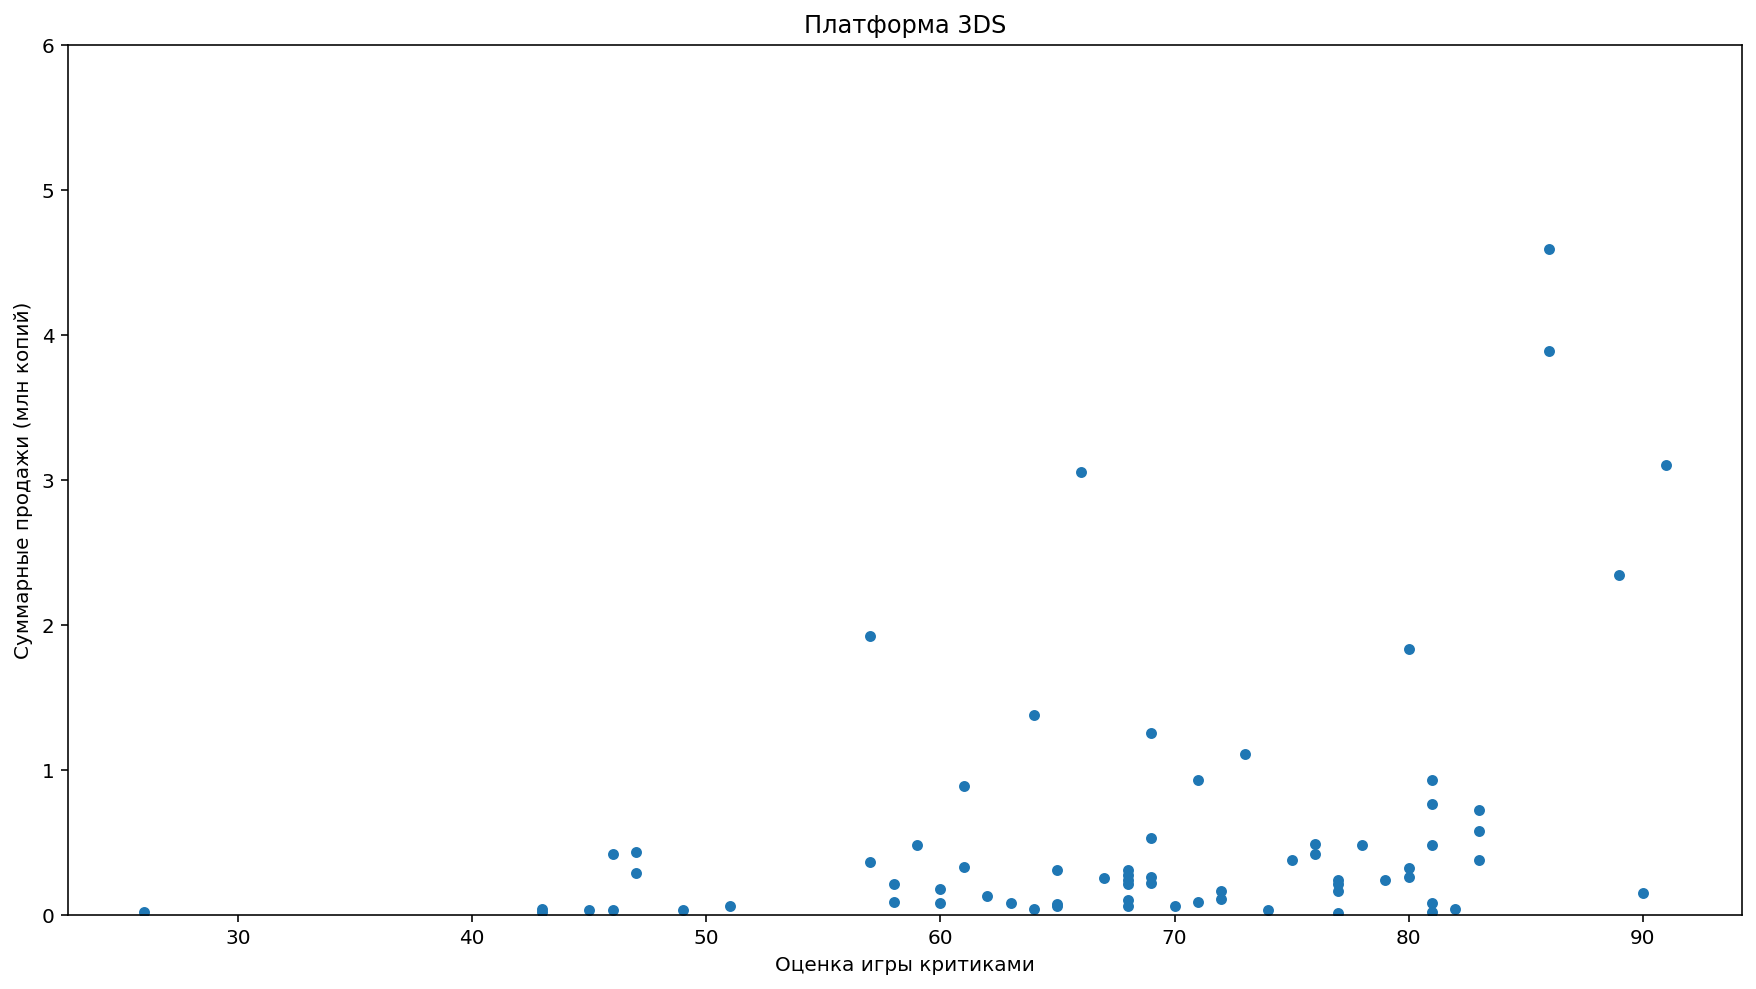

Коэффициент корреляции: 0.3570566142288103


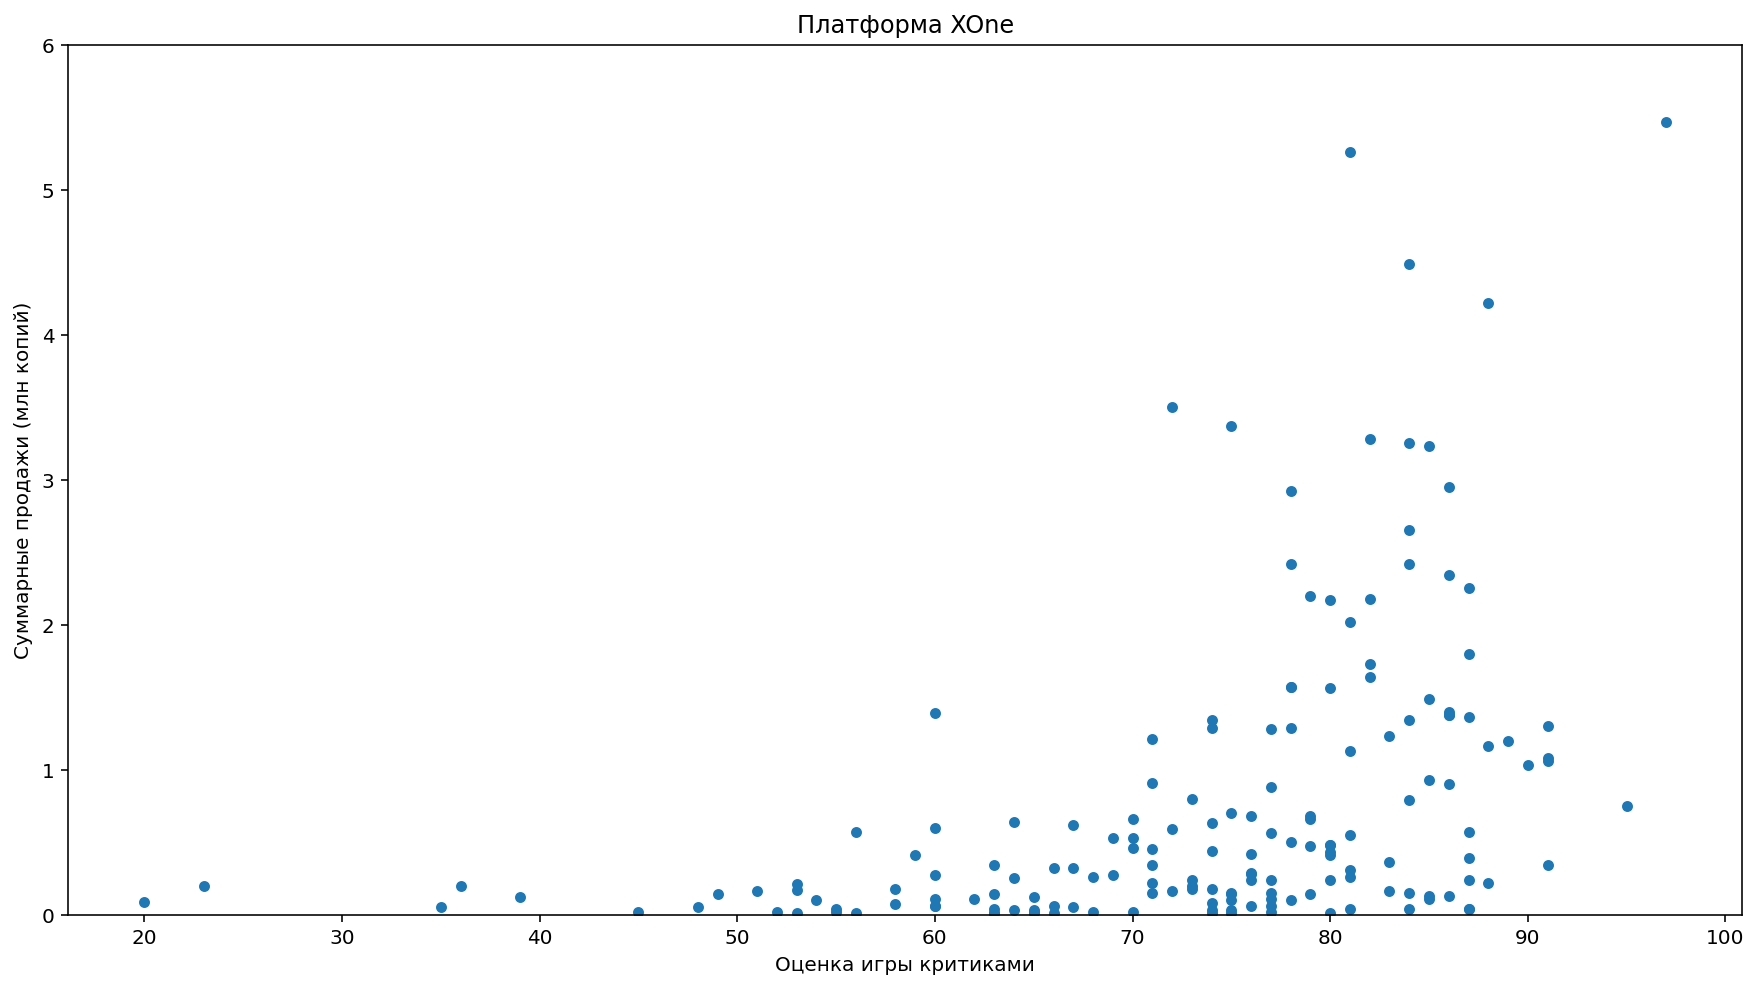

Коэффициент корреляции: 0.4169983280084017


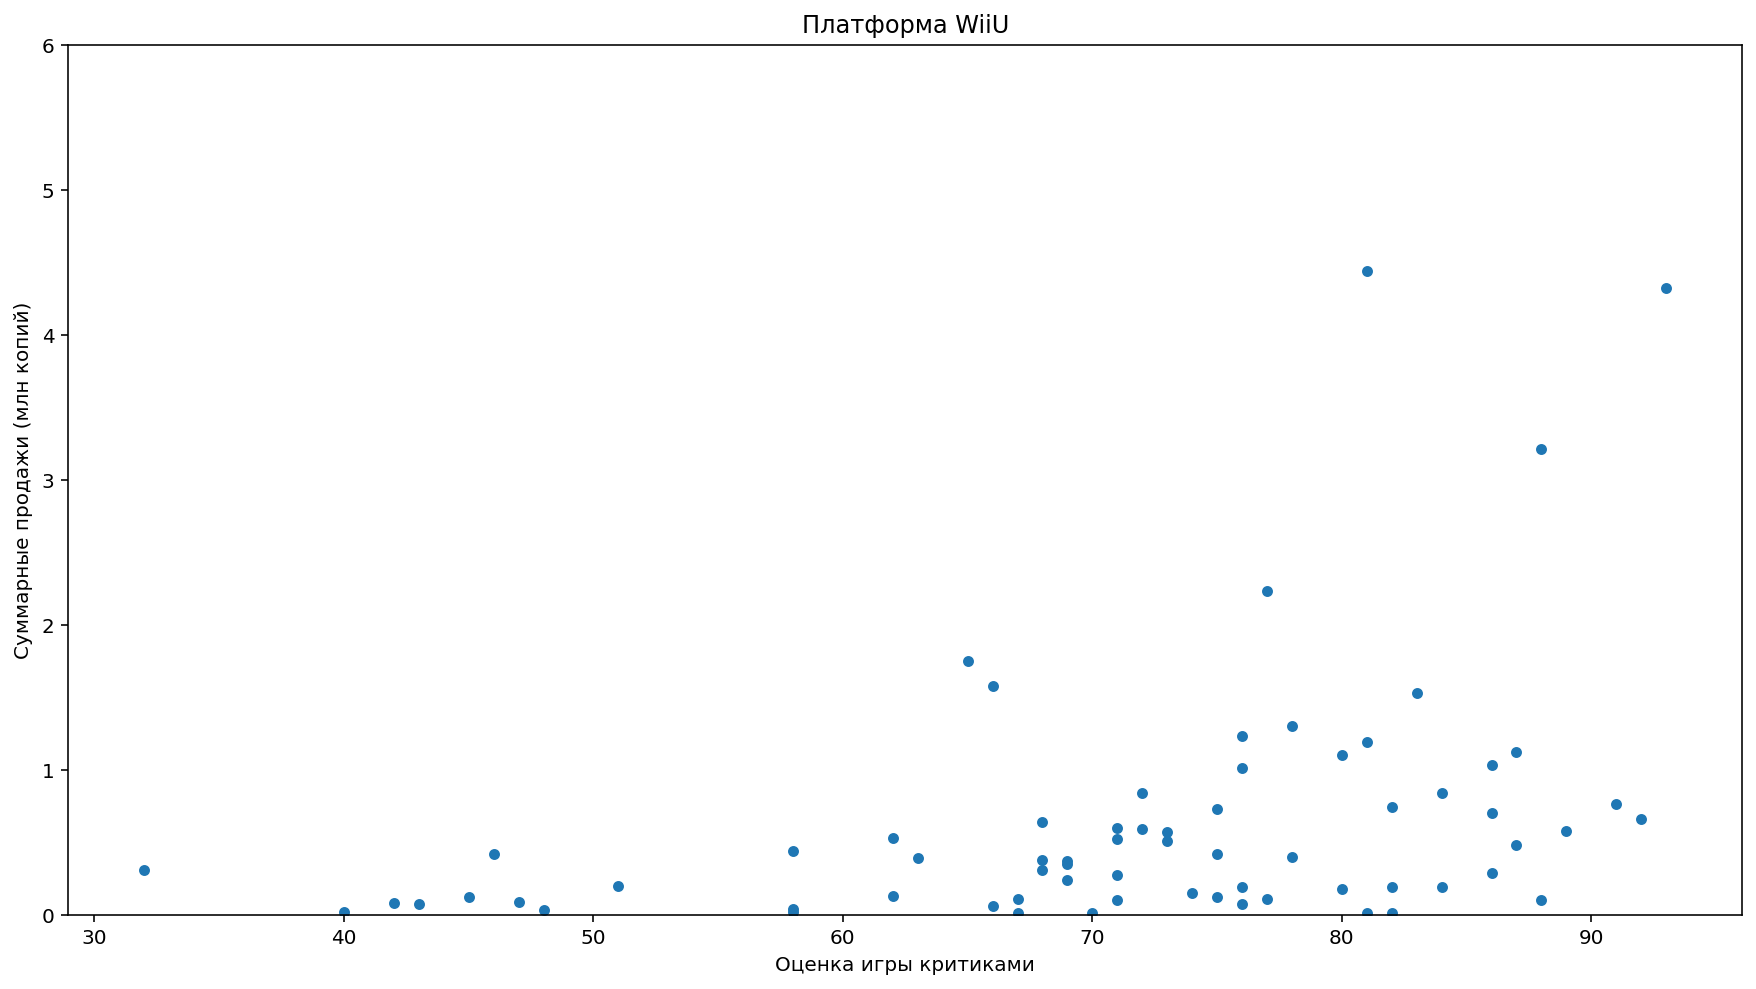

Коэффициент корреляции: 0.3764149065423912


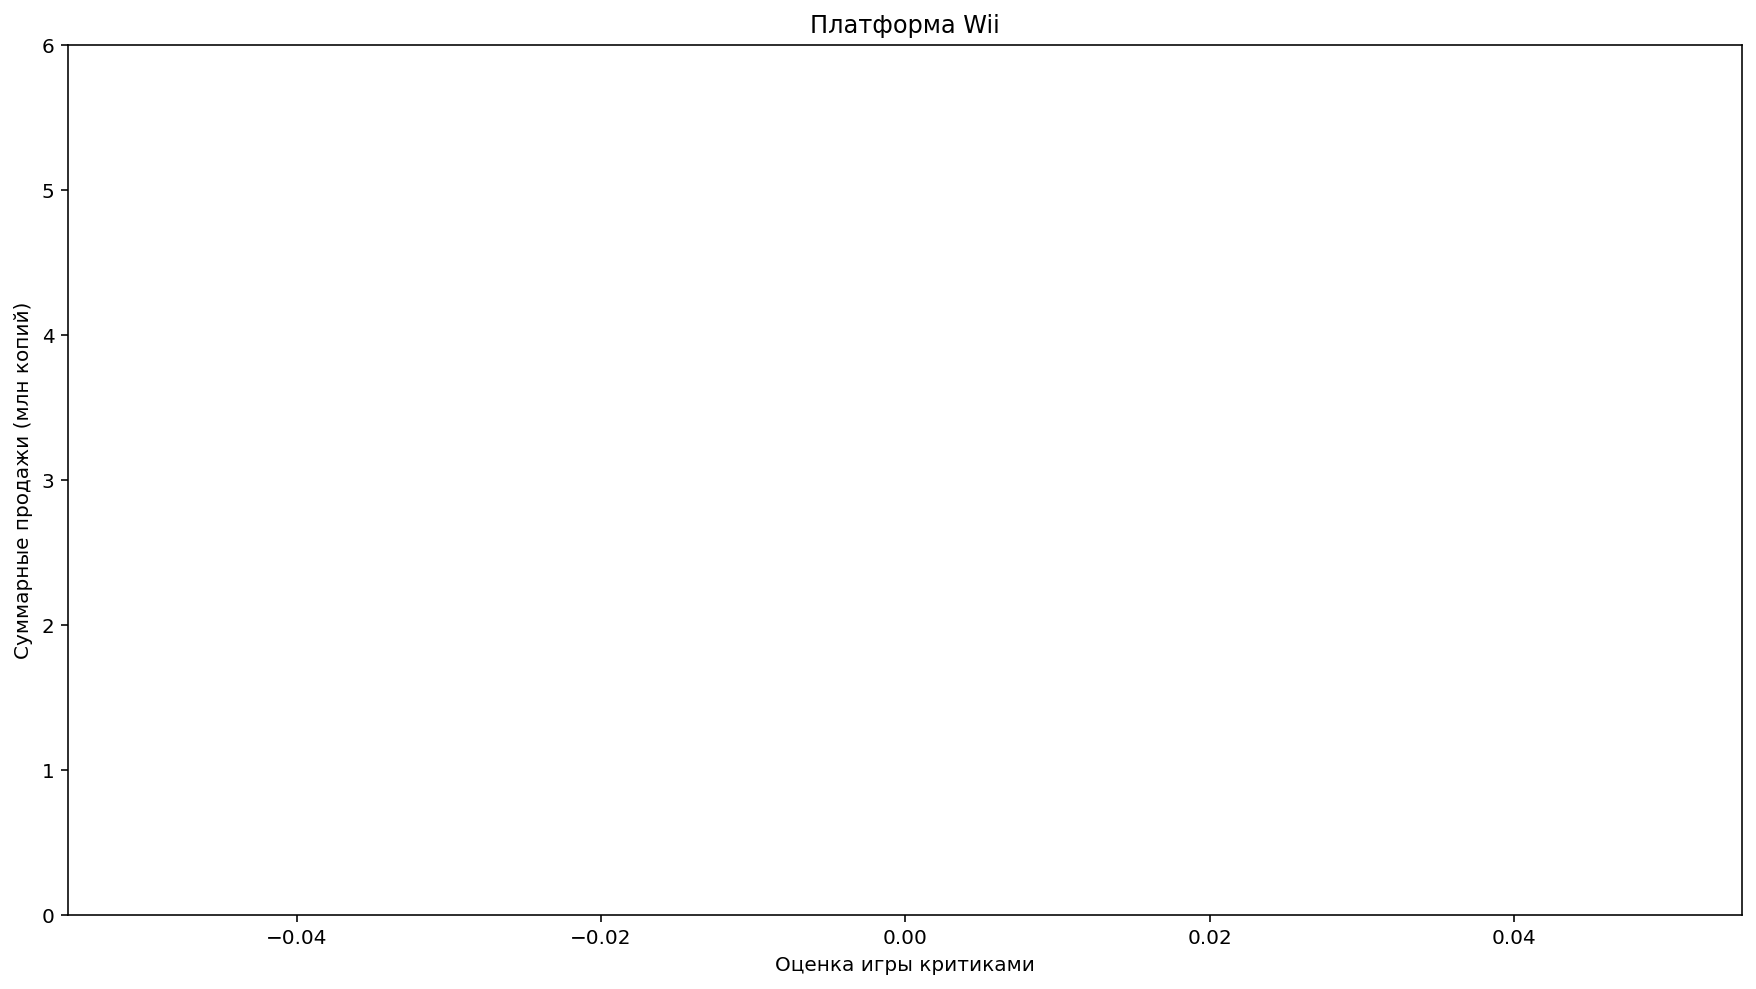

Коэффициент корреляции: nan


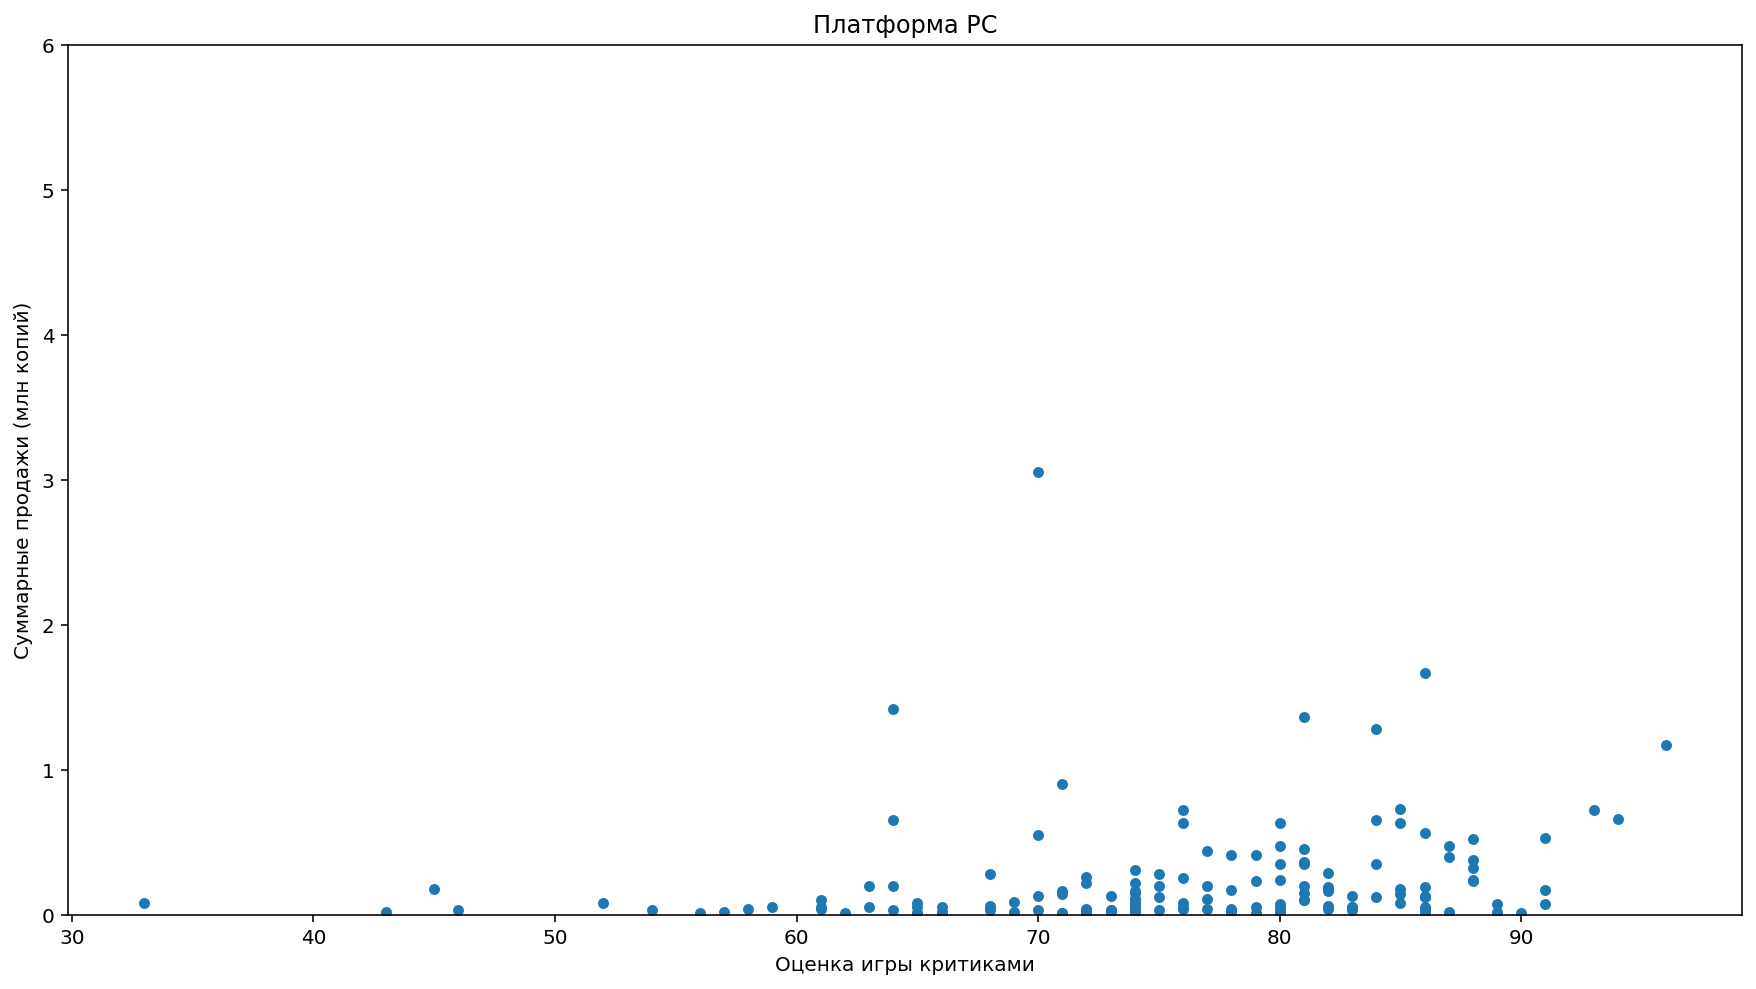

Коэффициент корреляции: 0.19603028294369382


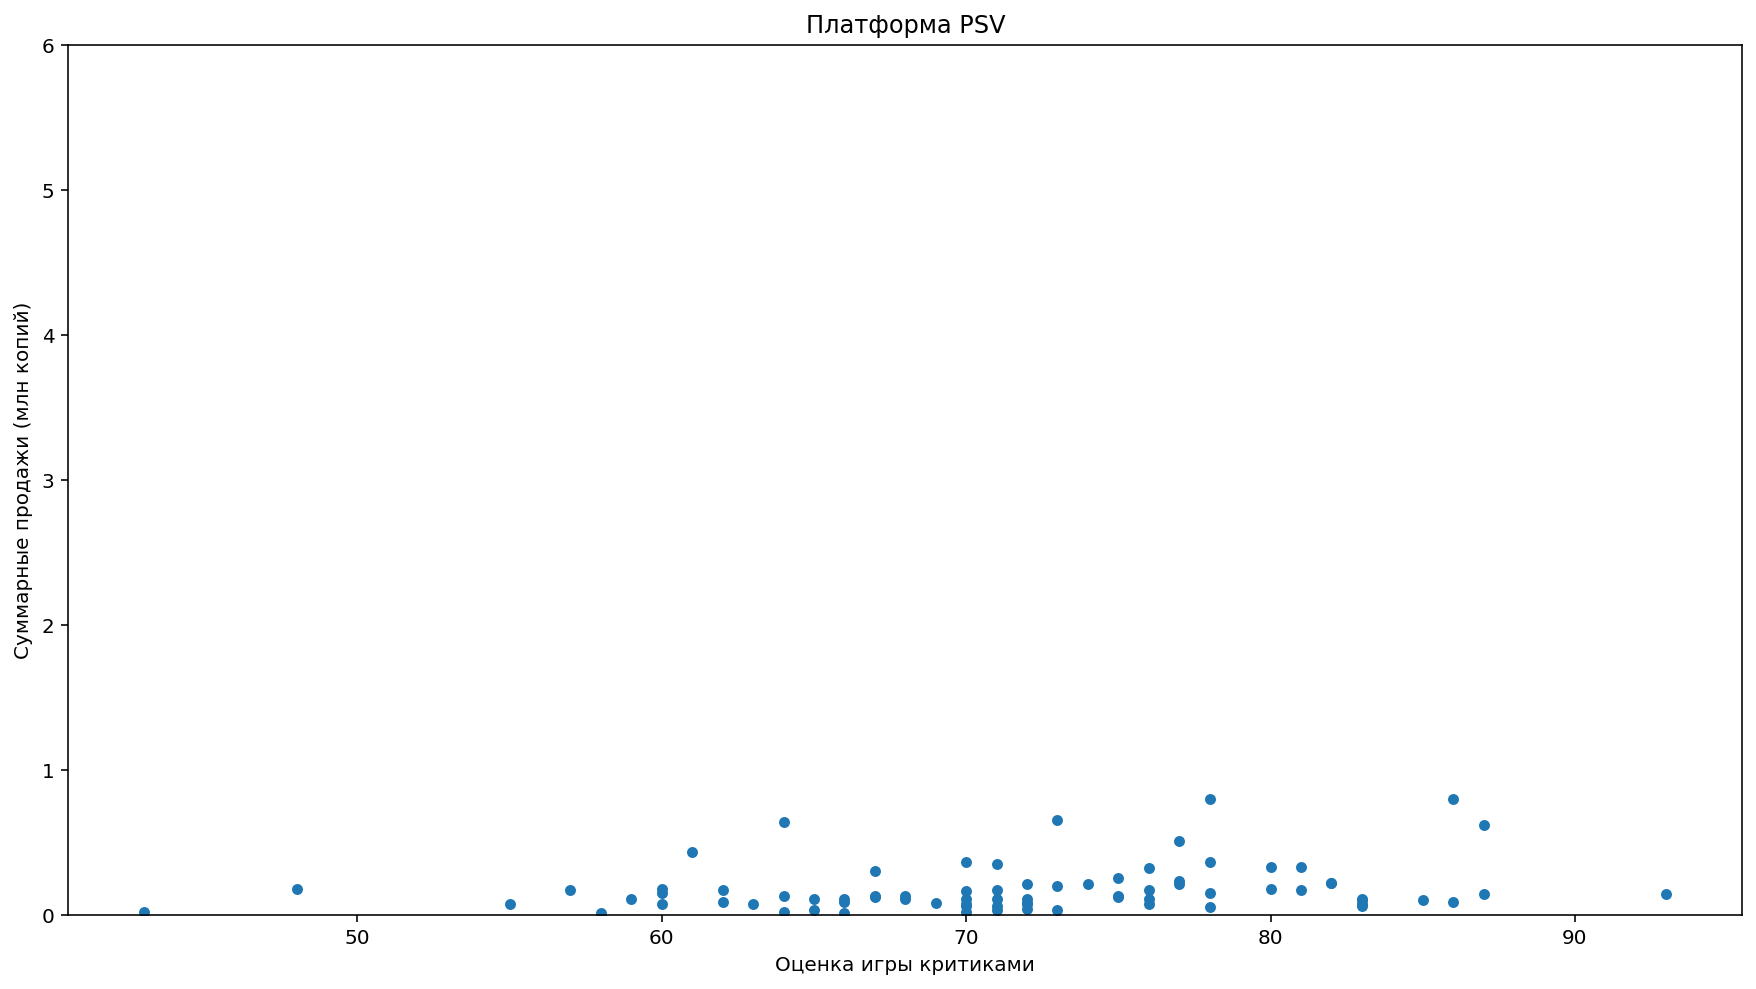

Коэффициент корреляции: 0.2547423503068656


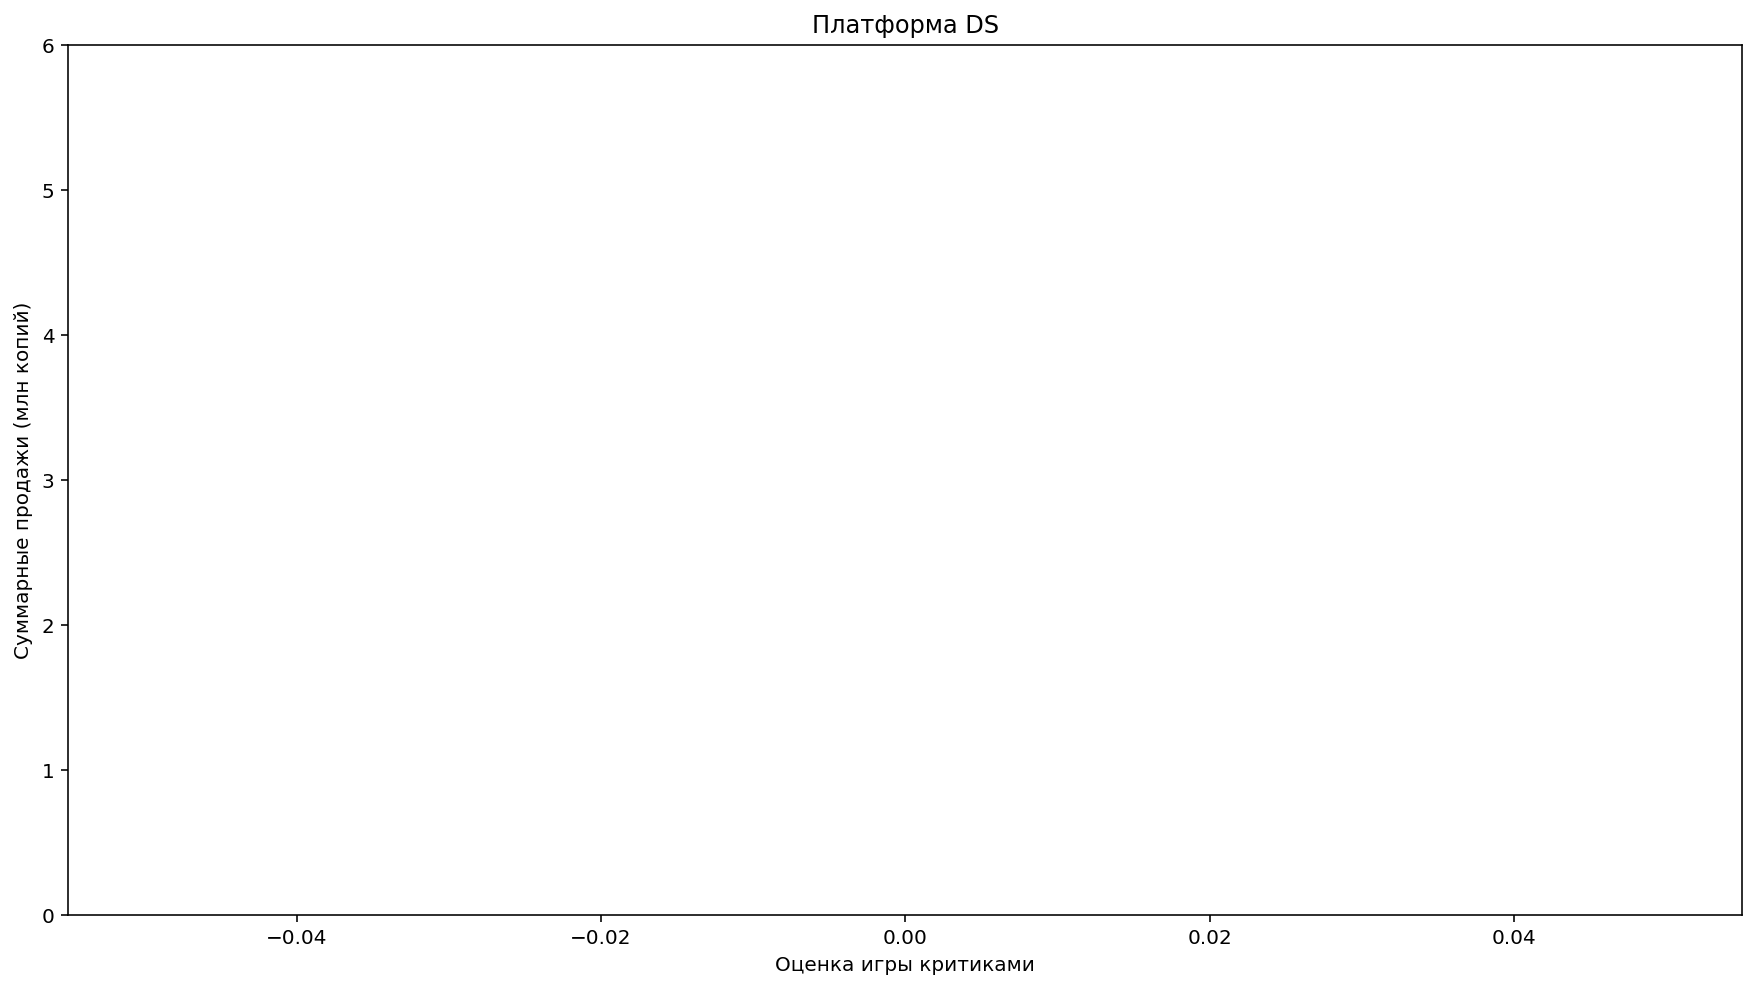

Коэффициент корреляции: nan


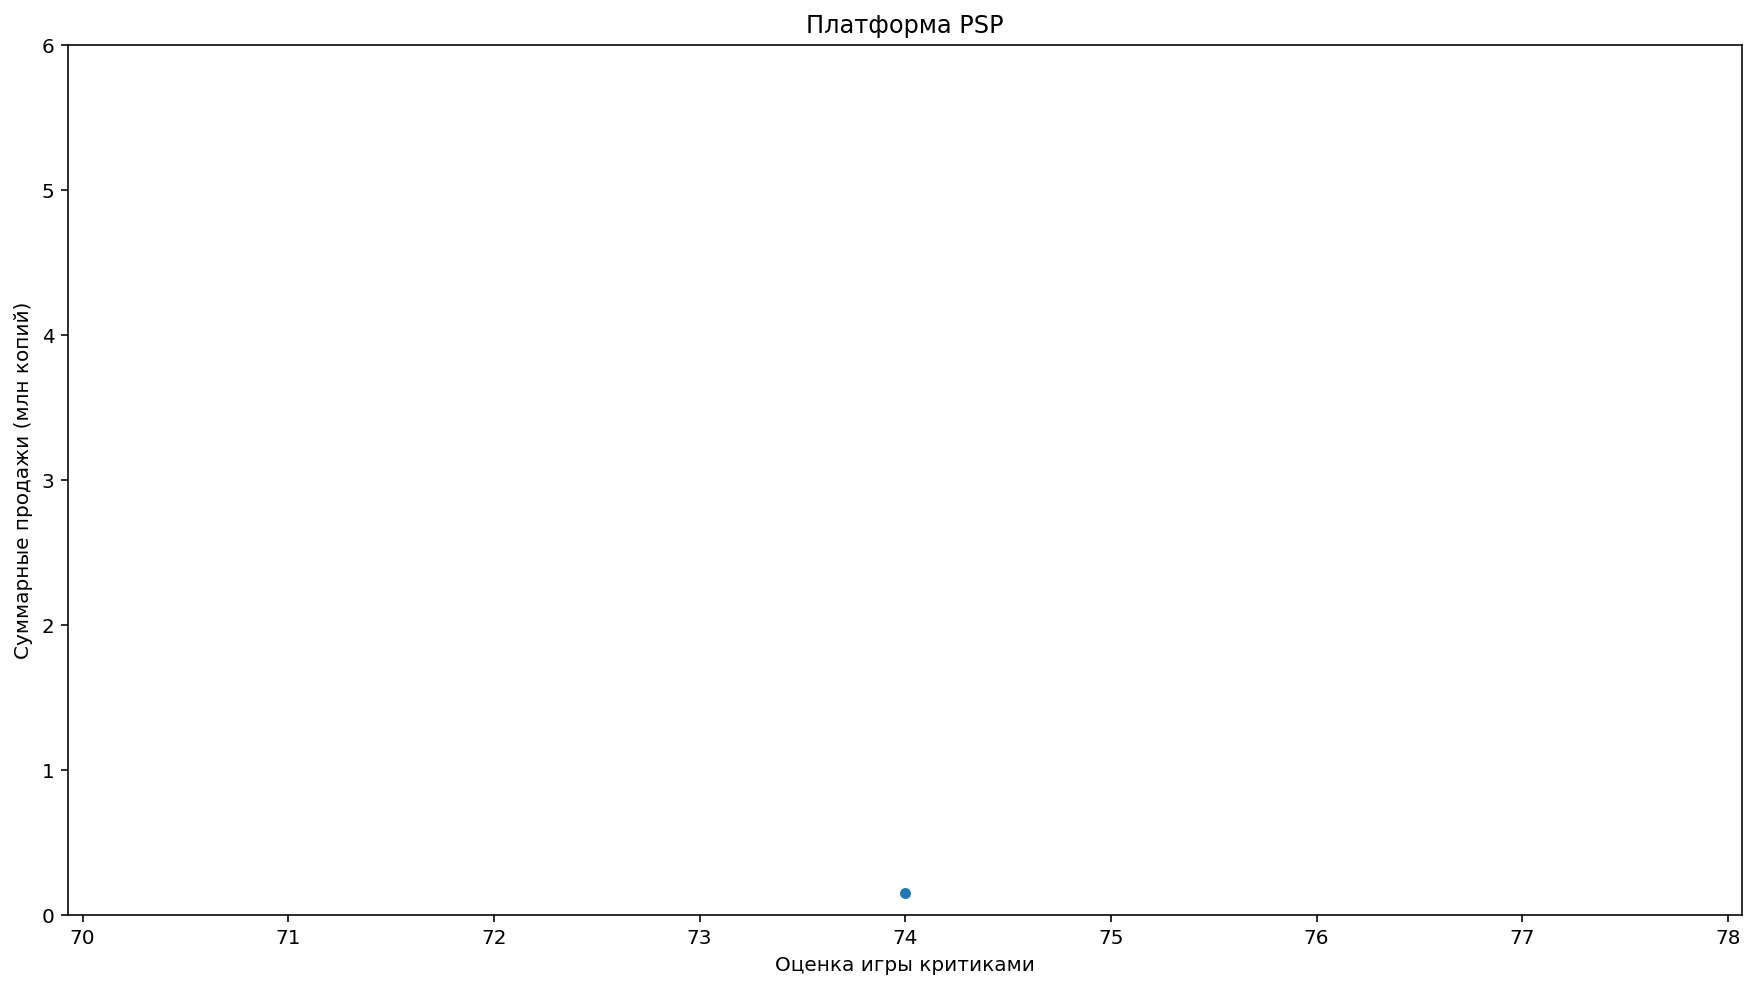

Коэффициент корреляции: nan


In [27]:
# Циклом for in перебираем каждое уникальное значение столбца с платформами методом unique() и делаем срез данных для каждой 
# платформы в датафрейме за актуальный период и для каждой платформы строим график разброса scatter методом plot для зависимости 
# суммарных продаж от оценки игры критиками:
for platform in  data_act['platform'].unique():
   
    data_act.query('platform == @platform').plot(kind='scatter',x='critic_score',y='gen_sales', title = f'Платформа {platform}', 
                                                 figsize=(15,8), xlabel='Оценка игры критиками', ylabel='Суммарные продажи (млн копий)', 
                                                 ylim=(0, 6))
    plt.show()
    # Рассчитываем коэффициент корреляции методом corr() для каждой зависимости и выводим его на экран:
    print('Коэффициент корреляции:', data_act.query('platform == @platform')['critic_score'].corr(data_act.query
                                                                                            ('platform == @platform')
                                                                                            ['gen_sales']))


Хотя на большинстве графиков, особенно это видно на графиках таких популярных платформ, как PS4, PS3, X360 и XOne, наблюдается рост продаж игр с высокими оценками критиков (более 70 баллов), разброс точек достаточно большой, а полученные коэффициенты корреляции в диапазоне 0,2-0,42 говорят нам о слабой зависимости между отзывами пользователей и продажами игр.

Для игр выпущенных на платформах Wii, DS и PSP данных для построения этих зависимостей и расчета коэффициентов корреляции оказалось недостаточно, по всей вероятности, из-за отсутствия иформации о том, какую оценку игре поставили критики.

### Посмотрим на общее распределение игр по жанрам. 

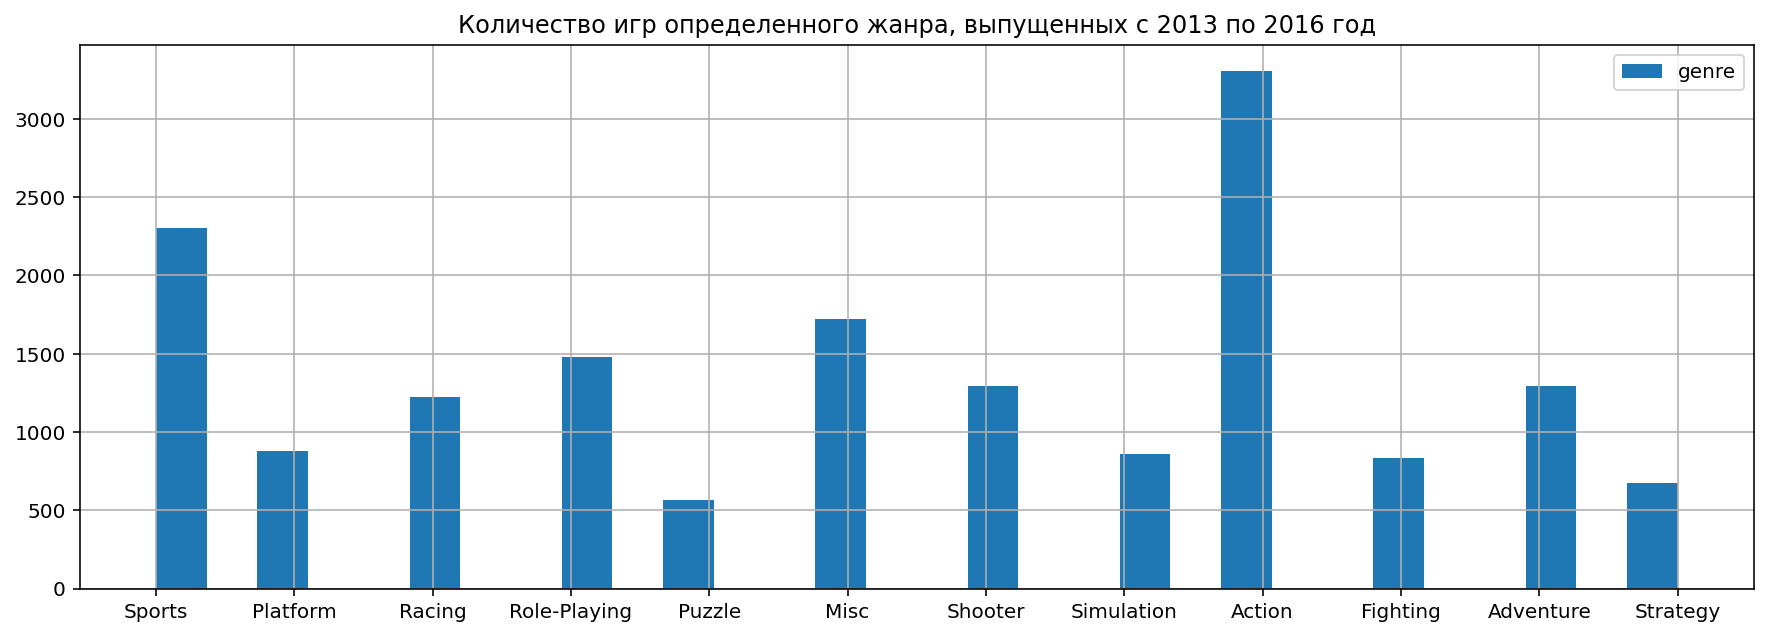

In [28]:
# Строим гистограмму для столбца с жанром:
ax = data['genre'].hist(bins=30, figsize = (15,5), legend=True);

# Методом set_title() добавляем заголовок:
ax.set_title('Количество игр определенного жанра, выпущенных с 2013 по 2016 год');

Больше всего с 2013 по 2016 выпустили игр в жанре Action (около 3300 игр), примерно на 1000 меньше игр выпустили в жанре Sports. На третьем месте игры в жанре Misc - 1700 штук. Игры в жанрах Racing, Role_Playing, Shooter и Adventure за это время выпустили не более чем 1000-1500 штуки в каждом из жанров. Игры всех остальных жанров не превысили в 1000 игр в каждом из них.

Для определения наиболее прибыльных жанров, где большинство игр стабильно приносят высокий доход, будем рассматривать медианные  продажы.

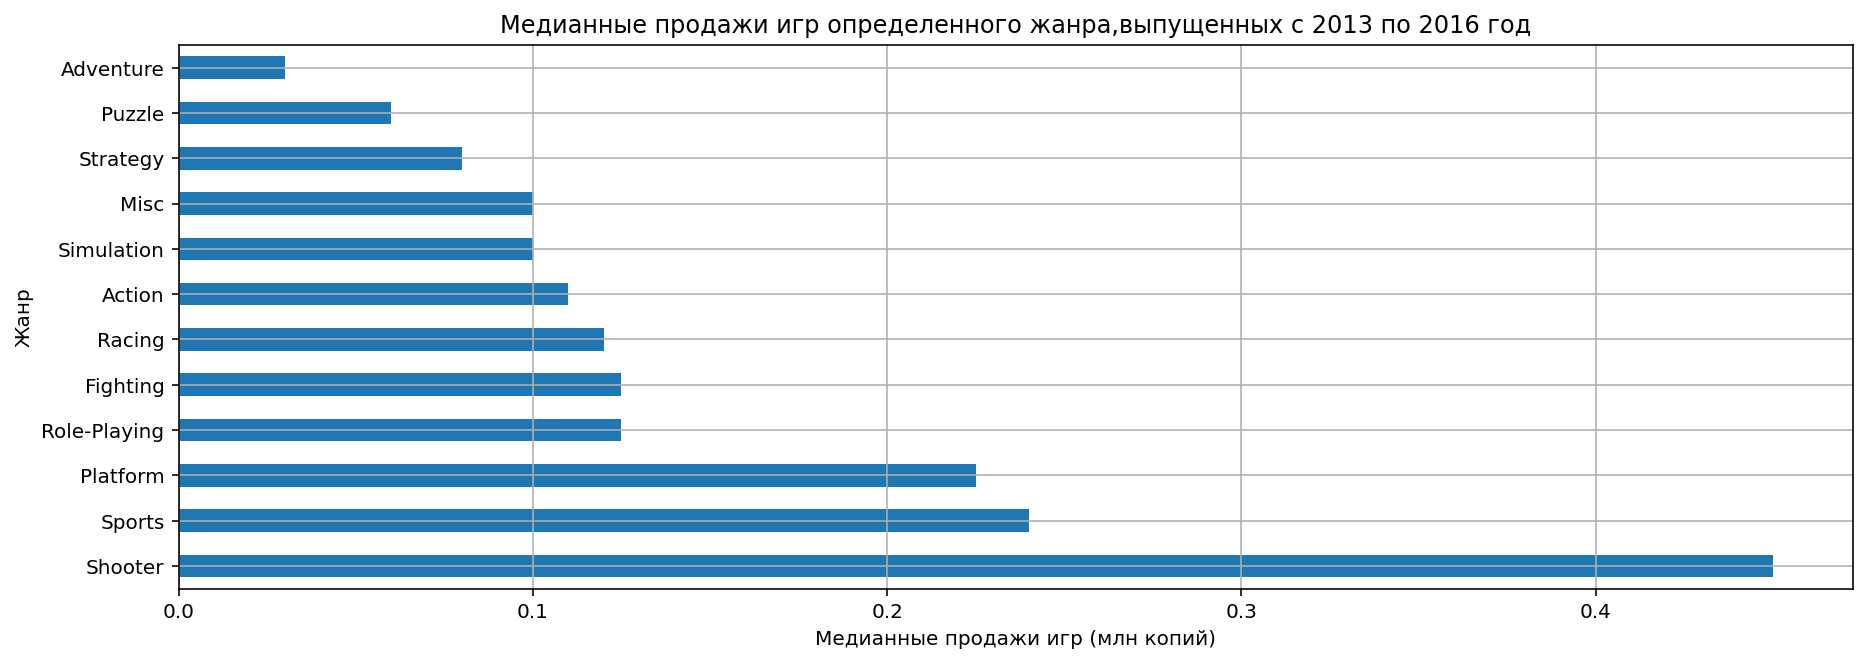

In [29]:
# Применяем методы pivot_table() и plot() к датафрейму с данными по актуальному периоду с 2013 по 2016 год, строим график 
# зависимости медианных продаж игр от их жанра: 
ax = data_act.pivot_table(index=['genre'], values='gen_sales', aggfunc='median').sort_values(by='gen_sales', 
                                        ascending=False).plot(kind='barh', grid=True, legend=False,figsize=(15, 5));
# Методом set_title() добавляем заголовок:
ax.set_title('Медианные продажи игр определенного жанра,выпущенных с 2013 по 2016 год');
ax.set_xlabel('Медианные продажи игр (млн копий)');
ax.set_ylabel('Жанр');

Наиболее прибыльным жанром игр с 2013 по 2016 год является жанр Shooter, на втором месте по продажам - жанр Sports, на третьем месте жанр - Platform, продажи которого чуть меньше чем у жанра Sports. 
Самые низкие продажи у игр жанра Adventure.

## Составим портрет пользователя каждого региона

### Опеределим самые популярные платформы (топ-5) в регионах NA, EU и JP

In [30]:
# Делаем по датафрейму data_act сводную таблицу data_top методом pivot_table(), группируем данные по столбцу 'platform', 
# по значениям из столбца 'na_sales' находим суммарные продажи игр на платформах функцией sum():
data_top = data_act.pivot_table(index=['platform'], values='na_sales', aggfunc=['sum'])

# Переименовываем столбец:

data_top.columns = ['Суммарные продажи в NA (млн копий)']


# Сортируем датафрейм по уменьшению суммарных продаж игр и выводим его первые 5 строк методом head(): 
data_top.sort_values('Суммарные продажи в NA (млн копий)', ascending=False).head()


,Суммарные продажи в NA (млн копий)
platform,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
3DS,38.20


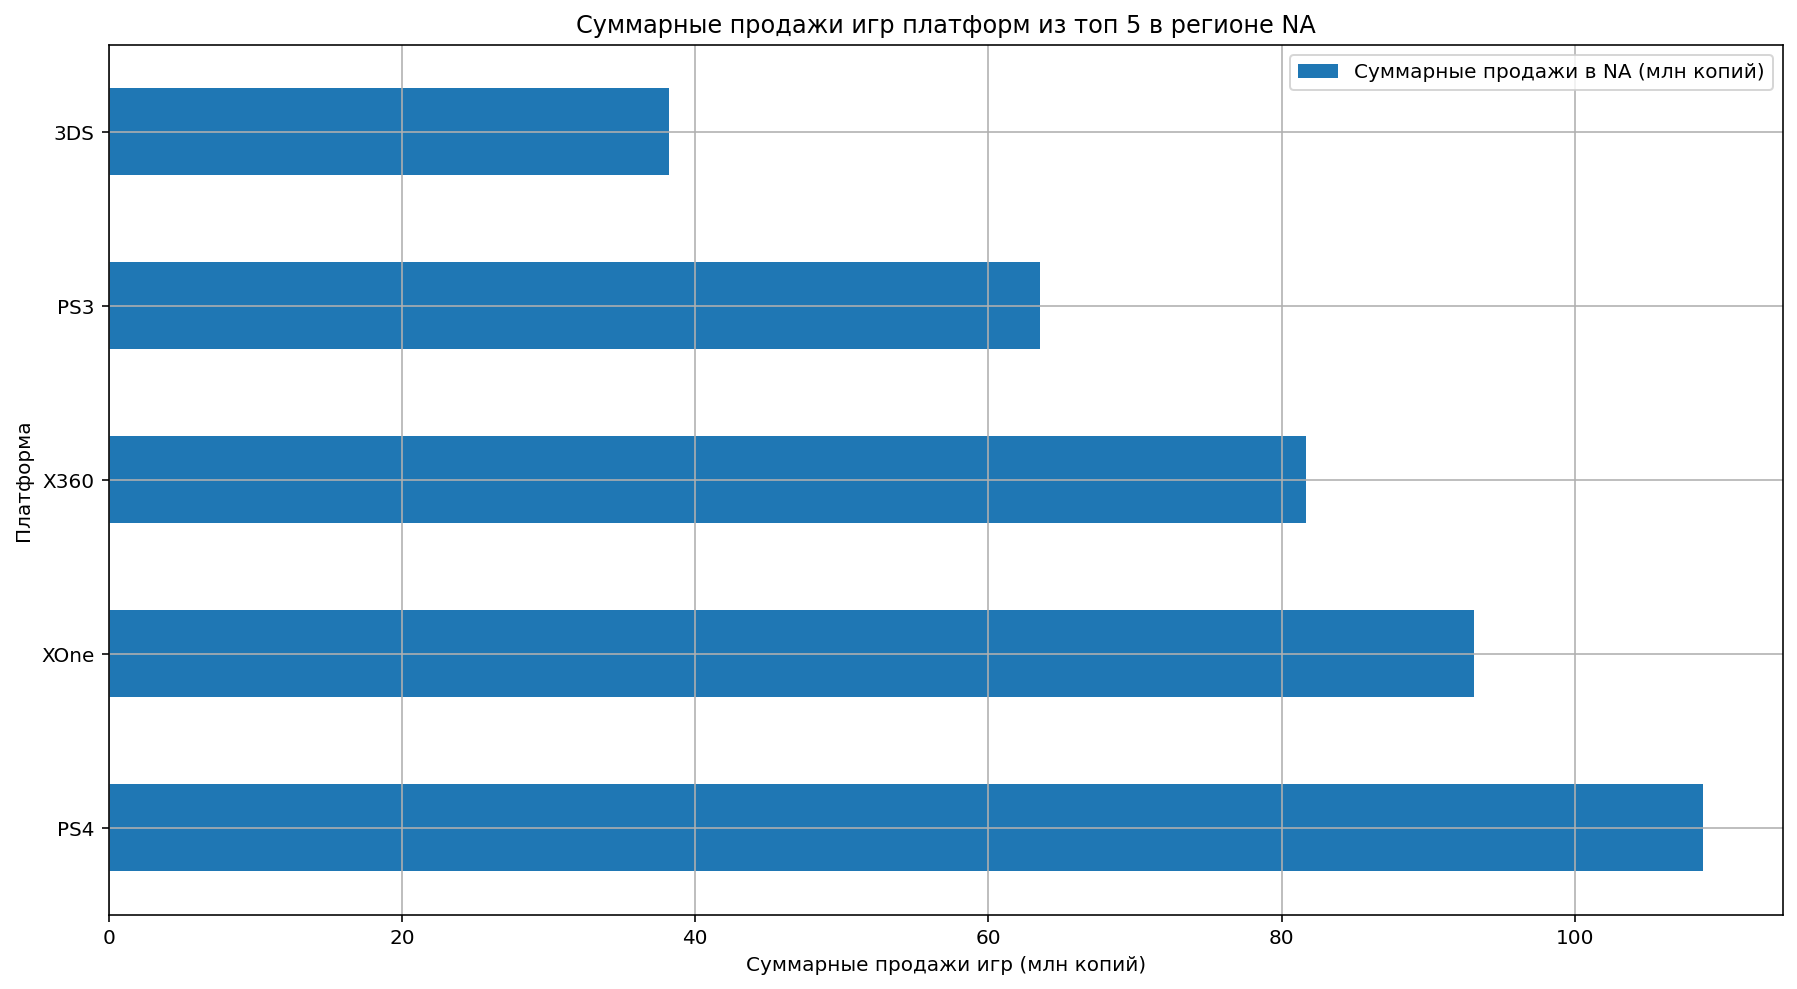

In [31]:
ax = data_top.sort_values('Суммарные продажи в NA (млн копий)', ascending=False).head().plot(kind='barh', grid=True, figsize=(15, 8));

# Методом set_xlabel() и set_ylabel() меняем названия осей, методом set_title добавляем заголовок:
ax.set_xlabel('Суммарные продажи игр (млн копий)');
ax.set_ylabel('Платформа');
ax.set_title('Суммарные продажи игр платформ из топ 5 в регионе NA');


Топ-5 наиболее популярных платформ в Северной Америке:

    1. PS4
    2. XOne
    3. X360
    4. PS3
    5. 3DS

Посчитаем долю продаж игр на самых популярных платформах (топ 5) в регионе NA от общих продаж во всех регионах.

In [32]:
# Добавляем в датафрейм data_top новые столбцы с общей суммой продаж на всех платформах и долей продаж игр на платформе:
data_top['Суммарные продажи (млн копий)'] = data_act['na_sales'].sum()

data_top['Доля продаж в NA'] = data_top['Суммарные продажи в NA (млн копий)'] / data_top['Суммарные продажи (млн копий)']

# Округляем полученные значения методом round():
data_top['Доля продаж в NA'] = data_top['Доля продаж в NA'].round(2)

# Сортируем датафрейм data_top по уменьшению суммарных продаж игр в регионе NA и выводим его первые 5 строк методом head(): 
data_top.sort_values('Суммарные продажи в NA (млн копий)', ascending=False).head()


,Суммарные продажи в NA (млн копий),Суммарные продажи (млн копий),Доля продаж в NA
platform,,,
PS4,108.74,437.71,0.25
XOne,93.12,437.71,0.21
X360,81.66,437.71,0.19
PS3,63.50,437.71,0.15
3DS,38.20,437.71,0.09


Как видно из таблицы, в Северной Америке большую долю продаж занимают игры на платформах PS4 и XOne: 25 и 21 % соответственно. Чуть меньшую долю занимает платформа X360 - 19 %. Доли продаж на PS3 и 3DS равны 15 и 9 % соотвественно. 

Самая большая доля продаж в Северной Америке приходится на платформы в топе 5, появившиеся на рынке позже других, - PS4 и XOne,а 80 % рынка поровну делят игоровые платформы компаний Playstation (PS4 и PS3) и Microsoft (XOne и X360).

In [33]:
# Делаем по датафрейму data_act сводную таблицу data_top методом pivot_table(), группируем данные по столбцу 'platform', 
# по значениям из столбца 'eu_sales' находим суммарные продажи игр на платформах функцией sum():
data_top = data_act.pivot_table(index=['platform'], values='eu_sales', aggfunc=['sum'])

# Переименовываем столбец:
data_top.columns = ['Суммарные продажи в EU (млн копий)']

# Сортируем датафрейм по уменьшению суммарных продаж игр и выводим его первые 5 строк методом head(): 
data_top.sort_values('Суммарные продажи в EU (млн копий)', ascending=False).head()

,Суммарные продажи в EU (млн копий)
platform,
PS4,141.09
PS3,67.81
XOne,51.59
X360,42.52
3DS,30.96


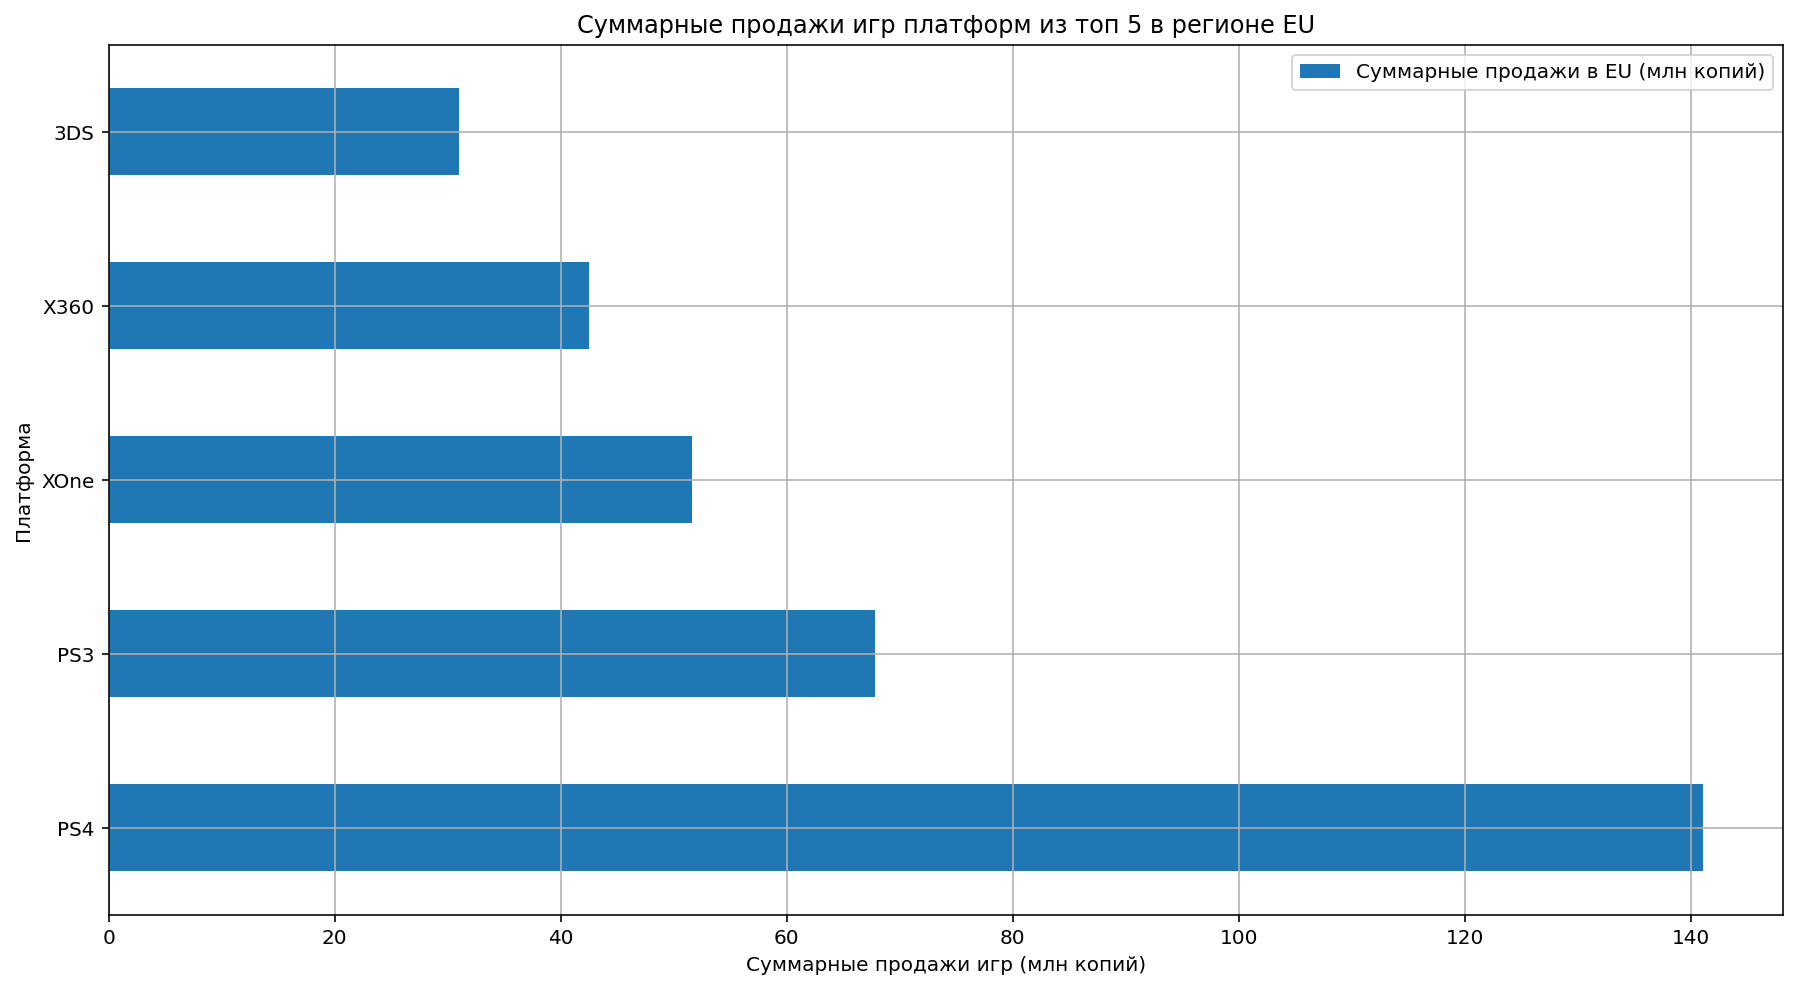

In [34]:
# Для наглядности строим график вида barh методом plot():
ax = data_top.sort_values('Суммарные продажи в EU (млн копий)', ascending=False).head().plot(kind='barh', grid=True, figsize=(15, 8));

# Методом set_xlabel() и set_ylabel() меняем названия осей, методом set_title добавляем заголовок:
ax.set_xlabel('Суммарные продажи игр (млн копий)');
ax.set_ylabel('Платформа');
ax.set_title('Суммарные продажи игр платформ из топ 5 в регионе EU');


Топ-5 наиболее популярных платформ в Европе:

    1. PS4
    2. PS3
    3. XOne
    4. X360
    5. 3DS

Посчитаем долю продаж игр на самых популярных платформах (топ 5) в регионе EU от общих продаж во всех регионах.

In [35]:
# Добавляем в датафрейм data_top новые столбцы с общей суммой продаж на всех платформах и долей продаж игр на платформе:
data_top['Суммарные продажи (млн копий)'] = data_act['eu_sales'].sum()
data_top['Доля продаж в EU'] = data_top['Суммарные продажи в EU (млн копий)'] / data_top['Суммарные продажи (млн копий)']

# Округляем полученные значения методом round():
data_top['Доля продаж в EU'] = data_top['Доля продаж в EU'].round(2)

# Сортируем датафрейм data_top по уменьшению суммарных продаж игр в регионе NA и выводим его первые 5 строк методом head(): 
data_top.sort_values('Суммарные продажи в EU (млн копий)', ascending=False).head()


,Суммарные продажи в EU (млн копий),Суммарные продажи (млн копий),Доля продаж в EU
platform,,,
PS4,141.09,392.23,0.36
PS3,67.81,392.23,0.17
XOne,51.59,392.23,0.13
X360,42.52,392.23,0.11
3DS,30.96,392.23,0.08


В Европе наибольшая доля продаж приходится на платформу PS4 - 36 %. НА плафторму PS3 приходится до 17 % продаж. Доля продаж игр на платформах XOne и X360, 13 и 11 %, 3DS - 8 %.

Больше всего продаж приходится на игровые платформы компании Playstation (PS4 и PS3), занимающей до 53 % рынка. Компания Microsoft (XOne и X360) занимает не более 24 % рынка.   
	

In [36]:
# Делаем по датафрейму data_act сводную таблицу data_top методом pivot_table(), группируем данные по столбцу 'platform', 
# по значениям из столбца 'na_sales' находим суммарные продажи игр на платформах функцией sum():
data_top = data_act.pivot_table(index=['platform'], values='jp_sales', aggfunc=['sum'])

# Переименовываем столбец:
data_top.columns = ['Суммарные продажи в JP (млн копий)']

# Сортируем датафрейм по уменьшению суммарных продаж игр и выводим его первые 5 строк методом head(): 
data_top.sort_values('Суммарные продажи в JP (млн копий)', ascending=False).head()

,Суммарные продажи в JP (млн копий)
platform,
3DS,67.81
PS3,23.35
PSV,18.59
PS4,15.96
WiiU,10.88


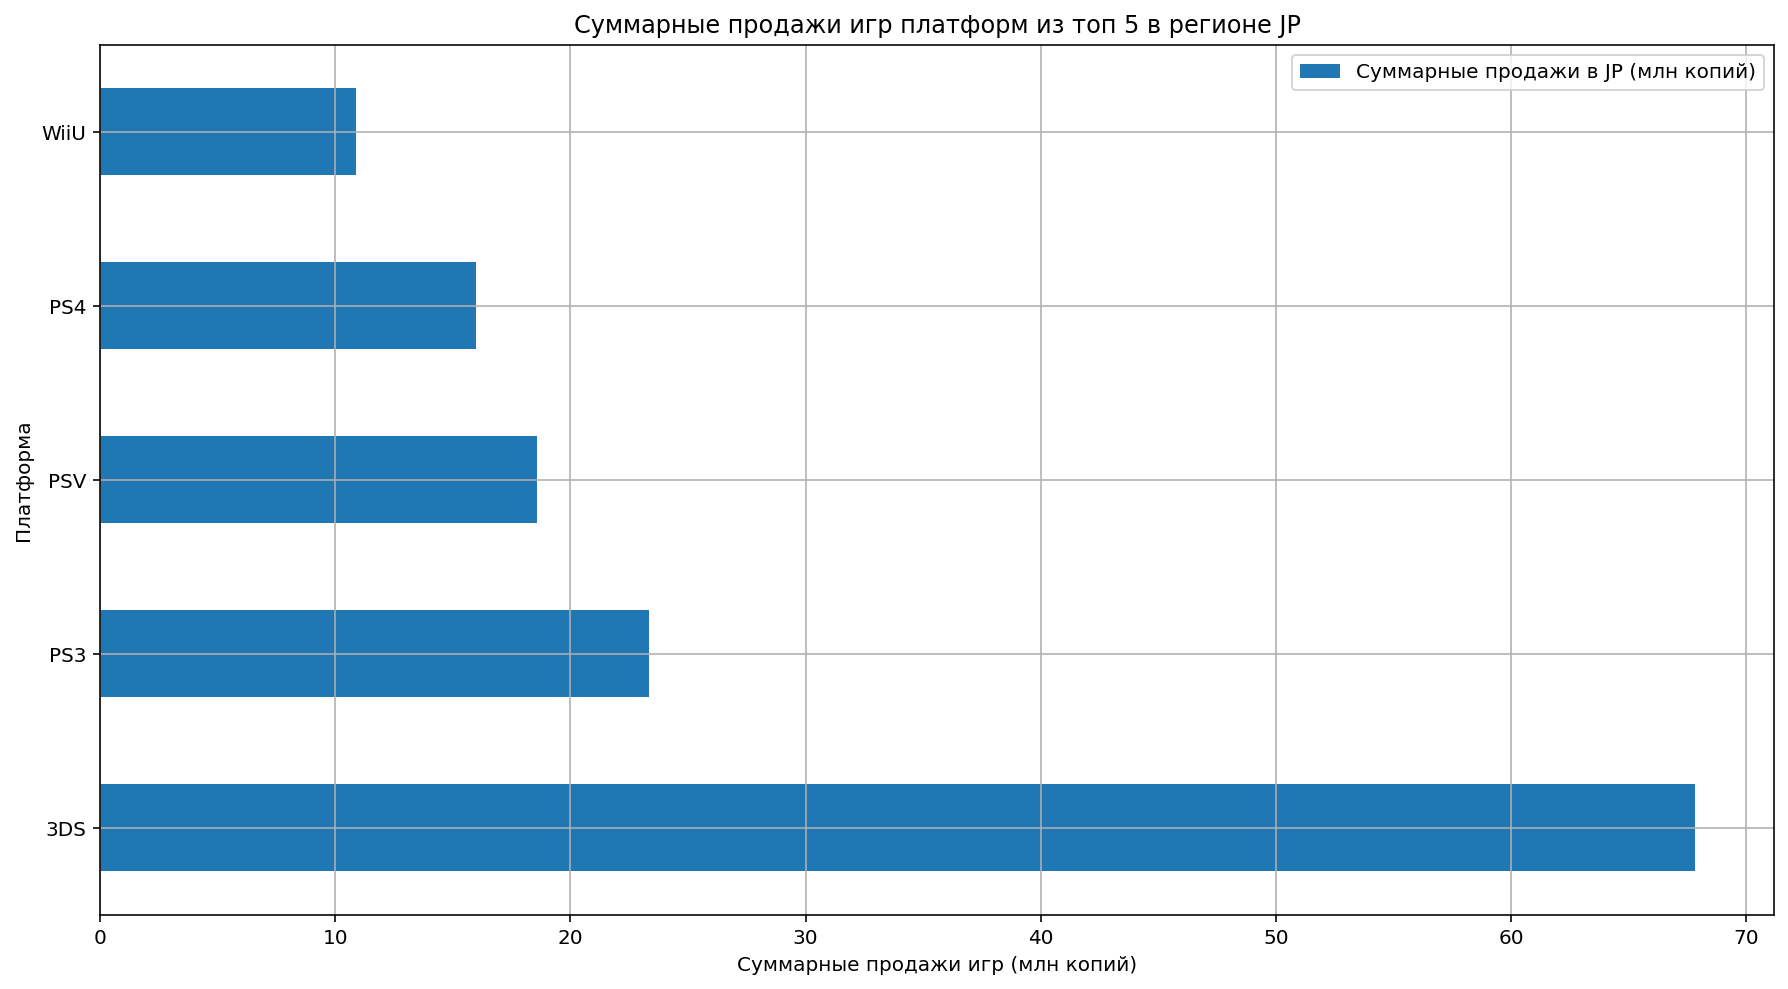

In [37]:
ax = data_top.sort_values('Суммарные продажи в JP (млн копий)', ascending=False).head().plot(kind='barh', grid=True, figsize=(15, 8));

# Методом set_xlabel() и set_ylabel() меняем названия осей, методом set_title добавляем заголовок:
ax.set_xlabel('Суммарные продажи игр (млн копий)');
ax.set_ylabel('Платформа');
ax.set_title('Суммарные продажи игр платформ из топ 5 в регионе JP');


Топ-5 наиболее популярных платформ в Японии:

    1. 3DS
    2. PS3
    3. PSV
    4. PS4
    5. WiiU

Доля продаж игр на самых популярных платформах (топ 5) в регионе JP от общих продаж во всех регионах.

In [38]:
# Добавляем в датафрейм data_top новые столбцы с общей суммой продаж на всех платформах и долей продаж игр на платформе:
data_top['Суммарные продажи (млн копий)'] = data_act['jp_sales'].sum()
data_top['Доля продаж в JP'] = data_top['Суммарные продажи в JP (млн копий)'] / data_top['Суммарные продажи (млн копий)']

# Округляем полученные значения методом round():
data_top['Доля продаж в JP'] = data_top['Доля продаж в JP'].round(2)

# Сортируем датафрейм data_top по уменьшению суммарных продаж игр в регионе NA и выводим его первые 5 строк методом head(): 
data_top.sort_values('Суммарные продажи в JP (млн копий)', ascending=False).head()


,Суммарные продажи в JP (млн копий),Суммарные продажи (млн копий),Доля продаж в JP
platform,,,
3DS,67.81,140.78,0.48
PS3,23.35,140.78,0.17
PSV,18.59,140.78,0.13
PS4,15.96,140.78,0.11
WiiU,10.88,140.78,0.08


В Японии практически половина всех продаж приходится на платформу 3DS (48 %). Платформы компании Playstation занимают 41 % рынка (PS3 - 17 %, PSV - 13 %, PS4-11 %). 8 % продаж приходится на платформу WiiU.

Как видно из полученных данных,97 % игрового рынка Японии принадлежит двум японским компаниям Nintendo (3DS, WiiU)- 56 % и Playstation (PS3, PSV, PS4)- 41 %.

Таким образом, можно сделать вывод, что пользователи из Северной Америки и Европы в большей степени предпочитают покупать игры на платформах PS4, PS3, XOne и X360, причем первое место по продажам занимает PS4. В то же время в Северной Америке доли продаж игр на платформах компании Playstation (PS4, PS3) и Xbox (XOne и X360) равны, а в Европе по этому показателю компания Playstation (PS4, PS3) превосходит компанию Xbox (XOne и X360) практически в два раза.
В Японии по сравнению с другими регионами пользователи в большей степени предпочитают платформы местных компаний - Nintendo и Playstation, платформы которых занимают почти весь игровой рынок. Самая популярная платформа в этом регионе - 3DS.

### Опеределим cамые популярные жанры (топ-5)

In [39]:
# Делаем по датафрейму data_act сводную таблицу data_top методом pivot_table(), группируем данные по столбцу 'genre', 
# по значениям из столбца 'na_sales' находим медианные продажи игр на платформах функцией sum():
data_top = data_act.pivot_table(index=['genre'], values='na_sales', aggfunc=['sum'])

# Переименовываем столбец:

data_top.columns = ['Суммарные продажи игр (млн копий) в NA']

# Сортируем датафрейм по уменьшению суммарных продаж игр и выводим его первые 5 строк методом head(): 
data_top.sort_values('Суммарные продажи игр (млн копий) в NA', ascending=False).head()


,Суммарные продажи игр (млн копий) в NA
genre,
Action,126.05
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Misc,27.49


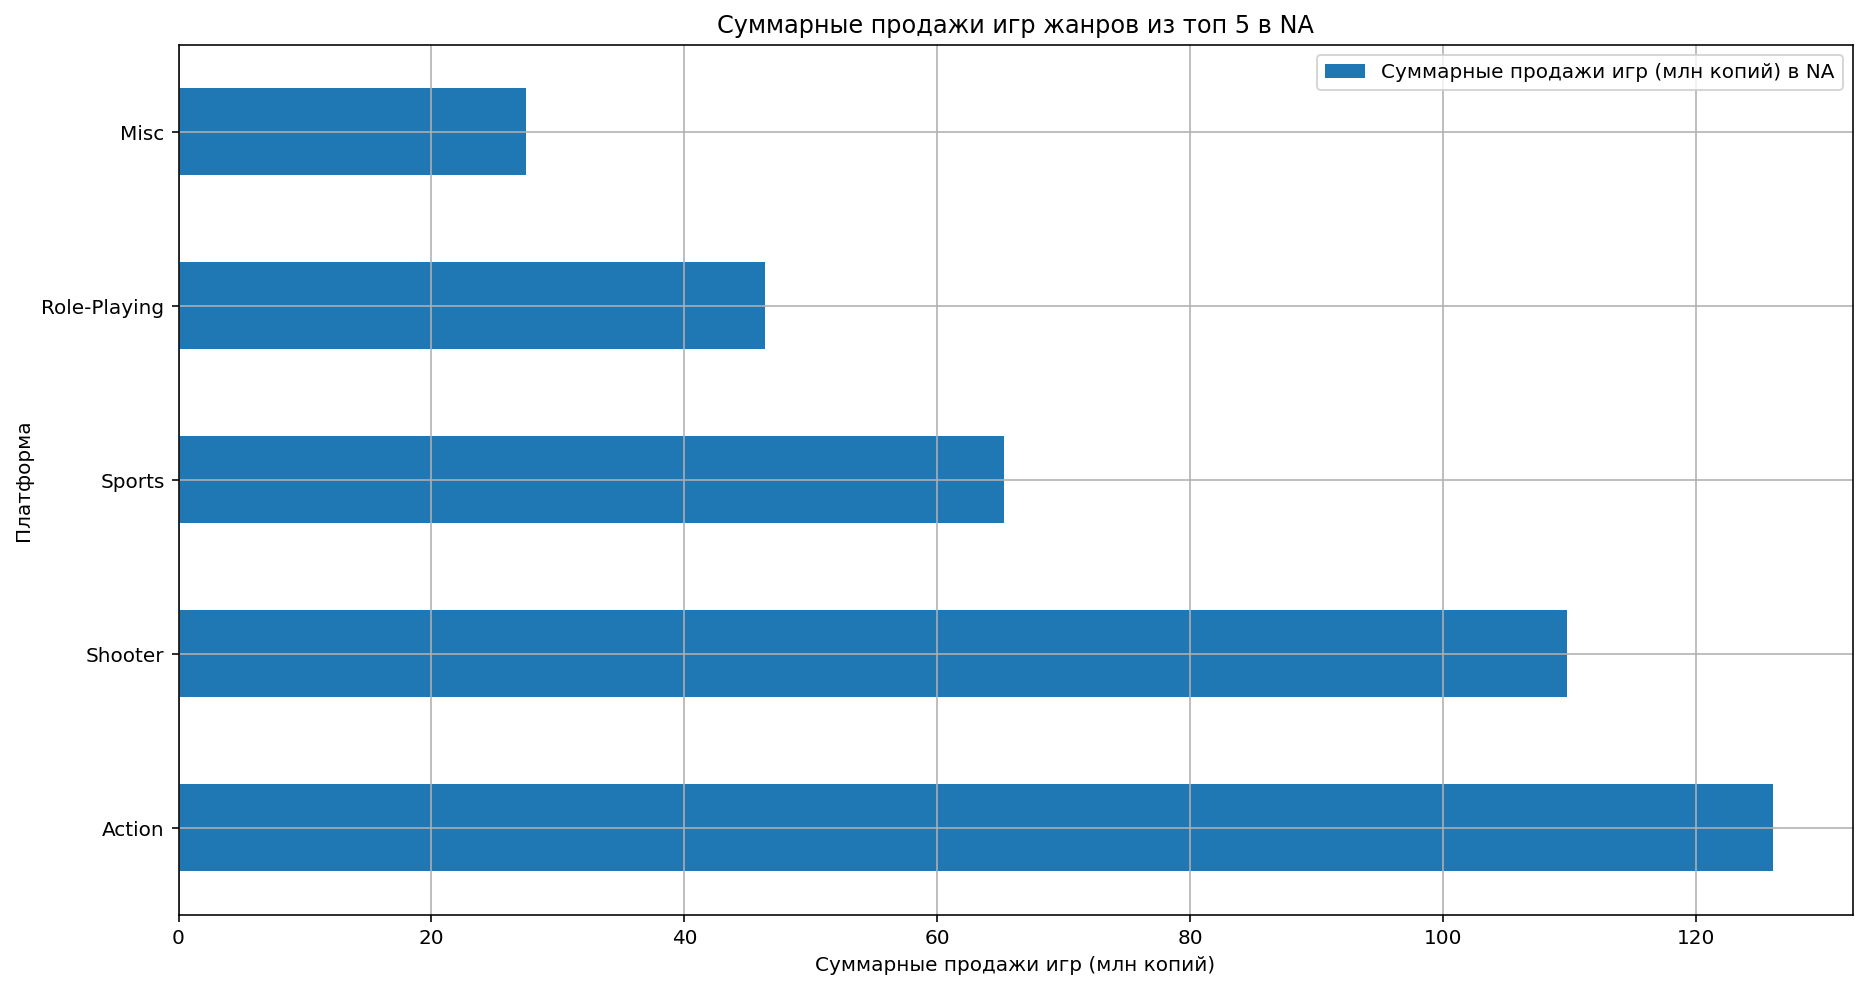

In [40]:
# Для наглядности строим график вида barh методом plot():
ax = data_top.sort_values('Суммарные продажи игр (млн копий) в NA', ascending=False).head().plot(kind='barh', grid=True, 
                                                                                             figsize=(15, 8));

# Методом set_xlabel() и set_ylabel() меняем названия осей, методом set_title добавляем заголовок:
ax.set_xlabel('Суммарные продажи игр (млн копий)');
ax.set_ylabel('Платформа');
ax.set_title('Суммарные продажи игр жанров из топ 5 в NA');

Топ-5 наиболее популярных жанров в Северной Америке:

    1. Action	
    2. Shooter	
    3. Sports
    4. Role-Playing		
    5. Misc		

Самые популярные жанры в Северной Америке - Action и Shooter.

In [41]:
# Делаем по датафрейму data_act сводную таблицу data_top методом pivot_table(), группируем данные по столбцу 'genre', 
# по значениям из столбца 'eu_sales' находим медианные продажи игр на платформах функцией sum():
data_top = data_act.pivot_table(index=['genre'], values='eu_sales', aggfunc=['sum'])

# Переименовываем столбец:
data_top.columns = ['Суммарные продажи игр (млн копий) в EU']

# Сортируем датафрейм по уменьшению суммарных продаж игр и выводим его первые 5 строк методом head(): 
data_top.sort_values('Суммарные продажи игр (млн копий) в EU', ascending=False).head()

,Суммарные продажи игр (млн копий) в EU
genre,
Action,118.13
Shooter,87.86
Sports,60.52
Role-Playing,36.97
Racing,20.19


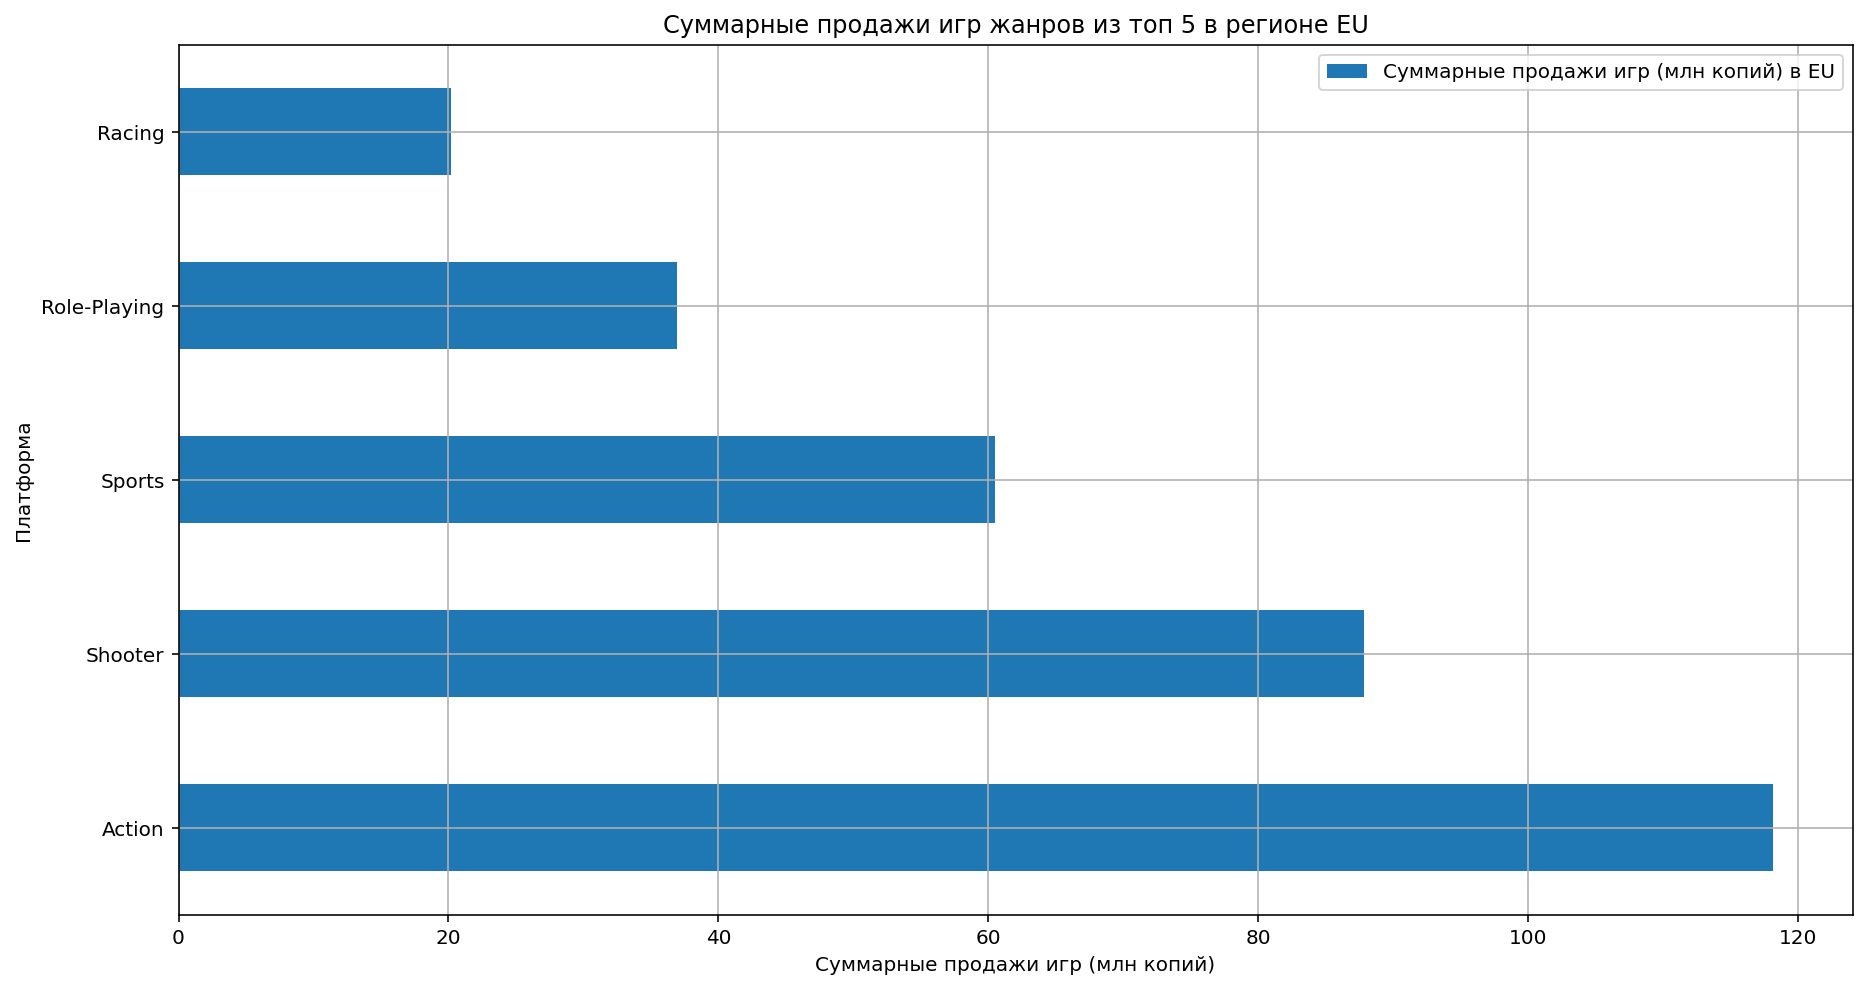

In [42]:
# Для наглядности строим график вида barh методом plot():
ax = data_top.sort_values('Суммарные продажи игр (млн копий) в EU', ascending=False).head().plot(kind='barh', grid=True, 
                                                                                             figsize=(15, 8));

# Методом set_xlabel() и set_ylabel() меняем названия осей, методом set_title добавляем заголовок:
ax.set_xlabel('Суммарные продажи игр (млн копий)');
ax.set_ylabel('Платформа');
ax.set_title('Суммарные продажи игр жанров из топ 5 в регионе EU');


Топ-5 наиболее популярных жанров в Европе:

    1. Action	
    2. Shooter		
    3. Sports		
    4. Role-Playing	
    5. Racing	

Самые популярные жанры в Европе - Action и Shooter.

In [43]:
# Делаем по датафрейму data_act сводную таблицу data_top методом pivot_table(), группируем данные по столбцу 'genre', 
# по значениям из столбца 'na_sales' находим медианные продажи игр на платформах функцией sum():
data_top = data_act.pivot_table(index=['genre'], values='jp_sales', aggfunc=['sum'])

# Переименовываем столбец:
data_top.columns = ['Суммарные продажи игр (млн копий) в JP']

# Сортируем датафрейм по уменьшению суммарных продаж игр и выводим его первые 5 строк методом head(): 
data_top.sort_values('Суммарные продажи игр (млн копий) в JP', ascending=False).head()

,Суммарные продажи игр (млн копий) в JP
genre,
Role-Playing,51.04
Action,40.49
Misc,9.20
Fighting,7.65
Shooter,6.61


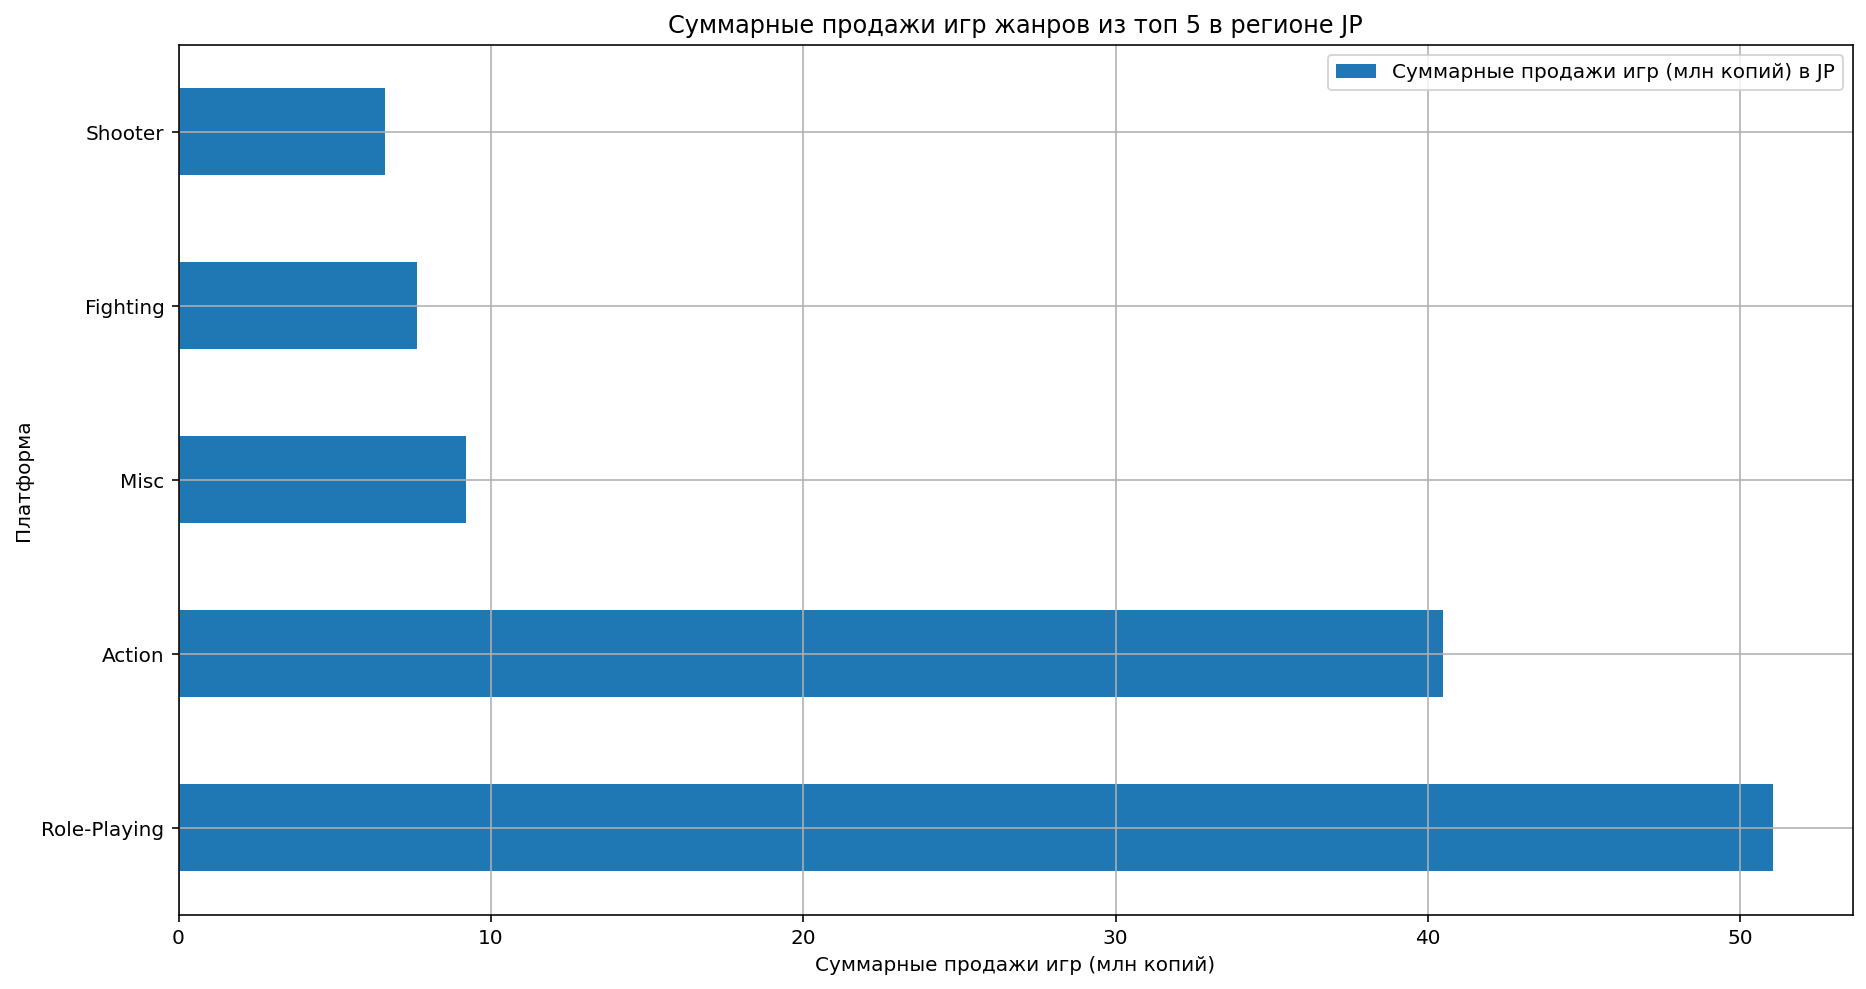

In [44]:
# Для наглядности строим график вида barh методом plot():
ax = data_top.sort_values('Суммарные продажи игр (млн копий) в JP', ascending=False).head().plot(kind='barh', grid=True, 
                                                                                             figsize=(15, 8));

# Методом set_xlabel() и set_ylabel() меняем названия осей, методом set_title добавляем заголовок:
ax.set_xlabel('Суммарные продажи игр (млн копий)');
ax.set_ylabel('Платформа');
ax.set_title('Суммарные продажи игр жанров из топ 5 в регионе JP');


Топ-5 наиболее популярных жанров в Японии:

    1. Role-Playing
    2. Action		
    3. Misc
    4. Fighting		
    5. Shooter		

Самые популярные жанры в Японии - Role-Playing и Action.

Можно сделать вывод, что среди пользователей в Северной Америке и Европе популярны практически одни и те же жанры, первое и второе место среди которых занимают Action и Shooter соответственно. В то время как в Японии, с первого места самого популярного жанра Action смещает жанр Role-Playing.

### Влияние рейтинга ESRB на продажи в регионах

Рейтинг компьютерных игр в соответствии с ESRB:

- **M** - «Для взрослых»: материалы игры не подходят для лиц младше 17 лет;
- **E** - «Для всех»: содержание вполне подходит для всех возрастов;
- **E10+** - «Для всех от 10 лет и старше»;
- **T** - «Подросткам»: игра подходит для лиц от 13 лет.

In [45]:
# Делаем по датафрейму data_act сводную таблицу data_top методом pivot_table(), группируем данные по столбцу 'genre', 
# по значениям из столбца 'na_sales' находим суммарные продажи игр на платформах функцией sum():
data_top = data_act.pivot_table(index=['rating'], values='na_sales', aggfunc=['sum'])

# Переименовываем столбец:
data_top.columns = ['Суммарные продажи (млн копий) в NA']

# Сортируем датафрейм по уменьшению суммарных продаж игр и выводим его первые 5 строк методом head(): 
data_top.sort_values('Суммарные продажи (млн копий) в NA', ascending=False)


,Суммарные продажи (млн копий) в NA
rating,
M,165.21
Unknown,89.42
E,79.05
E10+,54.24
T,49.79


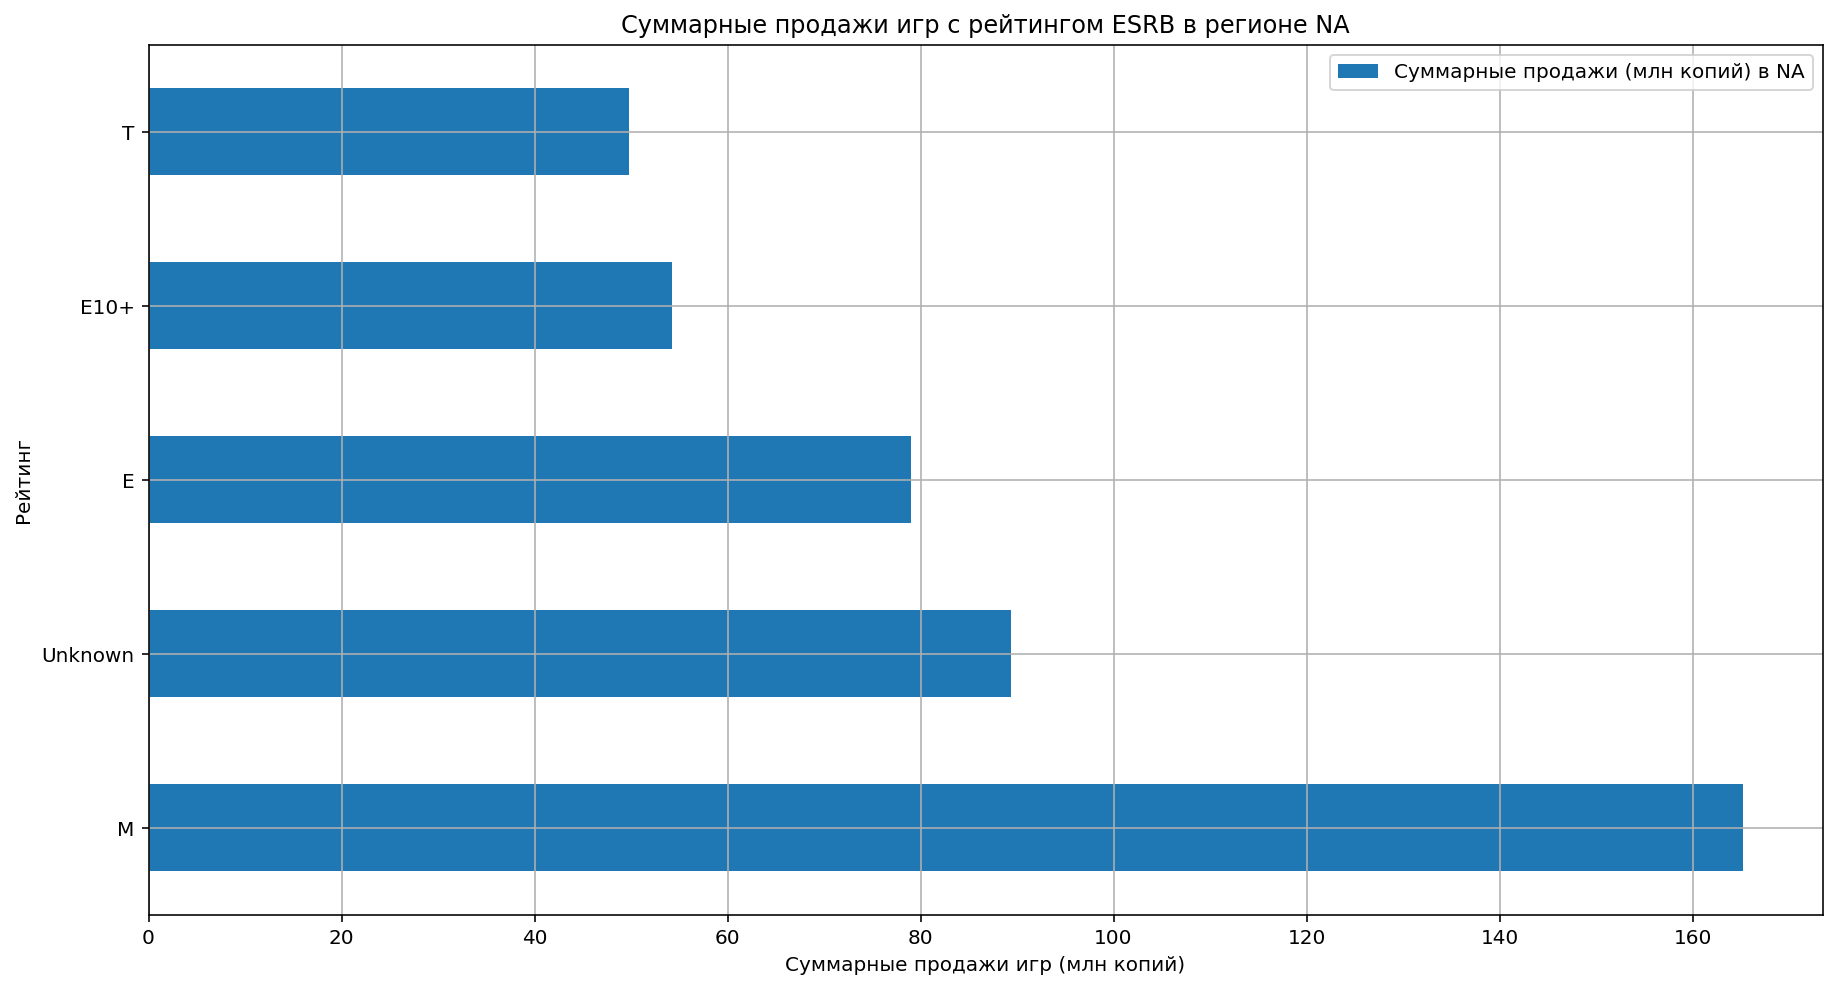

In [46]:
# Для наглядности строим график вида barh методом plot():
ax = data_top.sort_values('Суммарные продажи (млн копий) в NA', ascending=False).plot(kind='barh', grid=True, figsize=(15, 8));

# Методом set_xlabel() и set_ylabel() меняем названия осей, методом set_title добавляем заголовок:
ax.set_xlabel('Суммарные продажи игр (млн копий)');
ax.set_ylabel('Рейтинг');
ax.set_title('Суммарные продажи игр с рейтингом ESRB в регионе NA');

В Северной Америке наиболее популярны игры с рейтингом М (более 160 млн копий). Вполне вероятно, что типичный пользователь в этом регионе, как правило, старше 17 лет. Около 90 млн копий игр не имеют рейтинга ESRB или же данные о нем отуствуют. На третьем месте игры с рейтингом Е (около 80 млн копий), содержание которых вполне подходит для всех возрастов.

In [47]:
# Делаем по датафрейму data_act сводную таблицу data_top методом pivot_table(), группируем данные по столбцу 'genre', 
# по значениям из столбца 'na_sales' находим суммарные продажи игр на платформах функцией sum():
data_top = data_act.pivot_table(index=['rating'], values='eu_sales', aggfunc=['sum'])

# Переименовываем столбец:
data_top.columns = ['Суммарные продажи (млн копий) в EU']

# Сортируем датафрейм по уменьшению суммарных продаж игр и выводим его первые 5 строк методом head(): 
data_top.sort_values('Суммарные продажи (млн копий) в EU', ascending=False)


,Суммарные продажи (млн копий) в EU
rating,
M,145.32
E,83.36
Unknown,78.91
E10+,42.69
T,41.95


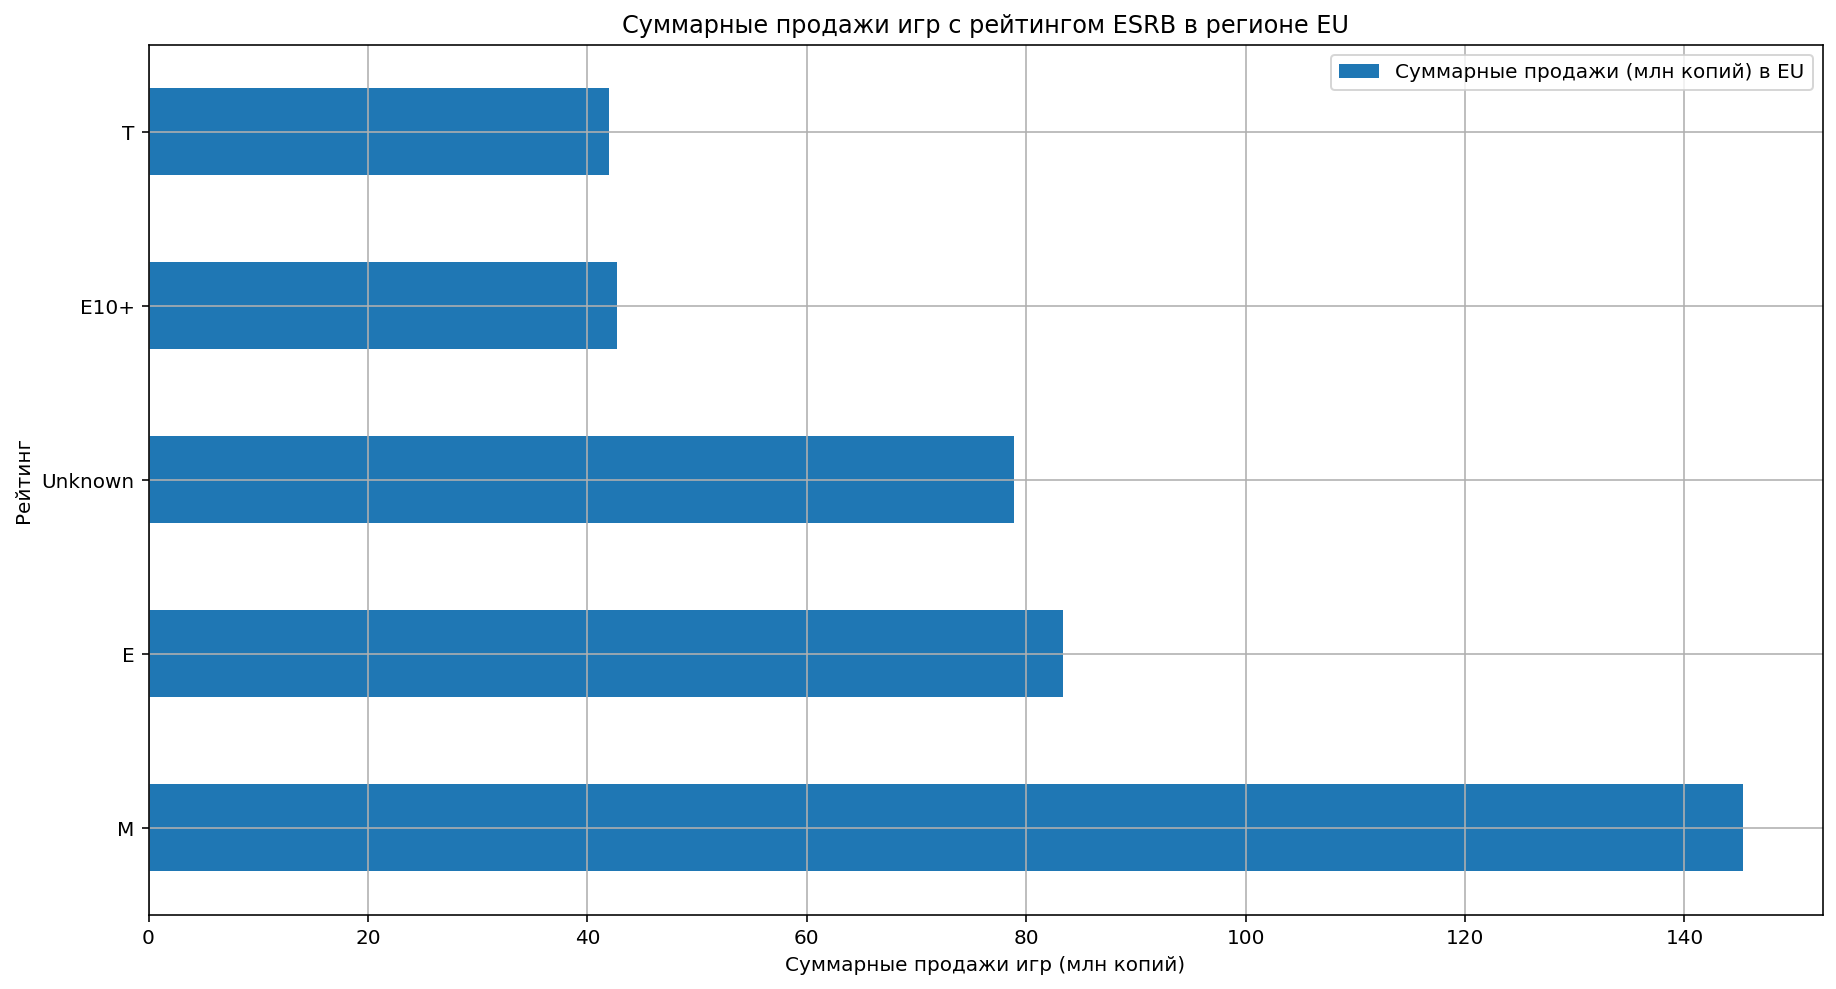

In [48]:
# Для наглядности строим график вида barh методом plot():
ax = data_top.sort_values('Суммарные продажи (млн копий) в EU', ascending=False).plot(kind='barh', grid=True, figsize=(15, 8));

# Методом set_xlabel() и set_ylabel() меняем названия осей, методом set_title добавляем заголовок:
ax.set_xlabel('Суммарные продажи игр (млн копий)');
ax.set_ylabel('Рейтинг');
ax.set_title('Суммарные продажи игр с рейтингом ESRB в регионе EU');

В Европе также самые популярные игры с рейтингом М (более 140 млн копий) для взрослых старше 17 лет. На втором месте игры с рейтингом Е для всех возрастов (84 млн копий). Чуть меньше 80 млн копий проданных игр не имели рейтинга, или же о нем не было данных.

In [49]:
# Делаем по датафрейму data_act сводную таблицу data_top методом pivot_table(), группируем данные по столбцу 'genre', 
# по значениям из столбца 'na_sales' находим суммарные продажи игр на платформах функцией sum():
data_top = data_act.pivot_table(index=['rating'], values='jp_sales', aggfunc=['sum'])

# Переименовываем столбец:
data_top.columns = ['Суммарные продажи (млн копий) в JP']

# Сортируем датафрейм по уменьшению суммарных продаж игр и выводим его первые 5 строк методом head(): 
data_top.sort_values('Суммарные продажи (млн копий) в JP', ascending=False)


,Суммарные продажи (млн копий) в JP
rating,
Unknown,85.05
T,20.59
E,15.14
M,14.11
E10+,5.89


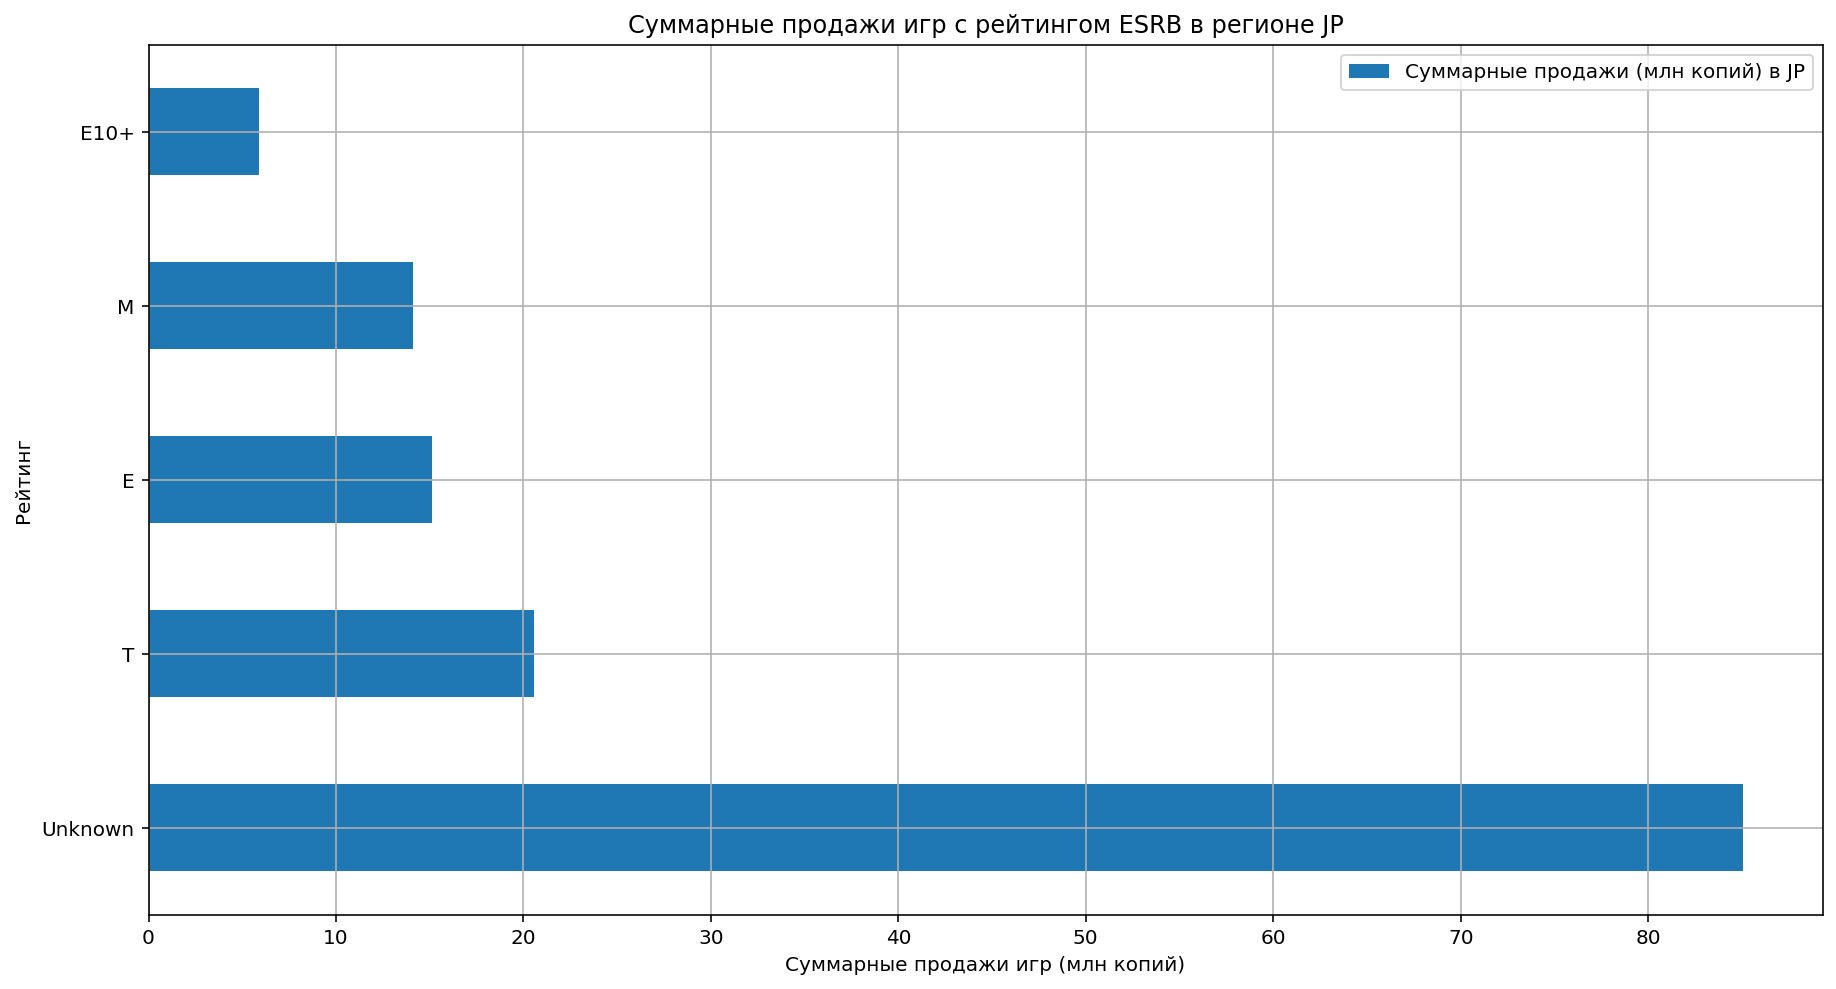

In [50]:
# Для наглядности строим график вида barh методом plot():
ax = data_top.sort_values('Суммарные продажи (млн копий) в JP', ascending=False).plot(kind='barh', grid=True, figsize=(15, 8));

# Методом set_xlabel() и set_ylabel() меняем названия осей, методом set_title добавляем заголовок:
ax.set_xlabel('Суммарные продажи игр (млн копий)');
ax.set_ylabel('Рейтинг');
ax.set_title('Суммарные продажи игр с рейтингом ESRB в регионе JP');

В Японии наиболее популярны игры с неопределенным рейтингом (чуть более 80 млн копий), вполне вероятно это связано с тем, что большей части игр, выпускаемых для рынка Японии, не присваивают рейтинг ESRB. На втором месте по популярности игры с рейтингом  Т для лиц от 13 лет (более 20 млн копий).

Как оказалось, рейтинг ESRB действительно оказывает влияние на продажи в отдельном регионе: так в Северной Америке и Европе за период с 2013 по 2016 год больше всего игр было продано с рейтингом М для взрослых старше 17 лет. Можно предположить, что типичный пользователь в Европе и Северной Америке, как правило, старше 17 лет. В тоже время, по-видимому, играм, выпускаемым в Японии чаще всего не присваивают рейтинг от организации ESRB, либо информация о нем отсутствует. Поэтому нельзя сказать однозначно, какой пользователь превалирует на рынке Японии, можно лишь предположить на основании проданных игр с рейтингом ESRB, занимающих второе место в общих продажах в регионе, что, он скорее всего старше 13 лет.    

## Проверим гипотезы

### Проверим гипотезу, одинаковы ли средние пользовательские рейтинги платформ Xbox One и PC

Сформулируем **нулевую гипотезу**:
Средние пользовательские рейтинги платформ Xbox One и PC равны.

Сформулируем **альтернативную гипотезу**:
Средние пользовательские рейтинги платформ Xbox One и PC неравны.

Перед проверкой гипотезы удаляем пропуски из столбца с оценками пользователей, так как функция t-теста независимых выборок scipy не поддерживает значения «NaN»

In [51]:
# Удаляем пропуски в столбце 'user_score' методом drop():
data_act = data_act.dropna(subset=['user_score'])


In [52]:
# Вызовем методом st.ttest_ind() для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым 
# из них выборкам:
    
results = st.ttest_ind(data_act[data_act['platform'] == 'XOne']['user_score'], 
                       data_act[data_act['platform'] == 'PC']['user_score'], equal_var=False)
# Зададим пороговое значение alpha:
alpha = 0.05
print(results.pvalue)

# Условный оператор с выводом строки с ответом:
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 


0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


### Проверим гипотезу, разные ли средние пользовательские рейтинги жанров Action и Sports

Сформулируем **нулевую гипотезу**:
Средние пользовательские рейтинги жанров Action и Sports равны.

Сформулируем **альтернативную гипотезу**:
Средние пользовательские рейтинги жанров Action и Sports неравны (разные).

In [53]:
# Вызовем методом st.ttest_ind() для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым 
# из них выборкам:
    
results = st.ttest_ind(data_act[data_act['genre'] == 'Action']['user_score'], 
                       data_act[data_act['genre'] == 'Sports']['user_score'], equal_var=False)
# Зададим пороговое значение alpha:
alpha = 0.05
print(results.pvalue)

# Условный оператор с выводом строки с ответом:
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

1.4460039700704315e-20
Отвергаем нулевую гипотезу


## Общий вывод

Полученные для анализа данные были обработаны следующим образом: названия столбцов приведены к нижнему регистру, удалены пропуски в столбцах с названием игры, ее жанром, и годом релиза, заменены пропуски в столбце с рейтингом ESRB и значения ‘tbd’ в столбце с оценками пользователей, перечислены причины, которые могли привести к появлению пропусков в данных, изменен тип данных в  столбце с оценками пользователей и в столбце с годом релиза, добавлен новый столбец с суммарными продажами во всех регионах, построена гистограмма для столбца с годом релиза игр, построены графики вида ‘бар’ для изучения изменения продаж игр на каждой платформе, отобраны данные за актуальный период (с 2013 по 2016 год), для данных за актуальный период построены графики вида ‘бар’ для оценки наиболее прибыльных платформ, построен график «ящик с усами» по глобальным продажам игр в разбивке по платформам, для каждой платформы построены графики разброса для определения степени влияния оценки  пользователей  и критиков на суммарными продажи игр, построены гистограмма и график вида ‘бар’, показывающие распрделение игр по жанрам и наиболее продаваемые жанры, построены сводные таблицы и графики вида ‘бар’ с целью определения топ 5 самых популярных платформ и жанров  в Северной Америке, Европе и Японии, и влияния рейтинга ESRB на продажи в этих регионах, проверили две гипотезы о равенстве двух генеральных совокупностей по взятым из них выборкам:первая - о равенстве средних пользовательских рейтингов платформ Xbox One и PC, вторая - о равенстве средних пользовательских рейтингов жанров Action и Sports.  

Количество выпускаемых игр в год  активно увеличивалось с 1993 по 2008 год, в котором достигло максимума в более 1400 игр в год, с 2009 по 2012 произошло снижение количества выпускаемых игр практически в 2 раза, после чего наблюдался небольшой рост до 2015 года и некоторое снижение в 2016 году. Больше всего игр за все время было продано на платформе PS2 (1234 млн копий), на втором месте − X360 (961 млн копий),  на третьем − PS3  (932 млн копий). Новые платформы появляются примерно каждые 5-6 лет и исчезают в среднем через 10 лет после своего появления. Для прогнозов на 2017 год больше всего подходит период  с 2013 по 2016 год, так как в этот период не произошло достаточно резкого снижения или увеличения количества выпускаемых игр (в разы) и наблюдаются характерные зависимости продажи игр в зависмости от года релиза на наиболее успешных и современных платформах, например, таких как PS4, игры на которую начали выпускать с 2013 года. PS4 является самой прибыльной платформой с 2013 по 2016 год (продано 314 млн копий игр). С 2013 по 2015 наблюдался рост суммарных продаж игр на наиболее популярных платформах  в этот период PS4 и Xоne, связанный с появлением их на рынке в 2013 году, который сменился, достигнув пика в 2015 году, падением продаж в 2016 году. К менее популярным, но тем не менее важным платформам этого периода стоит отнести X360, PS3 и 3DS, суммарные продажи игр на которых сильно снизились к 2016 году, однако эти платформы все ещё продолжают занимать значительную долю рынка. 

Прямой зависмости между суммарными продажами игры и оценкой игры пользователями не выявлено. То же самое можно сказать и о влиянии оценки критиков на суммарные продажи игры, хоть и нередкость, что игры с высокими продажами имеют высокие оценки. 

Наиболее прибыльным жанром игр с 2013 по 2016 год является жанр Shooter, на втором и третьем месте по продажам - жанры Sports и Platform соответственно. Наименее прибыльный жанр - Adventure.

Пользователи из Северной Америки и Европы имеют схожий портрет: они предпочитают покупать игры жанра Action или Shooter с рейтингом ESRB старше 17 лет на платформах PS4, PS3, XOne и X360, первое место по продажам среди которых занимает PS4. Типичный пользователь из Японии чаще покупает игры жанра Role-Playing и Action с неопределенным рейтингом ESRB на платформах японских компаний – Nintendo (платформа 3DS) и Playstation( платформы PS3, PSV, PS4). Самая популярная платформа в этом регионе − 3DS.

На основании проведенного анализа можно предположить, что количество выпущенных игр в 2017 году и, соответственно, потенциальных конкурентов, снизится. Для получения наибольшей прибыли следует разрабатывать игру для рынка Северной Америки и Европы в жанре Shooter с рейтингом ESRB М на платформе PS4, а для рынка Японии в жанре Role-Playing на платформе 3DS с любым рейтингом ESRB. Если же ориентироваться больше на популярность жанра, то для всех этих регионах также можно выпустить и игру в жанре Action на платформе PS4, рейтинг ESRB которой присвоить, исходя из того, на какой из регионов, она будет ориентирована в большей степени.

В дальнейшем рекомендуется проанализировать продажи в других регионах, например, странах Азии, добавить в данные информацию о том, имеет ли игра мультиплеер, какая компания разрабатывала игру, о затратах на разработку игры и выяснить, влияет ли все это на количество проданных копий игры. 
Для уменьшения количества пропусков можно было усовершенствовать автоматизированную систему сбора информации об играх в сети Интернет либо добавить этап ручной проверки данных.